# DATA ANALYSIS part 2: Batting/Bowling
In this section,the focus of the analysis were the

 - first innings runs scored by teams
 - individual runs scored by batters
 - individual runs scored by batters
 - batting strike rate and batting average
 - wickets and wicket-taking bowlers
 - bowling economy rate
 - bowling average and bowling strike rate

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Show/Hide Code."></form>''')

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
match_info = pd.read_csv('C:\\Users\\DELL\\Cricdata\\match_summary.csv')
match_info.head()

,Team1,Team2,Season,Date,Venue,Toss_Winner,Toss_Decision,Winner,Winning_Margin,ByWickets,ByRuns
0,Sunrisers,Southern Vipers,2020,29-08-2020,Chelmsford,Southern Vipers,field,Southern Vipers,7,Y,N
1,Central Sparks,Northern Diamonds,2020,29-08-2020,Birmingham,Central Sparks,bat,Northern Diamonds,9,Y,N
2,Thunder,Lightning,2020,29-08-2020,Nottingham,Thunder,bat,Thunder,4,N,Y
3,South East Stars,Western Storm,2020,29-08-2020,Beckenham,Western Storm,field,Western Storm,6,Y,N
4,Southern Vipers,Western Storm,2020,31-08-2020,Bristol,Western Storm,field,Southern Vipers,22,N,Y


In [27]:
#Convert 'Date' column from yyyy/mm/dd to date dd/mm/yyyy format
from datetime import datetime
for i in range(len(match_info)):
    match_info["Date"][i]= datetime.strptime(match_info["Date"][i], "%d-%m-%Y").strftime("%d/%m/%Y")

In [29]:
matchball_info=pd.read_csv('C:\\Users\\DELL\\Cricdata\\allmatches_tidy.csv')

In [30]:
matchball_info.head()

,match_id,season,start_date,venue,innings,over,ball,batting_team,bowling_team,striker,non_striker,runs_off_bat,extras,bowler,wicket_type,player_dismissed,wides,noballs,byes,legbyes
0,1229326.0,2020.0,29-08-2020,Chelmsford,1.0,1.0,0.1,Sunrisers,Southern Vipers,KL Midwood,AD Carr,0.0,0.0,LK Bell,NaN,NaN,NaN,NaN,NaN,NaN
1,1229326.0,2020.0,29-08-2020,Chelmsford,1.0,1.0,0.2,Sunrisers,Southern Vipers,KL Midwood,AD Carr,0.0,0.0,LK Bell,NaN,NaN,NaN,NaN,NaN,NaN
2,1229326.0,2020.0,29-08-2020,Chelmsford,1.0,1.0,0.3,Sunrisers,Southern Vipers,KL Midwood,AD Carr,0.0,0.0,LK Bell,NaN,NaN,NaN,NaN,NaN,NaN
3,1229326.0,2020.0,29-08-2020,Chelmsford,1.0,1.0,0.4,Sunrisers,Southern Vipers,KL Midwood,AD Carr,0.0,1.0,LK Bell,NaN,NaN,1.0,NaN,NaN,NaN
4,1229326.0,2020.0,29-08-2020,Chelmsford,1.0,1.0,0.5,Sunrisers,Southern Vipers,KL Midwood,AD Carr,0.0,1.0,LK Bell,NaN,NaN,1.0,NaN,NaN,NaN


In [ ]:
#insert new column 'match_id' at 0 position in 'match_info' dataframe
match_info.insert(loc=0, column='match_id', value=matchball_info['match_id'].unique())

In [31]:
match_info.head()

,match_id,Team1,Team2,Season,Date,Venue,Toss_Winner,Toss_Decision,Winner,Winning_Margin,ByWickets,ByRuns
0,1229326,Sunrisers,Southern Vipers,2020,29-08-2020,Chelmsford,Southern Vipers,field,Southern Vipers,7,Y,N
1,1229327,Central Sparks,Northern Diamonds,2020,29-08-2020,Birmingham,Central Sparks,bat,Northern Diamonds,9,Y,N
2,1229328,Thunder,Lightning,2020,29-08-2020,Nottingham,Thunder,bat,Thunder,4,N,Y
3,1229329,South East Stars,Western Storm,2020,29-08-2020,Beckenham,Western Storm,field,Western Storm,6,Y,N
4,1229330,Southern Vipers,Western Storm,2020,31-08-2020,Bristol,Western Storm,field,Southern Vipers,22,N,Y


In [ ]:
#save the match_info dataframe to csv file
#match_info.to_csv("C:\\Users\\DELL\\Cricdata\\match_summary.csv",index=False)

In [ ]:
#save the matchball_info dataframe to csv file
#matchball_info.to_csv("C:\\Users\\DELL\\Cricdata\\allmatches_tidy.csv",index=False)

## <center> 1. Batting Stats <center>

### <center> 1. 1 First Innings Runs <center>

In [32]:
#take records of only first innings
firstinnings_df = matchball_info[matchball_info['innings']==1][['match_id','start_date','venue','innings',
                                                                'batting_team','bowling_team','runs_off_bat', 'extras']]

firstinnings_df.head()

,match_id,start_date,venue,innings,batting_team,bowling_team,runs_off_bat,extras
0,1229326.0,29-08-2020,Chelmsford,1.0,Sunrisers,Southern Vipers,0.0,0.0
1,1229326.0,29-08-2020,Chelmsford,1.0,Sunrisers,Southern Vipers,0.0,0.0
2,1229326.0,29-08-2020,Chelmsford,1.0,Sunrisers,Southern Vipers,0.0,0.0
3,1229326.0,29-08-2020,Chelmsford,1.0,Sunrisers,Southern Vipers,0.0,1.0
4,1229326.0,29-08-2020,Chelmsford,1.0,Sunrisers,Southern Vipers,0.0,1.0


In [33]:
#add the runs and extras after grouping
firstinnings_df = firstinnings_df.groupby(['match_id','start_date','venue',
                         'innings','batting_team','bowling_team']).agg({'runs_off_bat':'sum','extras':'sum'}).reset_index()

firstinnings_df.head()

,match_id,start_date,venue,innings,batting_team,bowling_team,runs_off_bat,extras
0,1229326.0,29-08-2020,Chelmsford,1.0,Sunrisers,Southern Vipers,164.0,38.0
1,1229329.0,29-08-2020,Beckenham,1.0,South East Stars,Western Storm,149.0,17.0
2,1229330.0,31-08-2020,Bristol,1.0,Southern Vipers,Western Storm,227.0,34.0
3,1229331.0,31-08-2020,Beckenham,1.0,South East Stars,Sunrisers,261.0,28.0
4,1229332.0,31-08-2020,Birmingham,1.0,Thunder,Central Sparks,127.0,8.0


In [34]:
#add a new column 'total_score' to calculate first innings total runs
firstinnings_df['total_score'] = firstinnings_df['runs_off_bat'] + firstinnings_df['extras']
firstinnings_df.head()

,match_id,start_date,venue,innings,batting_team,bowling_team,runs_off_bat,extras,total_score
0,1229326.0,29-08-2020,Chelmsford,1.0,Sunrisers,Southern Vipers,164.0,38.0,202.0
1,1229329.0,29-08-2020,Beckenham,1.0,South East Stars,Western Storm,149.0,17.0,166.0
2,1229330.0,31-08-2020,Bristol,1.0,Southern Vipers,Western Storm,227.0,34.0,261.0
3,1229331.0,31-08-2020,Beckenham,1.0,South East Stars,Sunrisers,261.0,28.0,289.0
4,1229332.0,31-08-2020,Birmingham,1.0,Thunder,Central Sparks,127.0,8.0,135.0


In [35]:
#add another column 'Winner' to put value of match winners form match_info dataframe
firstinnings_df['Winner']=match_info['Winner']
firstinnings_df.head()

,match_id,start_date,venue,innings,batting_team,bowling_team,runs_off_bat,extras,total_score,Winner
0,1229326.0,29-08-2020,Chelmsford,1.0,Sunrisers,Southern Vipers,164.0,38.0,202.0,Southern Vipers
1,1229329.0,29-08-2020,Beckenham,1.0,South East Stars,Western Storm,149.0,17.0,166.0,Northern Diamonds
2,1229330.0,31-08-2020,Bristol,1.0,Southern Vipers,Western Storm,227.0,34.0,261.0,Thunder
3,1229331.0,31-08-2020,Beckenham,1.0,South East Stars,Sunrisers,261.0,28.0,289.0,Western Storm
4,1229332.0,31-08-2020,Birmingham,1.0,Thunder,Central Sparks,127.0,8.0,135.0,Southern Vipers


In [36]:
#add a new column
firstinnings_df['Result']=np.nan

for i in range(len(firstinnings_df)):
    if firstinnings_df['batting_team'][i] == firstinnings_df['Winner'][i]:
        firstinnings_df['Result'][i] = 'Won'
    else:
        firstinnings_df['Result'][i] = 'Lost'
        
firstinnings_df.head()   

,match_id,start_date,venue,innings,batting_team,bowling_team,runs_off_bat,extras,total_score,Winner,Result
0,1229326.0,29-08-2020,Chelmsford,1.0,Sunrisers,Southern Vipers,164.0,38.0,202.0,Southern Vipers,Lost
1,1229329.0,29-08-2020,Beckenham,1.0,South East Stars,Western Storm,149.0,17.0,166.0,Northern Diamonds,Lost
2,1229330.0,31-08-2020,Bristol,1.0,Southern Vipers,Western Storm,227.0,34.0,261.0,Thunder,Lost
3,1229331.0,31-08-2020,Beckenham,1.0,South East Stars,Sunrisers,261.0,28.0,289.0,Western Storm,Lost
4,1229332.0,31-08-2020,Birmingham,1.0,Thunder,Central Sparks,127.0,8.0,135.0,Southern Vipers,Lost


In [ ]:
#save the dataframe to csv file
#firstinnings_df.to_csv("C:\\Users\\DELL\\Cricdata\\firstinnings_runs.csv",index=False)

In [37]:
firstinnings_df=pd.read_csv("C:\\Users\\DELL\\Cricdata\\firstinnings_runs.csv")

<Figure size 576x288 with 0 Axes>

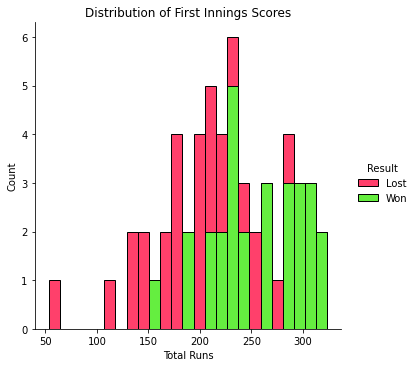

In [38]:
#plot distribution of total scores
plt.figure(figsize=(8,4))
sns.displot(data=firstinnings_df,x='total_score',hue='Result',palette="prism_r",multiple="stack",bins=25)
plt.title('Distribution of First Innings Scores')
plt.xlabel('Total Runs')

plt.savefig('C:\\Users\\DELL\\Cricdata\\FirstInningsScoreDist.jpeg',bbox_inches='tight')
plt.show()

Most teams have scored within 180 to 300 runs in the first innings. Barring a few instances, teams having scored above 220 runs usually won the match. Similarly, except for a few occasions, teams scoring less than 200 runs usually lost.

In [40]:
firstinnings_df['venue'].value_counts()

Bristol              6
Chelmsford           5
Beckenham            5
Worcester            4
Birmingham           4
Southampton          4
Leeds                4
Chester-le-Street    3
Leicester            2
Hove                 2
Liverpool            2
London               2
Chester              2
Loughborough         2
Nottingham           1
Kibworth             1
Cambridge            1
Taunton              1
Northwood            1
Sale                 1
Scarborough          1
Northampton          1
Name: venue, dtype: int64

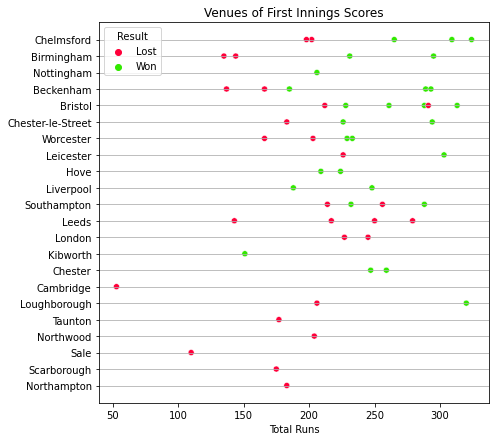

In [39]:
#plot venues of total scores
plt.figure(figsize=(7,7))
ax=sns.scatterplot(data=firstinnings_df, y='venue', x='total_score', hue='Result', palette='prism_r')
ax.yaxis.grid(True) #show y axis grid lines
plt.title('Venues of First Innings Scores')
plt.ylabel('')
plt.xlabel('Total Runs')

plt.savefig('C:\\Users\\DELL\\Cricdata\\VenuesInningsScores.jpeg',bbox_inches='tight')
plt.show()

In [41]:
fdf = firstinnings_df.sort_values('total_score', ascending = False) #sort in descending order
fdf.reset_index(drop=True,inplace=True)
fdf.head(10)

,match_id,start_date,venue,innings,batting_team,bowling_team,runs_off_bat,extras,total_score,Winner,Result
0,1252266,29-05-2021,Chelmsford,1,South East Stars,Sunrisers,280,44,324,South East Stars,Won
1,1252288,18-09-2021,Loughborough,1,Lightning,Central Sparks,278,42,320,Lightning,Won
2,1252290,18-09-2021,Bristol,1,Western Storm,Sunrisers,290,23,313,Western Storm,Won
3,1252287,12-09-2021,Chelmsford,1,Southern Vipers,Sunrisers,267,42,309,Southern Vipers,Won
4,1229348,19-09-2020,Leicester,1,Lightning,Central Sparks,283,20,303,Lightning,Won
5,1252269,31-05-2021,Birmingham,1,Central Sparks,Western Storm,260,35,295,Central Sparks,Won
6,1252284,12-09-2021,Chester-le-Street,1,Northern Diamonds,Thunder,283,11,294,Northern Diamonds,Won
7,1252281,10-09-2021,Beckenham,1,South East Stars,Lightning,280,13,293,South East Stars,Won
8,1252265,29-05-2021,Bristol,1,Thunder,Western Storm,269,22,291,Western Storm,Lost
9,1229331,31-08-2020,Beckenham,1,South East Stars,Sunrisers,261,28,289,South East Stars,Won


In [42]:
#add a new column 'message'
fdf['message'] = np.nan
for i in range(len(fdf)):
    fdf['message'][i] = "vs "+str(fdf['bowling_team'][i])+" ("+fdf['start_date'][i]+")"      
    
fdf.head(10)

,match_id,start_date,venue,innings,batting_team,bowling_team,runs_off_bat,extras,total_score,Winner,Result,message
0,1252266,29-05-2021,Chelmsford,1,South East Stars,Sunrisers,280,44,324,South East Stars,Won,vs Sunrisers (29-05-2021)
1,1252288,18-09-2021,Loughborough,1,Lightning,Central Sparks,278,42,320,Lightning,Won,vs Central Sparks (18-09-2021)
2,1252290,18-09-2021,Bristol,1,Western Storm,Sunrisers,290,23,313,Western Storm,Won,vs Sunrisers (18-09-2021)
3,1252287,12-09-2021,Chelmsford,1,Southern Vipers,Sunrisers,267,42,309,Southern Vipers,Won,vs Sunrisers (12-09-2021)
4,1229348,19-09-2020,Leicester,1,Lightning,Central Sparks,283,20,303,Lightning,Won,vs Central Sparks (19-09-2020)
5,1252269,31-05-2021,Birmingham,1,Central Sparks,Western Storm,260,35,295,Central Sparks,Won,vs Western Storm (31-05-2021)
6,1252284,12-09-2021,Chester-le-Street,1,Northern Diamonds,Thunder,283,11,294,Northern Diamonds,Won,vs Thunder (12-09-2021)
7,1252281,10-09-2021,Beckenham,1,South East Stars,Lightning,280,13,293,South East Stars,Won,vs Lightning (10-09-2021)
8,1252265,29-05-2021,Bristol,1,Thunder,Western Storm,269,22,291,Western Storm,Lost,vs Western Storm (29-05-2021)
9,1229331,31-08-2020,Beckenham,1,South East Stars,Sunrisers,261,28,289,South East Stars,Won,vs Sunrisers (31-08-2020)


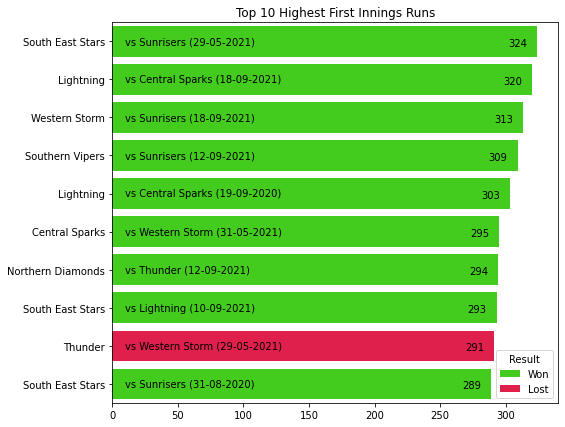

In [43]:
#plot 10 highest first innings scores
df=fdf.head(10)
plt.figure(figsize=(8, 7))

plt.title('Top 10 Highest First Innings Runs')
ax = sns.barplot(data=df, x='total_score', y=df.index, orient='h',hue='Result',palette="prism",dodge=False)
ax.set_yticklabels(df.batting_team)
plt.xlabel('')
 
# set the bar labels
for p in ax.patches:
    ax.annotate(  p.get_width().astype(int) ,( (p.get_x() + p.get_width()), p.get_y() ), 
                xytext=(-10,-20),fontsize=10,color='black',textcoords='offset points',horizontalalignment='right' ) 
    
# write messages on bars
for bar, msg in zip(ax.patches, df['message']):
    ax.text(10, bar.get_y()+bar.get_height()/2, msg, color='black', ha='left', va='center')

plt.savefig('C:\\Users\\DELL\\Cricdata\\Top10firstinningsscores.jpeg',bbox_inches='tight')
plt.show()

In the 2021 season, there were four matches where runs above 300 were scored in the first innings while in the previous year this happened only once. The highest runs scored was 324 by South East Stars against Sunrisers on 29th May 2021. The highest first innings runs in 2020 season was 303 by Lightning against Central Sparks on 19th September 2020. The highest runs total successfully chased, was 291 by Western Storm who scored 295 losing 9 wickets and thus winning against North West Thunder by 1 wicket on 29th May 2021.  

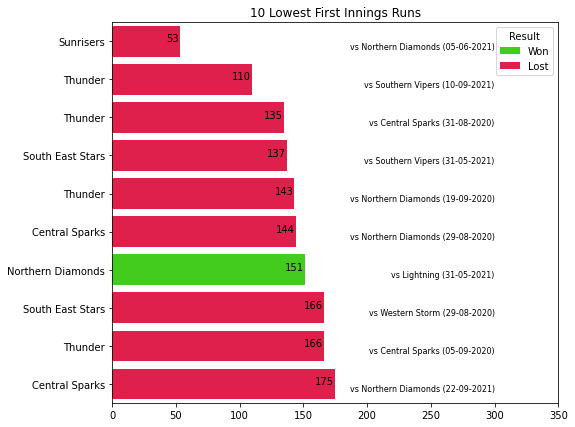

In [44]:
#plot 10 lowest first innings scores
df=fdf.tail(10)
plt.figure(figsize=(8, 7))

plt.title('10 Lowest First Innings Runs')

ax = sns.barplot(data=df, x='total_score', y=df.index, orient='h',hue='Result',hue_order = ['Won', 'Lost'],
                 palette="prism",dodge=False)
ax.set_yticklabels(df.batting_team)
ax.set_xlim(0,350)#set x axis limits
plt.xlabel('')
plt.ylim(reversed(plt.ylim()))#invert the y-axis for ascending order
 
# set the bar labels
for p in ax.patches:
    ax.annotate(  p.get_width().astype(int) ,( (p.get_x() + p.get_width()), p.get_y() ), 
                xytext=(-1,15),fontsize=10,color='black',textcoords='offset points',horizontalalignment='right' ) 
    
# write messages on bars
for bar, msg in zip(ax.patches, df['message']):
    ax.text(300, bar.get_y()+bar.get_height()/3, msg,fontsize=8, color='black', ha='right', va='center')

plt.savefig('C:\\Users\\DELL\\Cricdata\\Lowest10firstinningsscores.jpeg',bbox_inches='tight')
plt.show()

Sunrisers were bowled out for only 53, the lowest ever runs in the first innings, against Northern Diamonds on 5th June 2021. The lowest runs total of 151 was successfully defended by Northern Diamonds versus Lightning who were bowled out for 145 resulting in Northern Diamonds winning by 6 runs on 31st May 2021. 

**In the following few steps, relevant data for batting has been prepared and put in a single dataframe**

In [45]:
matchball_info=pd.read_csv('C:\\Users\\DELL\\Cricdata\\allmatches_tidy.csv')
matchball_info.head()

,match_id,season,start_date,venue,innings,over,ball,batting_team,bowling_team,striker,non_striker,runs_off_bat,extras,bowler,wicket_type,player_dismissed,wides,noballs,byes,legbyes
0,1229326.0,2020.0,29-08-2020,Chelmsford,1.0,1.0,0.1,Sunrisers,Southern Vipers,KL Midwood,AD Carr,0.0,0.0,LK Bell,NaN,NaN,NaN,NaN,NaN,NaN
1,1229326.0,2020.0,29-08-2020,Chelmsford,1.0,1.0,0.2,Sunrisers,Southern Vipers,KL Midwood,AD Carr,0.0,0.0,LK Bell,NaN,NaN,NaN,NaN,NaN,NaN
2,1229326.0,2020.0,29-08-2020,Chelmsford,1.0,1.0,0.3,Sunrisers,Southern Vipers,KL Midwood,AD Carr,0.0,0.0,LK Bell,NaN,NaN,NaN,NaN,NaN,NaN
3,1229326.0,2020.0,29-08-2020,Chelmsford,1.0,1.0,0.4,Sunrisers,Southern Vipers,KL Midwood,AD Carr,0.0,1.0,LK Bell,NaN,NaN,1.0,NaN,NaN,NaN
4,1229326.0,2020.0,29-08-2020,Chelmsford,1.0,1.0,0.5,Sunrisers,Southern Vipers,KL Midwood,AD Carr,0.0,1.0,LK Bell,NaN,NaN,1.0,NaN,NaN,NaN


In [46]:
matchball_info.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'over', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker',
       'runs_off_bat', 'extras', 'bowler', 'wicket_type', 'player_dismissed',
       'wides', 'noballs', 'byes', 'legbyes'],
      dtype='object')

In [47]:
matchball_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30229 entries, 0 to 30228
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          30228 non-null  float64
 1   season            30228 non-null  float64
 2   start_date        30228 non-null  object 
 3   venue             30228 non-null  object 
 4   innings           30228 non-null  float64
 5   over              30228 non-null  float64
 6   ball              30228 non-null  float64
 7   batting_team      30228 non-null  object 
 8   bowling_team      30228 non-null  object 
 9   striker           30228 non-null  object 
 10  non_striker       30228 non-null  object 
 11  runs_off_bat      30228 non-null  float64
 12  extras            30228 non-null  float64
 13  bowler            30228 non-null  object 
 14  wicket_type       828 non-null    object 
 15  player_dismissed  828 non-null    object 
 16  wides             1341 non-null   float6

In [48]:
batting_info = matchball_info[['match_id', 'season', 'start_date','innings', 'over','batting_team', 'bowling_team', 
                               'striker', 'non_striker','runs_off_bat','extras','wicket_type','player_dismissed']]

batting_info.head()

,match_id,season,start_date,innings,over,batting_team,bowling_team,striker,non_striker,runs_off_bat,extras,wicket_type,player_dismissed
0,1229326.0,2020.0,29-08-2020,1.0,1.0,Sunrisers,Southern Vipers,KL Midwood,AD Carr,0.0,0.0,NaN,NaN
1,1229326.0,2020.0,29-08-2020,1.0,1.0,Sunrisers,Southern Vipers,KL Midwood,AD Carr,0.0,0.0,NaN,NaN
2,1229326.0,2020.0,29-08-2020,1.0,1.0,Sunrisers,Southern Vipers,KL Midwood,AD Carr,0.0,0.0,NaN,NaN
3,1229326.0,2020.0,29-08-2020,1.0,1.0,Sunrisers,Southern Vipers,KL Midwood,AD Carr,0.0,1.0,NaN,NaN
4,1229326.0,2020.0,29-08-2020,1.0,1.0,Sunrisers,Southern Vipers,KL Midwood,AD Carr,0.0,1.0,NaN,NaN


In [49]:
batting_info['match_id']=batting_info['match_id'].astype('Int64')

In [50]:
batter_partners = batting_info[['match_id','striker','non_striker']]

In [51]:
batter_partners=batter_partners.drop_duplicates(keep='first').reset_index(drop=True)

In [52]:
batter_partners.head(12)

,match_id,striker,non_striker
0,1229326,KL Midwood,AD Carr
1,1229326,AD Carr,KL Midwood
2,1229326,FC Wilson,KL Midwood
3,1229326,KL Midwood,FC Wilson
4,1229326,FC Wilson,ND Dattani
5,1229326,ND Dattani,FC Wilson
6,1229326,MK Villiers,ND Dattani
7,1229326,ND Dattani,MK Villiers
8,1229326,G Scrivens,MK Villiers
9,1229326,MK Villiers,G Scrivens


In [53]:
batter_partners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687 entries, 0 to 1686
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   match_id     1686 non-null   Int64 
 1   striker      1686 non-null   object
 2   non_striker  1686 non-null   object
dtypes: Int64(1), object(2)
memory usage: 41.3+ KB


In [54]:
#create a new column to store the unique batter pairs at striker and non-striker positions during batting
batter_partners['partnership'] = np.nan

for i in range(len(batter_partners)):
    batter_partners['partnership'][i]=str(batter_partners['striker'][i])+" & "+str(batter_partners['non_striker'][i])

for i in range(len(batter_partners)):
    if (i <= len(batter_partners)-2) and (batter_partners['striker'][i]==batter_partners['non_striker'][i+1]) and (batter_partners['non_striker'][i]==batter_partners['striker'][i+1]):
        batter_partners['partnership'][i+1]=str(batter_partners['striker'][i])+" & "+str(batter_partners['non_striker'][i])

In [55]:
batter_partners.head(12)

,match_id,striker,non_striker,partnership
0,1229326,KL Midwood,AD Carr,KL Midwood & AD Carr
1,1229326,AD Carr,KL Midwood,KL Midwood & AD Carr
2,1229326,FC Wilson,KL Midwood,FC Wilson & KL Midwood
3,1229326,KL Midwood,FC Wilson,FC Wilson & KL Midwood
4,1229326,FC Wilson,ND Dattani,FC Wilson & ND Dattani
5,1229326,ND Dattani,FC Wilson,FC Wilson & ND Dattani
6,1229326,MK Villiers,ND Dattani,MK Villiers & ND Dattani
7,1229326,ND Dattani,MK Villiers,MK Villiers & ND Dattani
8,1229326,G Scrivens,MK Villiers,G Scrivens & MK Villiers
9,1229326,MK Villiers,G Scrivens,G Scrivens & MK Villiers


In [56]:
batting_info = pd.merge(batting_info, batter_partners, how="outer",on=['match_id','striker','non_striker'])

In [57]:
batting_info.head(20)

,match_id,season,start_date,innings,over,batting_team,bowling_team,striker,non_striker,runs_off_bat,extras,wicket_type,player_dismissed,partnership
0,1229326,2020.0,29-08-2020,1.0,1.0,Sunrisers,Southern Vipers,KL Midwood,AD Carr,0.0,0.0,NaN,NaN,KL Midwood & AD Carr
1,1229326,2020.0,29-08-2020,1.0,1.0,Sunrisers,Southern Vipers,KL Midwood,AD Carr,0.0,0.0,NaN,NaN,KL Midwood & AD Carr
2,1229326,2020.0,29-08-2020,1.0,1.0,Sunrisers,Southern Vipers,KL Midwood,AD Carr,0.0,0.0,NaN,NaN,KL Midwood & AD Carr
3,1229326,2020.0,29-08-2020,1.0,1.0,Sunrisers,Southern Vipers,KL Midwood,AD Carr,0.0,1.0,NaN,NaN,KL Midwood & AD Carr
4,1229326,2020.0,29-08-2020,1.0,1.0,Sunrisers,Southern Vipers,KL Midwood,AD Carr,0.0,1.0,NaN,NaN,KL Midwood & AD Carr
5,1229326,2020.0,29-08-2020,1.0,1.0,Sunrisers,Southern Vipers,KL Midwood,AD Carr,0.0,1.0,NaN,NaN,KL Midwood & AD Carr
6,1229326,2020.0,29-08-2020,1.0,1.0,Sunrisers,Southern Vipers,KL Midwood,AD Carr,0.0,0.0,NaN,NaN,KL Midwood & AD Carr
7,1229326,2020.0,29-08-2020,1.0,1.0,Sunrisers,Southern Vipers,KL Midwood,AD Carr,0.0,0.0,NaN,NaN,KL Midwood & AD Carr
8,1229326,2020.0,29-08-2020,1.0,1.0,Sunrisers,Southern Vipers,KL Midwood,AD Carr,0.0,0.0,NaN,NaN,KL Midwood & AD Carr
9,1229326,2020.0,29-08-2020,1.0,3.0,Sunrisers,Southern Vipers,KL Midwood,AD Carr,0.0,0.0,NaN,NaN,KL Midwood & AD Carr


In [ ]:
#save the dataframe to csv file
#batting_info.to_csv("C:\\Users\\DELL\\Cricdata\\batting_info_v1.csv",index=False)

*Some data were externally added to the batting_info_v1 file, so this file is being read again from the updated version*

In [58]:
batting_info=pd.read_csv('C:\\Users\\DELL\\Cricdata\\batting_info_v1.csv')

In [59]:
batter_runs_innings = batting_info.groupby(['match_id', 'season', 'start_date', 'innings', 
                                            'batting_team','bowling_team', 'striker']).agg({'runs_off_bat':'sum'}).reset_index()

batter_runs_innings.head(15)

,match_id,season,start_date,innings,batting_team,bowling_team,striker,runs_off_bat
0,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,AD Carr,4.0
1,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,AJ Macleod,2.0
2,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,FC Wilson,11.0
3,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,G Scrivens,8.0
4,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,J Gardner,13.0
5,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,KJ Wolfe,2.0
6,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,KL Midwood,6.0
7,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,KS Castle,8.0
8,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,MK Villiers,64.0
9,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,ND Dattani,42.0


In [60]:
batter_ballsfaced = batting_info.groupby(['match_id', 'season', 'start_date', 'innings', 
                                          'batting_team','bowling_team', 'striker']).size().reset_index(name='balls_faced')

batter_ballsfaced.head(12)

,match_id,season,start_date,innings,batting_team,bowling_team,striker,balls_faced
0,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,AD Carr,15
1,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,AJ Macleod,4
2,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,FC Wilson,15
3,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,G Scrivens,21
4,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,J Gardner,15
5,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,KJ Wolfe,6
6,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,KL Midwood,24
7,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,KS Castle,13
8,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,MK Villiers,87
9,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,ND Dattani,82


In [61]:
batter_runs_innings = pd.merge(batter_runs_innings,batter_ballsfaced, how="outer",
                               on=['match_id', 'season', 'start_date', 'innings','batting_team','bowling_team', 'striker'])

batter_runs_innings.head(15)

,match_id,season,start_date,innings,batting_team,bowling_team,striker,runs_off_bat,balls_faced
0,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,AD Carr,4.0,15
1,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,AJ Macleod,2.0,4
2,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,FC Wilson,11.0,15
3,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,G Scrivens,8.0,21
4,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,J Gardner,13.0,15
5,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,KJ Wolfe,2.0,6
6,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,KL Midwood,6.0,24
7,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,KS Castle,8.0,13
8,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,MK Villiers,64.0,87
9,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,ND Dattani,42.0,82


In [62]:
#calculate the batting strike rate
batter_runs_innings['strike_rate'] = (batter_runs_innings['runs_off_bat']/batter_runs_innings['balls_faced'])*100

In [63]:
batter_runs_innings['strike_rate']=batter_runs_innings['strike_rate'].round(decimals=2)

In [64]:
batter_runs_innings.head(15)

,match_id,season,start_date,innings,batting_team,bowling_team,striker,runs_off_bat,balls_faced,strike_rate
0,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,AD Carr,4.0,15,26.67
1,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,AJ Macleod,2.0,4,50.00
2,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,FC Wilson,11.0,15,73.33
3,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,G Scrivens,8.0,21,38.10
4,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,J Gardner,13.0,15,86.67
5,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,KJ Wolfe,2.0,6,33.33
6,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,KL Midwood,6.0,24,25.00
7,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,KS Castle,8.0,13,61.54
8,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,MK Villiers,64.0,87,73.56
9,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,ND Dattani,42.0,82,51.22


In [65]:
#create new columns to find the number of individual runs sabove 50 and 100
batter_runs_innings['50s'] = 0
batter_runs_innings['100s'] = 0

for i in range(len(batter_runs_innings)):
    if batter_runs_innings['runs_off_bat'][i] >= 50 and batter_runs_innings['runs_off_bat'][i] <= 99:
        batter_runs_innings['50s'][i] = 1
    elif batter_runs_innings['runs_off_bat'][i] >= 100:
        batter_runs_innings['100s'][i] = 1
    else:
        batter_runs_innings['50s'][i] = 0
        batter_runs_innings['100s'][i] = 0  

In [66]:
batter_runs_innings.head(15)

,match_id,season,start_date,innings,batting_team,bowling_team,striker,runs_off_bat,balls_faced,strike_rate,50s,100s
0,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,AD Carr,4.0,15,26.67,0,0
1,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,AJ Macleod,2.0,4,50.00,0,0
2,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,FC Wilson,11.0,15,73.33,0,0
3,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,G Scrivens,8.0,21,38.10,0,0
4,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,J Gardner,13.0,15,86.67,0,0
5,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,KJ Wolfe,2.0,6,33.33,0,0
6,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,KL Midwood,6.0,24,25.00,0,0
7,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,KS Castle,8.0,13,61.54,0,0
8,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,MK Villiers,64.0,87,73.56,1,0
9,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,ND Dattani,42.0,82,51.22,0,0


In [67]:
batter_runs_innings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 982
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   match_id      983 non-null    float64
 1   season        983 non-null    float64
 2   start_date    983 non-null    object 
 3   innings       983 non-null    float64
 4   batting_team  983 non-null    object 
 5   bowling_team  983 non-null    object 
 6   striker       983 non-null    object 
 7   runs_off_bat  983 non-null    float64
 8   balls_faced   983 non-null    int64  
 9   strike_rate   983 non-null    float64
 10  50s           983 non-null    int64  
 11  100s          983 non-null    int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 132.1+ KB


In [68]:
#find the batters who have been out in the matches
batter_outs = batting_info[['match_id','batting_team','player_dismissed']].dropna()
batter_outs=batter_outs.reset_index(drop=True)

In [69]:
batter_outs['wicket_status'] = "out"

In [70]:
batter_outs.head(15)

,match_id,batting_team,player_dismissed,wicket_status
0,1229326.0,Sunrisers,AD Carr,out
1,1229326.0,Sunrisers,KL Midwood,out
2,1229326.0,Sunrisers,FC Wilson,out
3,1229326.0,Sunrisers,ND Dattani,out
4,1229326.0,Sunrisers,G Scrivens,out
5,1229326.0,Sunrisers,AJ Macleod,out
6,1229326.0,Sunrisers,J Gardner,out
7,1229326.0,Sunrisers,MK Villiers,out
8,1229326.0,Sunrisers,Sonali Patel,out
9,1229326.0,Sunrisers,KJ Wolfe,out


In [71]:
batter_runs_innings = pd.merge(batter_runs_innings,batter_outs, how="outer",
             left_on=['match_id','batting_team','striker'],right_on=['match_id','batting_team','player_dismissed']) 

In [77]:
batter_runs_innings.head()

,match_id,season,start_date,innings,batting_team,bowling_team,striker,runs_off_bat,balls_faced,strike_rate,50s,100s,player_dismissed,wicket_status
0,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,AD Carr,4.0,15.0,26.67,0.0,0.0,AD Carr,out
1,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,AJ Macleod,2.0,4.0,50.00,0.0,0.0,AJ Macleod,out
2,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,FC Wilson,11.0,15.0,73.33,0.0,0.0,FC Wilson,out
3,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,G Scrivens,8.0,21.0,38.10,0.0,0.0,G Scrivens,out
4,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,J Gardner,13.0,15.0,86.67,0.0,0.0,J Gardner,out


In [73]:
batter_runs_innings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 983
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          984 non-null    float64
 1   season            983 non-null    float64
 2   start_date        983 non-null    object 
 3   innings           983 non-null    float64
 4   batting_team      984 non-null    object 
 5   bowling_team      983 non-null    object 
 6   striker           983 non-null    object 
 7   runs_off_bat      983 non-null    float64
 8   balls_faced       983 non-null    float64
 9   strike_rate       983 non-null    float64
 10  50s               983 non-null    float64
 11  100s              983 non-null    float64
 12  player_dismissed  828 non-null    object 
 13  wicket_status     828 non-null    object 
dtypes: float64(8), object(6)
memory usage: 115.3+ KB


In [74]:
batter_runs_innings.isnull().sum()

match_id              0
season                1
start_date            1
innings               1
batting_team          0
bowling_team          1
striker               1
runs_off_bat          1
balls_faced           1
strike_rate           1
50s                   1
100s                  1
player_dismissed    156
wicket_status       156
dtype: int64

In [75]:
batter_runs_innings[['season','start_date']].isnull()

,season,start_date
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
979,False,False
980,False,False
981,False,False
982,False,False


In [76]:
batter_runs_innings[batter_runs_innings[['season','start_date']].isnull().any(axis=1)]

,match_id,season,start_date,innings,batting_team,bowling_team,striker,runs_off_bat,balls_faced,strike_rate,50s,100s,player_dismissed,wicket_status
983,1229349.0,NaN,NaN,NaN,Sunrisers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sonali Patel,out


In [78]:
batter_runs_innings[batter_runs_innings['match_id']==1229349]

,match_id,season,start_date,innings,batting_team,bowling_team,striker,runs_off_bat,balls_faced,strike_rate,50s,100s,player_dismissed,wicket_status
388,1229349.0,2020.0,19-09-2020,1.0,Western Storm,Sunrisers,A Griffiths,80.0,69.0,115.94,1.0,0.0,A Griffiths,out
389,1229349.0,2020.0,19-09-2020,1.0,Western Storm,Sunrisers,DR Gibson,33.0,24.0,137.50,0.0,0.0,NaN,NaN
390,1229349.0,2020.0,19-09-2020,1.0,Western Storm,Sunrisers,EM Edgcombe,1.0,2.0,50.00,0.0,0.0,NaN,NaN
391,1229349.0,2020.0,19-09-2020,1.0,Western Storm,Sunrisers,FMK Morris,27.0,40.0,67.50,0.0,0.0,FMK Morris,out
392,1229349.0,2020.0,19-09-2020,1.0,Western Storm,Sunrisers,GM Hennessy,105.0,113.0,92.92,0.0,1.0,GM Hennessy,out
393,1229349.0,2020.0,19-09-2020,1.0,Western Storm,Sunrisers,LA Parfitt,10.0,25.0,40.00,0.0,0.0,LA Parfitt,out
394,1229349.0,2020.0,19-09-2020,1.0,Western Storm,Sunrisers,NAJ Wraith,12.0,27.0,44.44,0.0,0.0,NAJ Wraith,out
395,1229349.0,2020.0,19-09-2020,1.0,Western Storm,Sunrisers,SN Luff,3.0,13.0,23.08,0.0,0.0,SN Luff,out
396,1229349.0,2020.0,19-09-2020,2.0,Sunrisers,Western Storm,AD Carr,7.0,14.0,50.00,0.0,0.0,AD Carr,out
397,1229349.0,2020.0,19-09-2020,2.0,Sunrisers,Western Storm,AJ Macleod,28.0,57.0,49.12,0.0,0.0,AJ Macleod,out


In [79]:
batting_info[(batting_info['match_id']==1229349) & (batting_info['striker']=="Sonali Patel")]

,match_id,season,start_date,innings,over,batting_team,bowling_team,striker,non_striker,runs_off_bat,extras,wicket_type,player_dismissed,partnership


In [80]:
batting_info[(batting_info['match_id']==1229349) & (batting_info['player_dismissed']=="Sonali Patel")]

,match_id,season,start_date,innings,over,batting_team,bowling_team,striker,non_striker,runs_off_bat,extras,wicket_type,player_dismissed,partnership
12939,1229349.0,2020.0,19-09-2020,2.0,49.0,Sunrisers,Western Storm,G Scrivens,Sonali Patel,1.0,0.0,run out,Sonali Patel,G Scrivens & Sonali Patel


In [81]:
batter_runs_innings = batter_runs_innings.drop(983)

In [82]:
batter_runs_innings.tail()

,match_id,season,start_date,innings,batting_team,bowling_team,striker,runs_off_bat,balls_faced,strike_rate,50s,100s,player_dismissed,wicket_status
978,1252293.0,2021.0,25-09-2021,2.0,Southern Vipers,Northern Diamonds,GH Lewis,24.0,53.0,45.28,0.0,0.0,GH Lewis,out
979,1252293.0,2021.0,25-09-2021,2.0,Southern Vipers,Northern Diamonds,GL Adams,0.0,2.0,0.00,0.0,0.0,GL Adams,out
980,1252293.0,2021.0,25-09-2021,2.0,Southern Vipers,Northern Diamonds,ME Bouchier,33.0,63.0,52.38,0.0,0.0,ME Bouchier,out
981,1252293.0,2021.0,25-09-2021,2.0,Southern Vipers,Northern Diamonds,PJ Scholfield,9.0,19.0,47.37,0.0,0.0,PJ Scholfield,out
982,1252293.0,2021.0,25-09-2021,2.0,Southern Vipers,Northern Diamonds,TG Norris,40.0,46.0,86.96,0.0,0.0,NaN,NaN


In [83]:
batter_runs_innings['wicket_status']=batter_runs_innings['wicket_status'].fillna("not out")

In [84]:
batter_runs_innings.isnull().sum()

match_id              0
season                0
start_date            0
innings               0
batting_team          0
bowling_team          0
striker               0
runs_off_bat          0
balls_faced           0
strike_rate           0
50s                   0
100s                  0
player_dismissed    156
wicket_status         0
dtype: int64

In [85]:
batter_runs_innings = batter_runs_innings.drop('player_dismissed',axis=1)

In [86]:
batter_runs_innings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 982
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   match_id       983 non-null    float64
 1   season         983 non-null    float64
 2   start_date     983 non-null    object 
 3   innings        983 non-null    float64
 4   batting_team   983 non-null    object 
 5   bowling_team   983 non-null    object 
 6   striker        983 non-null    object 
 7   runs_off_bat   983 non-null    float64
 8   balls_faced    983 non-null    float64
 9   strike_rate    983 non-null    float64
 10  50s            983 non-null    float64
 11  100s           983 non-null    float64
 12  wicket_status  983 non-null    object 
dtypes: float64(8), object(5)
memory usage: 107.5+ KB


In [87]:
batter_runs_innings

,match_id,season,start_date,innings,batting_team,bowling_team,striker,runs_off_bat,balls_faced,strike_rate,50s,100s,wicket_status
0,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,AD Carr,4.0,15.0,26.67,0.0,0.0,out
1,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,AJ Macleod,2.0,4.0,50.00,0.0,0.0,out
2,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,FC Wilson,11.0,15.0,73.33,0.0,0.0,out
3,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,G Scrivens,8.0,21.0,38.10,0.0,0.0,out
4,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,J Gardner,13.0,15.0,86.67,0.0,0.0,out
...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,1252293.0,2021.0,25-09-2021,2.0,Southern Vipers,Northern Diamonds,GH Lewis,24.0,53.0,45.28,0.0,0.0,out
979,1252293.0,2021.0,25-09-2021,2.0,Southern Vipers,Northern Diamonds,GL Adams,0.0,2.0,0.00,0.0,0.0,out
980,1252293.0,2021.0,25-09-2021,2.0,Southern Vipers,Northern Diamonds,ME Bouchier,33.0,63.0,52.38,0.0,0.0,out
981,1252293.0,2021.0,25-09-2021,2.0,Southern Vipers,Northern Diamonds,PJ Scholfield,9.0,19.0,47.37,0.0,0.0,out


In [88]:
batter_runs_innings['wicket_status'].value_counts()

out        827
not out    156
Name: wicket_status, dtype: int64

In [89]:
batter_runs_innings['runs_off_bat'] = batter_runs_innings['runs_off_bat'].astype(int)

In [90]:
batter_runs_innings[['season','innings','balls_faced',
                     '50s','100s']] = batter_runs_innings[['season','innings','balls_faced','50s','100s']].astype(int)

In [91]:
batter_runs_innings.head(10)

,match_id,season,start_date,innings,batting_team,bowling_team,striker,runs_off_bat,balls_faced,strike_rate,50s,100s,wicket_status
0,1229326.0,2020,29-08-2020,1,Sunrisers,Southern Vipers,AD Carr,4,15,26.67,0,0,out
1,1229326.0,2020,29-08-2020,1,Sunrisers,Southern Vipers,AJ Macleod,2,4,50.00,0,0,out
2,1229326.0,2020,29-08-2020,1,Sunrisers,Southern Vipers,FC Wilson,11,15,73.33,0,0,out
3,1229326.0,2020,29-08-2020,1,Sunrisers,Southern Vipers,G Scrivens,8,21,38.10,0,0,out
4,1229326.0,2020,29-08-2020,1,Sunrisers,Southern Vipers,J Gardner,13,15,86.67,0,0,out
5,1229326.0,2020,29-08-2020,1,Sunrisers,Southern Vipers,KJ Wolfe,2,6,33.33,0,0,out
6,1229326.0,2020,29-08-2020,1,Sunrisers,Southern Vipers,KL Midwood,6,24,25.00,0,0,out
7,1229326.0,2020,29-08-2020,1,Sunrisers,Southern Vipers,KS Castle,8,13,61.54,0,0,not out
8,1229326.0,2020,29-08-2020,1,Sunrisers,Southern Vipers,MK Villiers,64,87,73.56,1,0,out
9,1229326.0,2020,29-08-2020,1,Sunrisers,Southern Vipers,ND Dattani,42,82,51.22,0,0,out


In [ ]:
#save the dataframe to csv file
#batter_runs_innings.to_csv("C:\\Users\\DELL\\Cricdata\\batter_runs_innings.csv",index=False)

*Some data were externally added to the batter_runs_innings file, so this file is being read again from the updated version*

In [92]:
batter_runs_innings=pd.read_csv("C:\\Users\\DELL\\Cricdata\\batter_runs_innings.csv")

### <center> 1.2 Individual Batter Runs<center>

In [93]:
batter_runs_innings['batter_labels'] = batter_runs_innings['striker']+" ("+batter_runs_innings['batting_team']+")"
batter_runs_innings['message'] = "vs "+batter_runs_innings['bowling_team'] +" ("+batter_runs_innings['start_date']+")"

In [118]:
batter_runs_innings.head()

,match_id,season,start_date,innings,batting_team,bowling_team,striker,runs_off_bat,balls_faced,strike_rate,50s,100s,wicket_status,batter_labels,message
0,1229326,2020,29-08-2020,1,Sunrisers,Southern Vipers,AD Carr,4,15,26.67,0,0,out,AD Carr (Sunrisers),vs Southern Vipers (29/08/2020)
1,1229326,2020,29-08-2020,1,Sunrisers,Southern Vipers,AJ Macleod,2,4,50.00,0,0,out,AJ Macleod (Sunrisers),vs Southern Vipers (29/08/2020)
2,1229326,2020,29-08-2020,1,Sunrisers,Southern Vipers,FC Wilson,11,15,73.33,0,0,out,FC Wilson (Sunrisers),vs Southern Vipers (29/08/2020)
3,1229326,2020,29-08-2020,1,Sunrisers,Southern Vipers,G Scrivens,8,21,38.10,0,0,out,G Scrivens (Sunrisers),vs Southern Vipers (29/08/2020)
4,1229326,2020,29-08-2020,1,Sunrisers,Southern Vipers,J Gardner,13,15,86.67,0,0,out,J Gardner (Sunrisers),vs Southern Vipers (29/08/2020)


<Figure size 288x288 with 0 Axes>

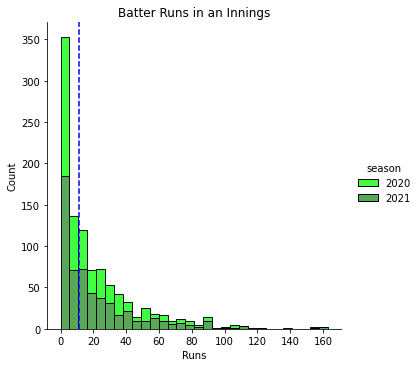

In [95]:
#plot distribution of  batter runs in an innings
plt.figure(figsize=(4,4))
sns.displot(data=batter_runs_innings,x='runs_off_bat',hue='season',palette=['lime','forestgreen'],multiple='stack',bins=30)
plt.title('Batter Runs in an Innings')
plt.xlabel('Runs')
plt.axvline(x=batter_runs_innings.runs_off_bat.median(),color='blue',ls='--',lw=1.5) #show median line

plt.savefig('C:\\Users\\DELL\\Cricdata\\batter_runsinns_hist.jpeg',bbox_inches='tight')
plt.show()

The median runs scored in a single match by an individual player inclusive of being a batter, allrounder or bowler, was around 10. Most players scored between 0 to 40 runs in a match. Comparatively a smaller number of players scored 50 runs or more with only few reaching the coveted milestone of scoring a century or more runs.

In [121]:
bdf_2020 = batter_runs_innings[batter_runs_innings['season']==2020].sort_values('runs_off_bat',ascending=False)
bdf_2020 = bdf_2020.reset_index(drop=True)
bdf_2020 = bdf_2020[['batter_labels','runs_off_bat','message']]
bdf_2020.head(15)

,batter_labels,runs_off_bat,message
0,GL Adams (Southern Vipers),154,vs Western Storm (13/09/2020)
1,SJ Bryce (Lightning),136,vs Central Sparks (19/09/2020)
2,E Jones (Central Sparks),115,vs Lightning (19/09/2020)
3,GM Hennessy (Western Storm),105,vs Sunrisers (19/09/2020)
4,NR Sciver (Northern Diamonds),104,vs Lightning (31/08/2020)
5,SN Luff (Western Storm),104,vs South East Stars (11/09/2020)
6,AD Carr (Sunrisers),99,vs South East Stars (31/08/2020)
7,SIR Dunkley (South East Stars),97,vs Sunrisers (31/08/2020)
8,AL MacDonald (Northern Diamonds),92,vs Thunder (10/09/2020)
9,HC Knight (Western Storm),91,vs South East Stars (29/08/2020)


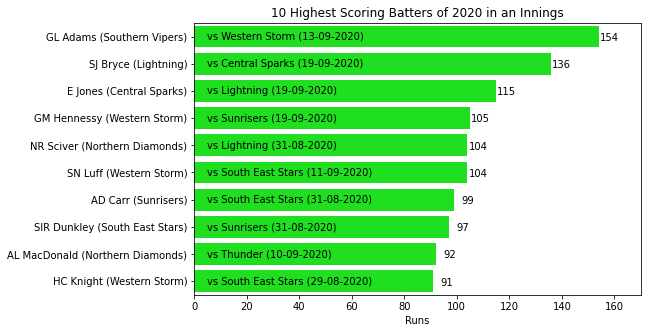

In [98]:
#plot 10 Highest Scoring Batters of 2020 in an Innings
df = bdf_2020.head(10)

plt.figure(figsize=(8, 5))

plt.title('10 Highest Scoring Batters of 2020 in an Innings')
ax = sns.barplot(data=df, x='runs_off_bat', y=df.index, orient='h',color='lime')
ax.set_yticklabels(df.batter_labels)
plt.xlabel('Runs')
plt.xlim(0,170)
# write messages on bars
for bar, msg in zip(ax.patches,df['message']):
    ax.text(5, bar.get_y()+bar.get_height()/2, msg, color='black', ha='left', va='center')

# set the bar labels
for p in ax.patches:
    ax.annotate(  p.get_width().astype(int) ,( (p.get_x() + p.get_width()), p.get_y() ), 
                xytext=(20,-15),fontsize=10,color='black',textcoords='offset points',horizontalalignment='right' )
    
plt.savefig('C:\\Users\\DELL\\Cricdata\\Battermostruns2020_innings.jpeg',bbox_inches='tight')
plt.show()

The highest individual runs scored in 2020 was 154 by GL Adams from Southern Vipers against Western Storm on 13th September. The second highest runs scored was 136 by SJ Bryce from Lightning against Central Sparks on 19th September. Four other batters scored centuries in that year. Two players from Western Storm SN Luff and GM Henessey scored 104 and 105 respectively. E Jones from Central Sparks scored 115 and NR Sciver from Northern Diamond scored 104. 

In [99]:
bdf_2020_overall = bdf_2020.groupby(['batter_labels']).agg({'runs_off_bat':'sum'}).reset_index()
bdf_2020_overall = bdf_2020_overall.sort_values('runs_off_bat', ascending=False)
bdf_2020_overall.reset_index(drop=True,inplace=True)
bdf_2020_overall.head(15)

,batter_labels,runs_off_bat
0,GL Adams (Southern Vipers),500
1,SJ Bryce (Lightning),395
2,SN Luff (Western Storm),339
3,E Jones (Central Sparks),334
4,Marie Kelly (Central Sparks),223
5,GM Hennessy (Western Storm),209
6,SL Kalis (Northern Diamonds),197
7,J Gardner (Sunrisers),193
8,N Brown (Thunder),189
9,ME Bouchier (Southern Vipers),183


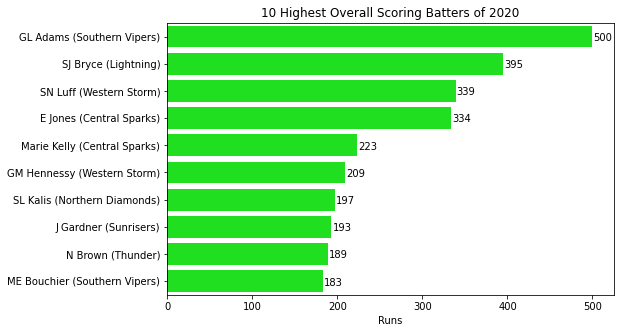

In [100]:
#plot 10 Highest Overall Scoring Batters of 2020
df = bdf_2020_overall.head(10)

plt.figure(figsize=(8, 5))

plt.title('10 Highest Overall Scoring Batters of 2020')
ax = sns.barplot(data=df, x='runs_off_bat', y=df.index, orient='h',color='lime')
ax.set_yticklabels(df.batter_labels)
plt.xlabel('Runs')

# set the bar labels
for p in ax.patches:
    ax.annotate(  p.get_width().astype(int) ,( (p.get_x() + p.get_width()), p.get_y() ), 
                xytext=(20,-15),fontsize=10,color='black',textcoords='offset points',horizontalalignment='right' )
    
plt.savefig('C:\\Users\\DELL\\Cricdata\\Battermostruns2020_overall.jpeg',bbox_inches='tight')
plt.show()

GL Adams from Southern vipers was the highest net run scorer of 2020 season with 500 runs from all the matches. SJ Bryce from Lightning was second highest with 395 runs followed by SN Luff from Western Storm with 339 and E Jones from Central Sparks with 334. 

In [101]:
bdf_2021 = batter_runs_innings[batter_runs_innings['season']==2021].sort_values('runs_off_bat',ascending=False)
bdf_2021 = bdf_2021.reset_index(drop=True)
bdf_2021 = bdf_2021[['batter_labels','runs_off_bat','message']]
bdf_2021.head(15)

,batter_labels,runs_off_bat,message
0,AE Jones (Central Sparks),163,vs Western Storm (31-05-2021)
1,KE Bryce (Lightning),162,vs Central Sparks (18-09-2021)
2,SN Luff (Western Storm),157,vs Sunrisers (18-09-2021)
3,EL Lamb (Thunder),121,vs Western Storm (29-05-2021)
4,AE Jones (Central Sparks),114,vs Northern Diamonds (29-05-2021)
5,GA Elwiss (Southern Vipers),112,vs Sunrisers (12-09-2021)
6,L Winfield (Northern Diamonds),110,vs Central Sparks (29-05-2021)
7,SIR Dunkley (South East Stars),104,vs Sunrisers (29-05-2021)
8,E Jones (Central Sparks),100,vs Thunder (12-06-2021)
9,AN Davidson-Richards (South East Stars),92,vs Western Storm (05-06-2021)


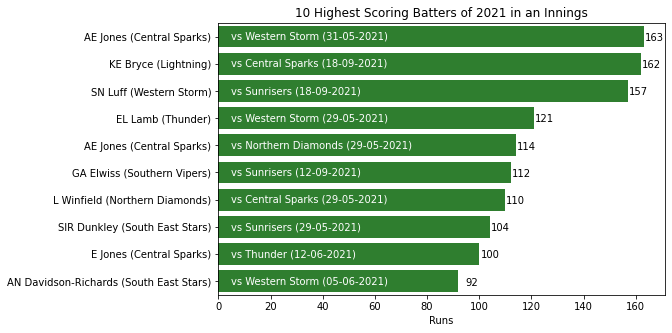

In [102]:
#plot 10 Highest Scoring Batters of 2021 in an Innings
df = bdf_2021.head(10)

plt.figure(figsize=(8, 5))

plt.title('10 Highest Scoring Batters of 2021 in an Innings')
ax = sns.barplot(data=df, x='runs_off_bat', y=df.index, orient='h',color='forestgreen')
ax.set_yticklabels(df.batter_labels)
plt.xlabel('Runs')

# write messages on bars
for bar, msg in zip(ax.patches,df['message']):
    ax.text(5, bar.get_y()+bar.get_height()/2, msg, color='white', ha='left', va='center')

# set the bar labels
for p in ax.patches:
    ax.annotate(  p.get_width().astype(int) ,( (p.get_x() + p.get_width()), p.get_y() ), 
                xytext=(20,-15),fontsize=10,color='black',textcoords='offset points',horizontalalignment='right' )
    
plt.savefig('C:\\Users\\DELL\\Cricdata\\Battermostruns2021_innings.jpeg',bbox_inches='tight')
plt.show()

More centuries were scored in the year 2021. Every team except Sunrisers had at least one player scoring century. AE Jones from Central Sparks scored centuries twice, one being 114 against Northern Diamonds on 29th May and other was 163 against versus Western Storm and on 31st May. The latter was also the highest individual runs of 2021. Central Sparks also had another century scorer E jones with 100 runs. KE Bryce from Lightning scored 162 followed by SN Luff from Western Storm 157 and EL Lamb from Thunder with 121. For Southern Vipers, GA Elwiss was the highest individual run scorer with 112. For Northern Diamonds it was L Winfield with 110 runs and similarly for South East Stars it was SIR Dunkley who scored 104 runs. 

In [103]:
bdf_2021_overall = bdf_2021.groupby(['batter_labels']).agg({'runs_off_bat':'sum'}).reset_index()
bdf_2021_overall = bdf_2021_overall.sort_values('runs_off_bat', ascending=False)
bdf_2021_overall.reset_index(drop=True,inplace=True)
bdf_2021_overall.head(15)

,batter_labels,runs_off_bat
0,SN Luff (Western Storm),417
1,KE Bryce (Lightning),353
2,E Jones (Central Sparks),299
3,SL Kalis (Northern Diamonds),290
4,AE Jones (Central Sparks),282
5,CL Griffith (Sunrisers),273
6,GA Elwiss (Southern Vipers),265
7,BF Smith (South East Stars),252
8,EL Lamb (Thunder),237
9,GL Adams (Southern Vipers),233


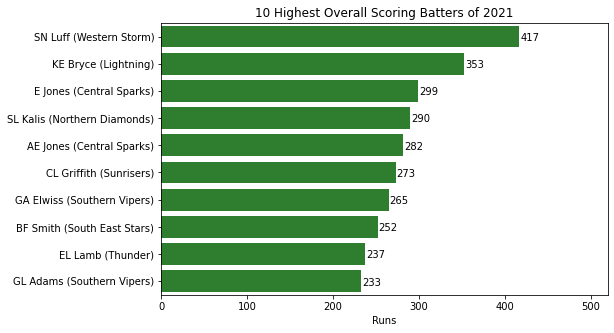

In [104]:
#plot 10 Highest Overall Scoring Batters of 2020
df = bdf_2021_overall.head(10)

plt.figure(figsize=(8, 5))

plt.title('10 Highest Overall Scoring Batters of 2021')
ax = sns.barplot(data=df, x='runs_off_bat', y=df.index, orient='h',color='forestgreen')
ax.set_yticklabels(df.batter_labels)
plt.xlabel('Runs')
ax.set_xlim(0,520)

# set the bar labels
for p in ax.patches:
    ax.annotate(  p.get_width().astype(int) ,( (p.get_x() + p.get_width()), p.get_y() ), 
                xytext=(20,-15),fontsize=10,color='black',textcoords='offset points',horizontalalignment='right' )
    
plt.savefig('C:\\Users\\DELL\\Cricdata\\Battermostruns2021_overall.jpeg',bbox_inches='tight')
plt.show()

In 2021, SN Luff had the highest net runs of 417. Only another batter KE Bryce from Lightning had above 300 runs with 353.

In [122]:
batter_runs_innings.head()

,match_id,season,start_date,innings,batting_team,bowling_team,striker,runs_off_bat,balls_faced,strike_rate,50s,100s,wicket_status,batter_labels,message
0,1229326,2020,29-08-2020,1,Sunrisers,Southern Vipers,AD Carr,4,15,26.67,0,0,out,AD Carr (Sunrisers),vs Southern Vipers (29/08/2020)
1,1229326,2020,29-08-2020,1,Sunrisers,Southern Vipers,AJ Macleod,2,4,50.00,0,0,out,AJ Macleod (Sunrisers),vs Southern Vipers (29/08/2020)
2,1229326,2020,29-08-2020,1,Sunrisers,Southern Vipers,FC Wilson,11,15,73.33,0,0,out,FC Wilson (Sunrisers),vs Southern Vipers (29/08/2020)
3,1229326,2020,29-08-2020,1,Sunrisers,Southern Vipers,G Scrivens,8,21,38.10,0,0,out,G Scrivens (Sunrisers),vs Southern Vipers (29/08/2020)
4,1229326,2020,29-08-2020,1,Sunrisers,Southern Vipers,J Gardner,13,15,86.67,0,0,out,J Gardner (Sunrisers),vs Southern Vipers (29/08/2020)


In [106]:
batter_runs_overall = batter_runs_innings.groupby(['season','batting_team',
                                                   'striker','batter_labels']).agg({'runs_off_bat':'sum'}).reset_index()

In [107]:
batter_runs_overall.head()

,season,batting_team,striker,batter_labels,runs_off_bat
0,2020,Central Sparks,AE Jones,AE Jones (Central Sparks),38
1,2020,Central Sparks,Anisha Patel,Anisha Patel (Central Sparks),4
2,2020,Central Sparks,CAE Hill,CAE Hill (Central Sparks),34
3,2020,Central Sparks,CK Boycott,CK Boycott (Central Sparks),53
4,2020,Central Sparks,E Jones,E Jones (Central Sparks),334


In [108]:
batter_runs_overall = batter_runs_overall.sort_values('runs_off_bat', ascending=False)
batter_runs_overall.reset_index(drop=True,inplace=True)
batter_runs_overall.head(15)

,season,batting_team,striker,batter_labels,runs_off_bat
0,2020,Southern Vipers,GL Adams,GL Adams (Southern Vipers),500
1,2021,Western Storm,SN Luff,SN Luff (Western Storm),417
2,2020,Lightning,SJ Bryce,SJ Bryce (Lightning),395
3,2021,Lightning,KE Bryce,KE Bryce (Lightning),353
4,2020,Western Storm,SN Luff,SN Luff (Western Storm),339
5,2020,Central Sparks,E Jones,E Jones (Central Sparks),334
6,2021,Central Sparks,E Jones,E Jones (Central Sparks),299
7,2021,Northern Diamonds,SL Kalis,SL Kalis (Northern Diamonds),290
8,2021,Central Sparks,AE Jones,AE Jones (Central Sparks),282
9,2021,Sunrisers,CL Griffith,CL Griffith (Sunrisers),273


<Figure size 288x288 with 0 Axes>

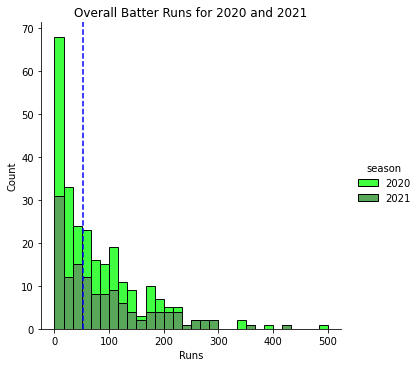

In [109]:
#plot distribution of  batter runs in an innings
plt.figure(figsize=(4,4))
sns.displot(data=batter_runs_overall,x='runs_off_bat',hue='season',palette=['lime','forestgreen'],multiple='stack',bins=30)
plt.title('Overall Batter Runs for 2020 and 2021')
plt.xlabel('Runs')
plt.axvline(x=batter_runs_overall.runs_off_bat.median(),color='blue',ls='--',lw=1.5) #show median line

plt.savefig('C:\\Users\\DELL\\Cricdata\\batter_runsoverall_hist.jpeg',bbox_inches='tight')
plt.show()

In case of cumulative runs scored in all the matches in each year by players (inclusive of batters, allrounders or bowlers), the median was around 50. Most had a net run tally ranging from 0 to 100 while some scored above 200 and few even scored more than 300 runs. 

In [110]:
#find the batter overall runs of both seasons
batter_order=batter_runs_overall.groupby('batter_labels')['runs_off_bat'].sum().sort_values(ascending=False)
batter_order[:15]

batter_labels
SN Luff (Western Storm)            756
GL Adams (Southern Vipers)         733
E Jones (Central Sparks)           633
SJ Bryce (Lightning)               597
KE Bryce (Lightning)               494
SL Kalis (Northern Diamonds)       487
Marie Kelly (Central Sparks)       405
HC Knight (Western Storm)          381
ME Bouchier (Southern Vipers)      378
HJ Armitage (Northern Diamonds)    373
GM Davies (Central Sparks)         362
CL Griffith (Sunrisers)            357
GEB Boyce (Thunder)                337
DN Wyatt (Southern Vipers)         325
AE Jones (Central Sparks)          320
Name: runs_off_bat, dtype: int64

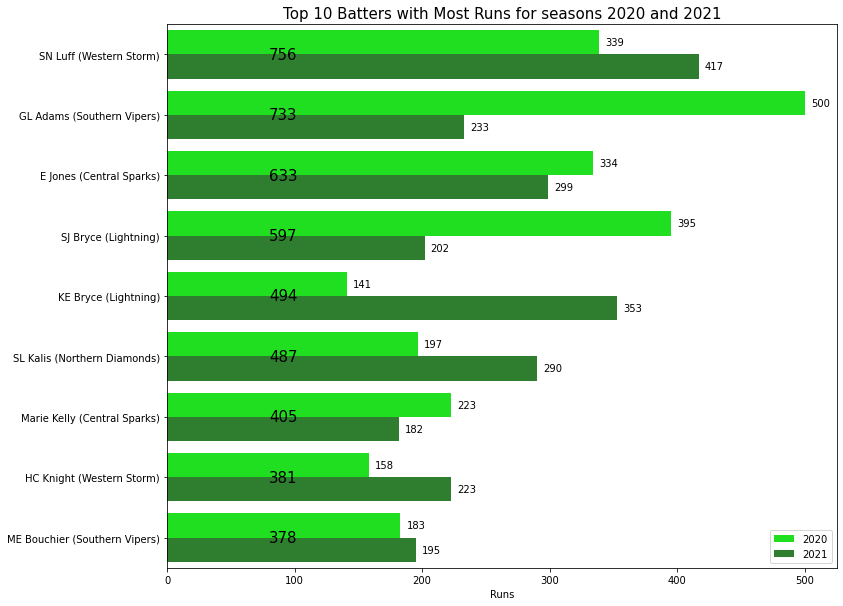

In [111]:
#plot batters with most runs for both seasons
plt.figure(figsize=(12,10))
plt.title('Top 10 Batters with Most Runs for seasons 2020 and 2021',fontsize=15) 
ax=sns.barplot(data=batter_runs_overall,x='runs_off_bat',y='batter_labels',orient='h',hue='season',
               palette=['lime','forestgreen'],order=batter_order[:9].index.values)

# set the bar labels
for p in ax.patches:
   ax.annotate( p.get_width().astype(int),( (p.get_x() + p.get_width()), p.get_y() ), 
                xytext=(25,-15),fontsize=10,color='black',textcoords='offset points',horizontalalignment='right' )

# write values on bars
for bar, msg in zip(ax.patches, batter_order[:9]):
    ax.text(80, bar.get_y()+bar.get_height()/1.0, msg, fontsize=15,color='black', ha='left', va='center')
    
plt.xlabel('Runs')
plt.ylabel('')
ax.legend(loc='lower right')

plt.savefig('C:\\Users\\DELL\\Cricdata\BatterRunsbothseasons.jpeg',bbox_inches='tight')
plt.show()

### <center> 1.3 Strike Rate and  Batting Average <center>

Batting Strike Rate is a measure of the average number of runs scored by a batter per 100 balls faced. 

Batting Strike Rate = (Runs/No. of Balls faced) x 100

Batting Average is a performance parameter of batters given by the ratio of the total runs they have scored to the number of times they have been out.

Batting Average =  Total Runs/No.of dismissals or outs

In [113]:
batter_runs_innings.head()

,match_id,season,start_date,innings,batting_team,bowling_team,striker,runs_off_bat,balls_faced,strike_rate,50s,100s,wicket_status,batter_labels,message
0,1229326,2020,29-08-2020,1,Sunrisers,Southern Vipers,AD Carr,4,15,26.67,0,0,out,AD Carr (Sunrisers),vs Southern Vipers (29-08-2020)
1,1229326,2020,29-08-2020,1,Sunrisers,Southern Vipers,AJ Macleod,2,4,50.00,0,0,out,AJ Macleod (Sunrisers),vs Southern Vipers (29-08-2020)
2,1229326,2020,29-08-2020,1,Sunrisers,Southern Vipers,FC Wilson,11,15,73.33,0,0,out,FC Wilson (Sunrisers),vs Southern Vipers (29-08-2020)
3,1229326,2020,29-08-2020,1,Sunrisers,Southern Vipers,G Scrivens,8,21,38.10,0,0,out,G Scrivens (Sunrisers),vs Southern Vipers (29-08-2020)
4,1229326,2020,29-08-2020,1,Sunrisers,Southern Vipers,J Gardner,13,15,86.67,0,0,out,J Gardner (Sunrisers),vs Southern Vipers (29-08-2020)


In [ ]:
batter_runs_innings['runs_range']=np.nan

for i in range(len(batter_runs_innings)):
    if batter_runs_innings['runs_off_bat'][i] < 20:
        batter_runs_innings['runs_range'][i] = "<20"
    elif batter_runs_innings['runs_off_bat'][i] >= 20 and batter_runs_innings['runs_off_bat'][i] <= 49:
        batter_runs_innings['runs_range'][i] = "20-49"
    elif batter_runs_innings['runs_off_bat'][i] >= 50 and batter_runs_innings['runs_off_bat'][i] <= 99:
        batter_runs_innings['runs_range'][i] = "50-99"
    else:
        batter_runs_innings['runs_range'][i] = ">=100"

In [ ]:
#save the dataframe to csv file
#batter_runs_innings.to_csv("C:\\Users\\DELL\\Cricdata\\batter_runs_innings.csv",index=False)

*Some data were externally added to the batter_runs_innings file, so this file is being read again from the updated version*

In [114]:
batter_runs_innings=pd.read_csv("C:\\Users\\DELL\\Cricdata\\batter_runs_innings.csv")

In [115]:
batter_runs_innings.head()

,match_id,season,start_date,innings,batting_team,bowling_team,striker,runs_off_bat,balls_faced,strike_rate,50s,100s,wicket_status,batter_labels,message,runs_range
0,1229326,2020,29-08-2020,1,Sunrisers,Southern Vipers,AD Carr,4,15,26.67,0,0,out,AD Carr (Sunrisers),vs Southern Vipers (29/08/2020),<20
1,1229326,2020,29-08-2020,1,Sunrisers,Southern Vipers,AJ Macleod,2,4,50.00,0,0,out,AJ Macleod (Sunrisers),vs Southern Vipers (29/08/2020),<20
2,1229326,2020,29-08-2020,1,Sunrisers,Southern Vipers,FC Wilson,11,15,73.33,0,0,out,FC Wilson (Sunrisers),vs Southern Vipers (29/08/2020),<20
3,1229326,2020,29-08-2020,1,Sunrisers,Southern Vipers,G Scrivens,8,21,38.10,0,0,out,G Scrivens (Sunrisers),vs Southern Vipers (29/08/2020),<20
4,1229326,2020,29-08-2020,1,Sunrisers,Southern Vipers,J Gardner,13,15,86.67,0,0,out,J Gardner (Sunrisers),vs Southern Vipers (29/08/2020),<20


<Figure size 360x360 with 0 Axes>

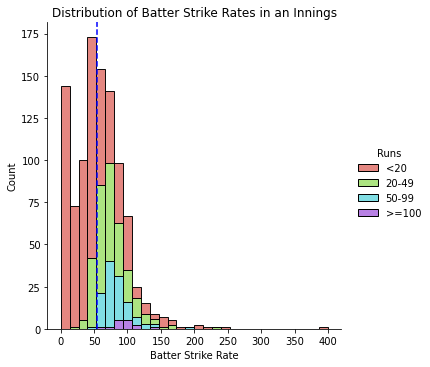

In [116]:
#plot distribution of strike rates of batters in an innings
plt.figure(figsize=(5,5))
ax=sns.displot(data=batter_runs_innings,x='strike_rate',bins=30,multiple="stack",hue='runs_range',
            hue_order=["<20","20-49","50-99",">=100"],palette="hls")
plt.title('Distribution of Batter Strike Rates in an Innings')
plt.xlabel('Batter Strike Rate')
ax._legend.set_title('Runs')
plt.axvline(x=batter_runs_innings.strike_rate.median(),color='blue',ls='--',lw=1.5) #show median line

plt.savefig('C:\\Users\\DELL\\Cricdata\\BatterStrkrate_innings.jpeg',bbox_inches='tight')
plt.show()

Most batting strike rates in an innings varied between 0 and 100 with the median being around 50. In general, most low batting strike rates were observed for those who scored less than 20 runs. The strike rate rarely exceeded 150 for some batters scoring runs in the range of 0 to 49. Batters with above 50 runs had strike rates varying between around 60 and around 150. The range was closer to 100 for batters scoring centuries. 

In [152]:
batter_stats = batter_runs_innings.groupby(['batting_team','striker',
                                            'batter_labels']).agg({'runs_off_bat':'sum','balls_faced':'sum',
                                                                   '50s':'sum','100s':'sum','strike_rate':'mean'}).reset_index()

batter_stats.head(15)

,batting_team,striker,batter_labels,runs_off_bat,balls_faced,50s,100s,strike_rate
0,Central Sparks,AE Jones,AE Jones (Central Sparks),320,311,0,2,77.834000
1,Central Sparks,Anisha Patel,Anisha Patel (Central Sparks),4,10,0,0,51.110000
2,Central Sparks,CAE Hill,CAE Hill (Central Sparks),83,160,0,0,61.416667
3,Central Sparks,CK Boycott,CK Boycott (Central Sparks),101,214,0,0,49.404286
4,Central Sparks,D Perrin,D Perrin (Central Sparks),92,128,0,0,63.687500
5,Central Sparks,E Jones,E Jones (Central Sparks),633,980,4,2,55.045714
6,Central Sparks,EA Russell,EA Russell (Central Sparks),12,13,0,0,68.666000
7,Central Sparks,EL Arlott,EL Arlott (Central Sparks),108,144,0,0,71.681250
8,Central Sparks,GK Davis,GK Davis (Central Sparks),24,39,0,0,74.257500
9,Central Sparks,GM Davies,GM Davies (Central Sparks),362,566,2,0,46.879286


In [153]:
batter_dismissals = batter_runs_innings[batter_runs_innings['wicket_status']=='out']
batter_dismissals.head()

,match_id,season,start_date,innings,batting_team,bowling_team,striker,runs_off_bat,balls_faced,strike_rate,50s,100s,wicket_status,batter_labels,message,runs_range
0,1229326,2020,29-08-2020,1,Sunrisers,Southern Vipers,AD Carr,4,15,26.67,0,0,out,AD Carr (Sunrisers),vs Southern Vipers (29/08/2020),<20
1,1229326,2020,29-08-2020,1,Sunrisers,Southern Vipers,AJ Macleod,2,4,50.00,0,0,out,AJ Macleod (Sunrisers),vs Southern Vipers (29/08/2020),<20
2,1229326,2020,29-08-2020,1,Sunrisers,Southern Vipers,FC Wilson,11,15,73.33,0,0,out,FC Wilson (Sunrisers),vs Southern Vipers (29/08/2020),<20
3,1229326,2020,29-08-2020,1,Sunrisers,Southern Vipers,G Scrivens,8,21,38.10,0,0,out,G Scrivens (Sunrisers),vs Southern Vipers (29/08/2020),<20
4,1229326,2020,29-08-2020,1,Sunrisers,Southern Vipers,J Gardner,13,15,86.67,0,0,out,J Gardner (Sunrisers),vs Southern Vipers (29/08/2020),<20


In [154]:
batter_dismissals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857 entries, 0 to 1017
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   match_id       857 non-null    int64  
 1   season         857 non-null    int64  
 2   start_date     857 non-null    object 
 3   innings        857 non-null    int64  
 4   batting_team   857 non-null    object 
 5   bowling_team   857 non-null    object 
 6   striker        857 non-null    object 
 7   runs_off_bat   857 non-null    int64  
 8   balls_faced    857 non-null    int64  
 9   strike_rate    857 non-null    float64
 10  50s            857 non-null    int64  
 11  100s           857 non-null    int64  
 12  wicket_status  857 non-null    object 
 13  batter_labels  857 non-null    object 
 14  message        857 non-null    object 
 15  runs_range     857 non-null    object 
dtypes: float64(1), int64(7), object(8)
memory usage: 113.8+ KB


In [155]:
batter_dismissals=batter_dismissals.groupby(['batting_team','striker',
                                             'batter_labels','wicket_status']).size().reset_index(name='dismissals')

In [140]:
batter_dismissals.head(10)

,batting_team,striker,batter_labels,wicket_status,dismissals
0,Central Sparks,AE Jones,AE Jones (Central Sparks),out,4
1,Central Sparks,Anisha Patel,Anisha Patel (Central Sparks),out,2
2,Central Sparks,CAE Hill,CAE Hill (Central Sparks),out,4
3,Central Sparks,CK Boycott,CK Boycott (Central Sparks),out,6
4,Central Sparks,D Perrin,D Perrin (Central Sparks),out,4
5,Central Sparks,E Jones,E Jones (Central Sparks),out,12
6,Central Sparks,EA Russell,EA Russell (Central Sparks),out,3
7,Central Sparks,EL Arlott,EL Arlott (Central Sparks),out,5
8,Central Sparks,GK Davis,GK Davis (Central Sparks),out,3
9,Central Sparks,GM Davies,GM Davies (Central Sparks),out,14


In [156]:
batter_dismissals.drop('wicket_status',axis=1,inplace=True)
batter_dismissals.head()

,batting_team,striker,batter_labels,dismissals
0,Central Sparks,AE Jones,AE Jones (Central Sparks),4
1,Central Sparks,Anisha Patel,Anisha Patel (Central Sparks),2
2,Central Sparks,CAE Hill,CAE Hill (Central Sparks),4
3,Central Sparks,CK Boycott,CK Boycott (Central Sparks),6
4,Central Sparks,D Perrin,D Perrin (Central Sparks),4


In [158]:
batter_stats = pd.merge(batter_stats,batter_dismissals,how="outer",on=['batting_team','striker','batter_labels']) 

In [159]:
batter_stats.head()

,batting_team,striker,batter_labels,runs_off_bat,balls_faced,50s,100s,strike_rate,dismissals
0,Central Sparks,AE Jones,AE Jones (Central Sparks),320,311,0,2,77.834000,4.0
1,Central Sparks,Anisha Patel,Anisha Patel (Central Sparks),4,10,0,0,51.110000,2.0
2,Central Sparks,CAE Hill,CAE Hill (Central Sparks),83,160,0,0,61.416667,4.0
3,Central Sparks,CK Boycott,CK Boycott (Central Sparks),101,214,0,0,49.404286,6.0
4,Central Sparks,D Perrin,D Perrin (Central Sparks),92,128,0,0,63.687500,4.0


In [160]:
batter_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batting_team   158 non-null    object 
 1   striker        158 non-null    object 
 2   batter_labels  158 non-null    object 
 3   runs_off_bat   158 non-null    int64  
 4   balls_faced    158 non-null    int64  
 5   50s            158 non-null    int64  
 6   100s           158 non-null    int64  
 7   strike_rate    158 non-null    float64
 8   dismissals     156 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 12.3+ KB


In [161]:
batter_stats.isnull().sum()

batting_team     0
striker          0
batter_labels    0
runs_off_bat     0
balls_faced      0
50s              0
100s             0
strike_rate      0
dismissals       2
dtype: int64

In [162]:
batter_stats[batter_stats[['dismissals']].isnull().any(axis=1)]

,batting_team,striker,batter_labels,runs_off_bat,balls_faced,50s,100s,strike_rate,dismissals
25,Lightning,Ilenia Sims,Ilenia Sims (Lightning),1,7,0,0,14.29,NaN
26,Lightning,J Groves,J Groves (Lightning),2,3,0,0,66.67,NaN


In [163]:
batting_info[(batting_info['player_dismissed']=="Ilenia Sims") | (batting_info['player_dismissed']=="J Groves")]

,match_id,season,start_date,innings,over,batting_team,bowling_team,striker,non_striker,runs_off_bat,extras,wicket_type,player_dismissed,partnership


In [164]:
batting_info[(batting_info['striker']=="Ilenia Sims") | (batting_info['striker']=="J Groves")]

,match_id,season,start_date,innings,over,batting_team,bowling_team,striker,non_striker,runs_off_bat,extras,wicket_type,player_dismissed,partnership
10005,1229344.0,2020.0,13-09-2020,2.0,37.0,Lightning,Thunder,Ilenia Sims,AJ Freeborn,0.0,0.0,NaN,NaN,Ilenia Sims & AJ Freeborn
10006,1229344.0,2020.0,13-09-2020,2.0,37.0,Lightning,Thunder,Ilenia Sims,AJ Freeborn,0.0,0.0,NaN,NaN,Ilenia Sims & AJ Freeborn
10007,1229344.0,2020.0,13-09-2020,2.0,39.0,Lightning,Thunder,Ilenia Sims,AJ Freeborn,0.0,0.0,NaN,NaN,Ilenia Sims & AJ Freeborn
10008,1229344.0,2020.0,13-09-2020,2.0,39.0,Lightning,Thunder,Ilenia Sims,AJ Freeborn,0.0,0.0,NaN,NaN,Ilenia Sims & AJ Freeborn
10009,1229344.0,2020.0,13-09-2020,2.0,39.0,Lightning,Thunder,Ilenia Sims,AJ Freeborn,0.0,0.0,NaN,NaN,Ilenia Sims & AJ Freeborn
10010,1229344.0,2020.0,13-09-2020,2.0,39.0,Lightning,Thunder,Ilenia Sims,AJ Freeborn,1.0,0.0,NaN,NaN,Ilenia Sims & AJ Freeborn
10011,1229344.0,2020.0,13-09-2020,2.0,39.0,Lightning,Thunder,Ilenia Sims,AJ Freeborn,0.0,0.0,NaN,NaN,Ilenia Sims & AJ Freeborn
23486,1252281.0,2021.0,10-09-2021,2.0,49.0,Lightning,South East Stars,J Groves,S Munro,1.0,0.0,NaN,NaN,J Groves & S Munro
23487,1252281.0,2021.0,10-09-2021,2.0,50.0,Lightning,South East Stars,J Groves,S Munro,0.0,1.0,NaN,NaN,J Groves & S Munro
23488,1252281.0,2021.0,10-09-2021,2.0,50.0,Lightning,South East Stars,J Groves,S Munro,1.0,0.0,NaN,NaN,J Groves & S Munro


In [165]:
batter_stats['dismissals']=batter_stats['dismissals'].fillna(0)

In [166]:
batter_stats.isnull().sum()

batting_team     0
striker          0
batter_labels    0
runs_off_bat     0
balls_faced      0
50s              0
100s             0
strike_rate      0
dismissals       0
dtype: int64

In [167]:
batter_stats.head()

,batting_team,striker,batter_labels,runs_off_bat,balls_faced,50s,100s,strike_rate,dismissals
0,Central Sparks,AE Jones,AE Jones (Central Sparks),320,311,0,2,77.834000,4.0
1,Central Sparks,Anisha Patel,Anisha Patel (Central Sparks),4,10,0,0,51.110000,2.0
2,Central Sparks,CAE Hill,CAE Hill (Central Sparks),83,160,0,0,61.416667,4.0
3,Central Sparks,CK Boycott,CK Boycott (Central Sparks),101,214,0,0,49.404286,6.0
4,Central Sparks,D Perrin,D Perrin (Central Sparks),92,128,0,0,63.687500,4.0


In [168]:
batter_matches=batter_runs_innings.groupby(['batting_team','striker','batter_labels']).size().reset_index(name='matches')
batter_matches.head(10)

,batting_team,striker,batter_labels,matches
0,Central Sparks,AE Jones,AE Jones (Central Sparks),5
1,Central Sparks,Anisha Patel,Anisha Patel (Central Sparks),3
2,Central Sparks,CAE Hill,CAE Hill (Central Sparks),6
3,Central Sparks,CK Boycott,CK Boycott (Central Sparks),7
4,Central Sparks,D Perrin,D Perrin (Central Sparks),4
5,Central Sparks,E Jones,E Jones (Central Sparks),14
6,Central Sparks,EA Russell,EA Russell (Central Sparks),5
7,Central Sparks,EL Arlott,EL Arlott (Central Sparks),8
8,Central Sparks,GK Davis,GK Davis (Central Sparks),4
9,Central Sparks,GM Davies,GM Davies (Central Sparks),14


In [169]:
batter_stats = pd.merge(batter_stats,batter_matches,how="outer",on=['batting_team','striker','batter_labels']) 

In [170]:
batter_stats.head(10)

,batting_team,striker,batter_labels,runs_off_bat,balls_faced,50s,100s,strike_rate,dismissals,matches
0,Central Sparks,AE Jones,AE Jones (Central Sparks),320,311,0,2,77.834000,4.0,5
1,Central Sparks,Anisha Patel,Anisha Patel (Central Sparks),4,10,0,0,51.110000,2.0,3
2,Central Sparks,CAE Hill,CAE Hill (Central Sparks),83,160,0,0,61.416667,4.0,6
3,Central Sparks,CK Boycott,CK Boycott (Central Sparks),101,214,0,0,49.404286,6.0,7
4,Central Sparks,D Perrin,D Perrin (Central Sparks),92,128,0,0,63.687500,4.0,4
5,Central Sparks,E Jones,E Jones (Central Sparks),633,980,4,2,55.045714,12.0,14
6,Central Sparks,EA Russell,EA Russell (Central Sparks),12,13,0,0,68.666000,3.0,5
7,Central Sparks,EL Arlott,EL Arlott (Central Sparks),108,144,0,0,71.681250,5.0,8
8,Central Sparks,GK Davis,GK Davis (Central Sparks),24,39,0,0,74.257500,3.0,4
9,Central Sparks,GM Davies,GM Davies (Central Sparks),362,566,2,0,46.879286,14.0,14


In [171]:
batter_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batting_team   158 non-null    object 
 1   striker        158 non-null    object 
 2   batter_labels  158 non-null    object 
 3   runs_off_bat   158 non-null    int64  
 4   balls_faced    158 non-null    int64  
 5   50s            158 non-null    int64  
 6   100s           158 non-null    int64  
 7   strike_rate    158 non-null    float64
 8   dismissals     158 non-null    float64
 9   matches        158 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 13.6+ KB


In [172]:
#create a new column for batting average
batter_stats['batting_average'] =  np.nan

for i in range(len(batter_stats)):
    if batter_stats['dismissals'][i] == 0:
        continue
    else:
        batter_stats['batting_average'][i] = batter_stats['runs_off_bat'][i]/batter_stats['dismissals'][i]

In [173]:
batter_stats.head(10)

,batting_team,striker,batter_labels,runs_off_bat,balls_faced,50s,100s,strike_rate,dismissals,matches,batting_average
0,Central Sparks,AE Jones,AE Jones (Central Sparks),320,311,0,2,77.834000,4.0,5,80.000000
1,Central Sparks,Anisha Patel,Anisha Patel (Central Sparks),4,10,0,0,51.110000,2.0,3,2.000000
2,Central Sparks,CAE Hill,CAE Hill (Central Sparks),83,160,0,0,61.416667,4.0,6,20.750000
3,Central Sparks,CK Boycott,CK Boycott (Central Sparks),101,214,0,0,49.404286,6.0,7,16.833333
4,Central Sparks,D Perrin,D Perrin (Central Sparks),92,128,0,0,63.687500,4.0,4,23.000000
5,Central Sparks,E Jones,E Jones (Central Sparks),633,980,4,2,55.045714,12.0,14,52.750000
6,Central Sparks,EA Russell,EA Russell (Central Sparks),12,13,0,0,68.666000,3.0,5,4.000000
7,Central Sparks,EL Arlott,EL Arlott (Central Sparks),108,144,0,0,71.681250,5.0,8,21.600000
8,Central Sparks,GK Davis,GK Davis (Central Sparks),24,39,0,0,74.257500,3.0,4,8.000000
9,Central Sparks,GM Davies,GM Davies (Central Sparks),362,566,2,0,46.879286,14.0,14,25.857143


In [174]:
batter_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 157
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   batting_team     158 non-null    object 
 1   striker          158 non-null    object 
 2   batter_labels    158 non-null    object 
 3   runs_off_bat     158 non-null    int64  
 4   balls_faced      158 non-null    int64  
 5   50s              158 non-null    int64  
 6   100s             158 non-null    int64  
 7   strike_rate      158 non-null    float64
 8   dismissals       158 non-null    float64
 9   matches          158 non-null    int64  
 10  batting_average  156 non-null    float64
dtypes: float64(3), int64(5), object(3)
memory usage: 18.9+ KB


In [175]:
batter_stats.columns

Index(['batting_team', 'striker', 'batter_labels', 'runs_off_bat',
       'balls_faced', '50s', '100s', 'strike_rate', 'dismissals', 'matches',
       'batting_average'],
      dtype='object')

In [176]:
batter_stats=batter_stats[['batting_team','striker','batter_labels','matches','balls_faced',
                          'runs_off_bat','50s','100s','dismissals','strike_rate','batting_average']]

In [177]:
batter_stats.head()

,batting_team,striker,batter_labels,matches,balls_faced,runs_off_bat,50s,100s,dismissals,strike_rate,batting_average
0,Central Sparks,AE Jones,AE Jones (Central Sparks),5,311,320,0,2,4.0,77.834000,80.000000
1,Central Sparks,Anisha Patel,Anisha Patel (Central Sparks),3,10,4,0,0,2.0,51.110000,2.000000
2,Central Sparks,CAE Hill,CAE Hill (Central Sparks),6,160,83,0,0,4.0,61.416667,20.750000
3,Central Sparks,CK Boycott,CK Boycott (Central Sparks),7,214,101,0,0,6.0,49.404286,16.833333
4,Central Sparks,D Perrin,D Perrin (Central Sparks),4,128,92,0,0,4.0,63.687500,23.000000


In [178]:
batter_stats['strike_rate']=batter_stats['strike_rate'].round(decimals=2)
batter_stats['batting_average']=batter_stats['batting_average'].round(decimals=2)
batter_stats['dismissals']=batter_stats['dismissals'].astype(int)

In [179]:
batter_stats.head()

,batting_team,striker,batter_labels,matches,balls_faced,runs_off_bat,50s,100s,dismissals,strike_rate,batting_average
0,Central Sparks,AE Jones,AE Jones (Central Sparks),5,311,320,0,2,4,77.83,80.00
1,Central Sparks,Anisha Patel,Anisha Patel (Central Sparks),3,10,4,0,0,2,51.11,2.00
2,Central Sparks,CAE Hill,CAE Hill (Central Sparks),6,160,83,0,0,4,61.42,20.75
3,Central Sparks,CK Boycott,CK Boycott (Central Sparks),7,214,101,0,0,6,49.40,16.83
4,Central Sparks,D Perrin,D Perrin (Central Sparks),4,128,92,0,0,4,63.69,23.00


In [ ]:
#save the dataframe to csv file
#batter_stats.to_csv("C:\\Users\\DELL\\Cricdata\\Batterstats_overall.csv",index=False)

*Some data were externally added to the Batterstats_overall file, so this file is being read again from the updated version*

In [180]:
batter_stats=pd.read_csv("C:\\Users\\DELL\\Cricdata\\Batterstats_overall.csv")

In [181]:
batter_stats['matches'].value_counts().sort_values(ascending=False)

5     19
3     17
4     16
13    16
2     16
7     15
1     13
6     10
12     7
9      6
11     6
10     6
8      5
14     4
16     1
15     1
Name: matches, dtype: int64

In [ ]:
batter_stats['matches_played'] = np.nan

for i in range(len(batter_stats)):
    if batter_stats['matches'][i] >= 1 and batter_stats['matches'][i] <= 5:
        batter_stats['matches_played'][i] = "1-5"
    elif batter_stats['matches'][i] >= 6 and batter_stats['matches'][i] <= 10:
        batter_stats['matches_played'][i] = "6-10"
    else:
        batter_stats['matches_played'][i] = ">=11"


In [182]:
batter_stats.head()

,batting_team,striker,batter_labels,matches,balls_faced,runs_off_bat,50s,100s,dismissals,strike_rate,batting_average,matches_played
0,Central Sparks,AE Jones,AE Jones (Central Sparks),5,311,320,0,2,4,77.83,80.00,1-5
1,Central Sparks,Anisha Patel,Anisha Patel (Central Sparks),3,10,4,0,0,2,51.11,2.00,1-5
2,Central Sparks,CAE Hill,CAE Hill (Central Sparks),6,160,83,0,0,4,61.42,20.75,6-10
3,Central Sparks,CK Boycott,CK Boycott (Central Sparks),7,214,101,0,0,6,49.40,16.83,6-10
4,Central Sparks,D Perrin,D Perrin (Central Sparks),4,128,92,0,0,4,63.69,23.00,1-5


In [183]:
batter_stats['matches_played'].value_counts()

1-5     81
6-10    42
>=11    35
Name: matches_played, dtype: int64

<Figure size 360x360 with 0 Axes>

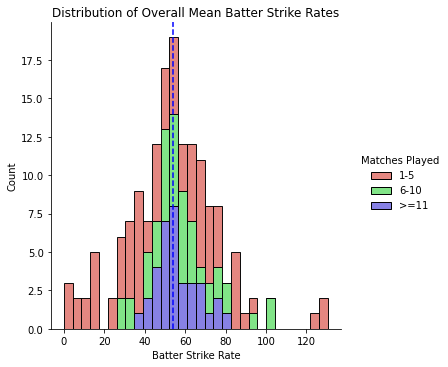

In [184]:
#plot distribution of overall strike rates of batters
plt.figure(figsize=(5,5))
ax=sns.displot(data=batter_stats,x='strike_rate',bins=30,multiple="stack",
               palette="hls",hue='matches_played',hue_order=["1-5","6-10",">=11"])
plt.title('Distribution of Overall Mean Batter Strike Rates')
plt.xlabel('Batter Strike Rate')
ax._legend.set_title('Matches Played')
plt.axvline(x=batter_stats.strike_rate.median(),color='blue',ls='--',lw=1.5)

plt.savefig('C:\\Users\\DELL\\Cricdata\\BatterStrkrate_overall.jpeg',bbox_inches='tight')
plt.show()

The median value was around 55. For batters with match experience from 1 to 5, their mean batting strike rates ranged from 0 to 100 with few exceeding 120. The range becomes narrower from around 30 to 100 for batters who have played between 6 to 10 matches. The most experienced batters having played over 11 matches have mean batting strike rates ranging from around 40 to 80.

<Figure size 360x360 with 0 Axes>

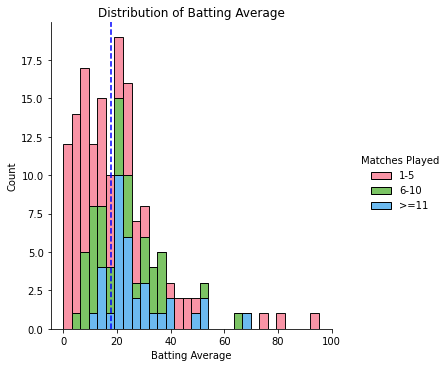

In [185]:
#plot distribution of overall average of batters
plt.figure(figsize=(5,5))
ax=sns.displot(data=batter_stats,x='batting_average',bins=30,multiple="stack",
               palette="husl",hue='matches_played',hue_order=["1-5","6-10",">=11"])
plt.title('Distribution of Batting Average')
plt.xlabel('Batting Average')
ax._legend.set_title('Matches Played')
plt.axvline(x=batter_stats.batting_average.median(),color='blue',ls='--',lw=1.5)

plt.savefig('C:\\Users\\DELL\\Cricdata\\BatterAvg_overall.jpeg',bbox_inches='tight')
plt.show()

The median batting average considering matches of the two seasons was close to 20. Most batters had batting averages within the range from 0 to 40 while only some had above 40 along with few above 60. For players with higher experience of more than 11 matches, their batting average ranged from around 10 to 40 with only few beyond that. Most lower batting averages were of players with match experience of 1 to 5 barring a few exceptions whose were above 40. 

In [186]:
bdf_strk = batter_stats.sort_values('strike_rate', ascending=False)
bdf_strk.reset_index(drop=True,inplace=True)
bdf_strk.head(15)

,batting_team,striker,batter_labels,matches,balls_faced,runs_off_bat,50s,100s,dismissals,strike_rate,batting_average,matches_played
0,Western Storm,A Shrubsole,A Shrubsole (Western Storm),3,75,101,1,0,2,130.62,50.50,1-5
1,Northern Diamonds,NR Sciver,NR Sciver (Northern Diamonds),5,174,134,0,1,3,127.86,44.67,1-5
2,South East Stars,MS Belt,MS Belt (South East Stars),2,8,5,0,0,1,125.00,5.00,1-5
3,South East Stars,BF Smith,BF Smith (South East Stars),9,278,269,2,0,9,100.94,29.89,6-10
4,Western Storm,DR Gibson,DR Gibson (Western Storm),8,118,133,0,0,6,100.67,22.17,6-10
5,Western Storm,A Griffiths,A Griffiths (Western Storm),7,276,262,2,0,7,93.82,37.43,6-10
6,Western Storm,HC Knight,HC Knight (Western Storm),5,419,381,5,0,4,92.22,95.25,1-5
7,Sunrisers,E Thorpe,E Thorpe (Sunrisers),2,26,23,0,0,1,90.00,23.00,1-5
8,Lightning,N Harman,N Harman (Lightning),5,56,43,0,0,5,86.67,8.60,1-5
9,South East Stars,PA Franklin,PA Franklin (South East Stars),5,105,82,0,0,4,86.31,20.50,1-5


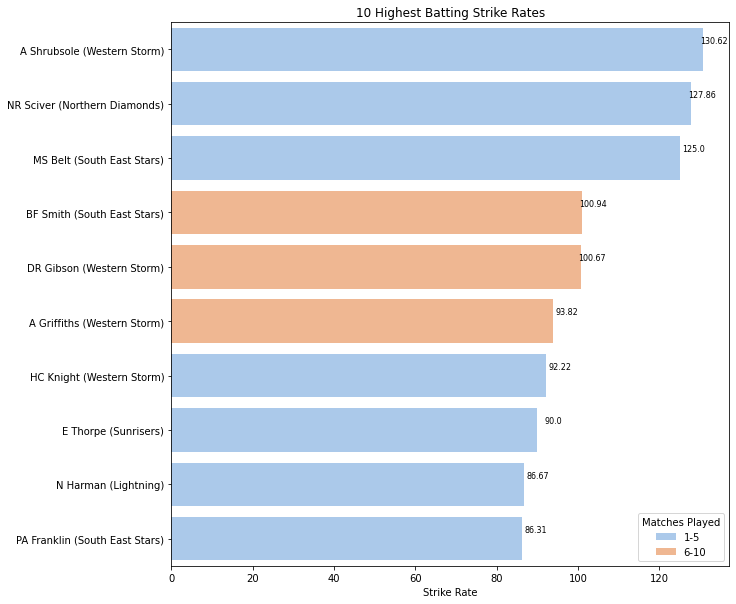

In [187]:
#plot batters with most strikerates
df=bdf_strk.head(10)

plt.figure(figsize=(10,10))

plt.title('10 Highest Batting Strike Rates')
ax = sns.barplot(data=df, x='strike_rate', y=df.index, orient='h',palette="pastel",hue=df.matches_played,dodge=False)
ax.set_yticklabels(df.batter_labels)
plt.xlabel('Strike Rate')
ax.legend_.set_title('Matches Played')

# set the bar labels
for p in ax.patches:
    ax.annotate(  p.get_width() ,( (p.get_x() + p.get_width()), p.get_y() ), 
                xytext=(25,-15),fontsize=8,color='black',textcoords='offset points',horizontalalignment='right' )
    
plt.savefig('C:\\Users\\DELL\\Cricdata\\Battermoststrkrates_overall.jpeg',bbox_inches='tight')
plt.show()

In [188]:
bdf_avg = batter_stats.sort_values('batting_average', ascending=False)
bdf_avg.reset_index(drop=True,inplace=True)
bdf_avg.head(15)

,batting_team,striker,batter_labels,matches,balls_faced,runs_off_bat,50s,100s,dismissals,strike_rate,batting_average,matches_played
0,Western Storm,HC Knight,HC Knight (Western Storm),5,419,381,5,0,4,92.22,95.25,1-5
1,Central Sparks,AE Jones,AE Jones (Central Sparks),5,311,320,0,2,4,77.83,80.00,1-5
2,South East Stars,SIR Dunkley,SIR Dunkley (South East Stars),5,343,298,2,1,4,67.46,74.50,1-5
3,Western Storm,SN Luff,SN Luff (Western Storm),13,1003,756,6,2,11,66.04,68.73,>=11
4,Southern Vipers,DN Wyatt,DN Wyatt (Southern Vipers),6,414,325,5,0,5,80.66,65.00,6-10
5,Southern Vipers,GA Elwiss,GA Elwiss (Southern Vipers),7,300,265,1,1,5,57.98,53.00,6-10
6,Central Sparks,E Jones,E Jones (Central Sparks),14,980,633,4,2,12,55.05,52.75,>=11
7,Southern Vipers,GL Adams,GL Adams (Southern Vipers),15,1013,733,6,1,14,57.75,52.36,>=11
8,Western Storm,A Shrubsole,A Shrubsole (Western Storm),3,75,101,1,0,2,130.62,50.50,1-5
9,Lightning,SJ Bryce,SJ Bryce (Lightning),13,824,597,5,1,12,59.34,49.75,>=11


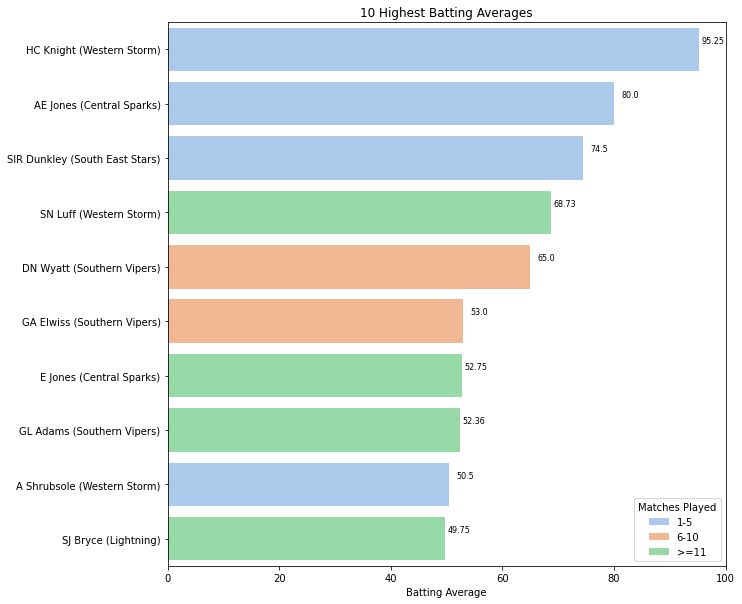

In [189]:
#plot batters with most averages
df=bdf_avg.head(10)

plt.figure(figsize=(10,10))

plt.title('10 Highest Batting Averages')
ax = sns.barplot(data=df, x='batting_average', y=df.index, orient='h',palette="pastel",
                 hue=df.matches_played,hue_order=["1-5","6-10",">=11"],dodge=False)
ax.set_yticklabels(df.batter_labels)
plt.xlabel('Batting Average')
ax.legend_.set_title('Matches Played')

# set the bar labels
for p in ax.patches:
    ax.annotate(  p.get_width() ,( (p.get_x() + p.get_width()), p.get_y() ), 
                xytext=(25,-15),fontsize=8,color='black',textcoords='offset points',horizontalalignment='right' )
    
plt.savefig('C:\\Users\\DELL\\Cricdata\\Battermostavg_overall.jpeg',bbox_inches='tight')
plt.show()

In [190]:
batter_stats.head()

,batting_team,striker,batter_labels,matches,balls_faced,runs_off_bat,50s,100s,dismissals,strike_rate,batting_average,matches_played
0,Central Sparks,AE Jones,AE Jones (Central Sparks),5,311,320,0,2,4,77.83,80.00,1-5
1,Central Sparks,Anisha Patel,Anisha Patel (Central Sparks),3,10,4,0,0,2,51.11,2.00,1-5
2,Central Sparks,CAE Hill,CAE Hill (Central Sparks),6,160,83,0,0,4,61.42,20.75,6-10
3,Central Sparks,CK Boycott,CK Boycott (Central Sparks),7,214,101,0,0,6,49.40,16.83,6-10
4,Central Sparks,D Perrin,D Perrin (Central Sparks),4,128,92,0,0,4,63.69,23.00,1-5


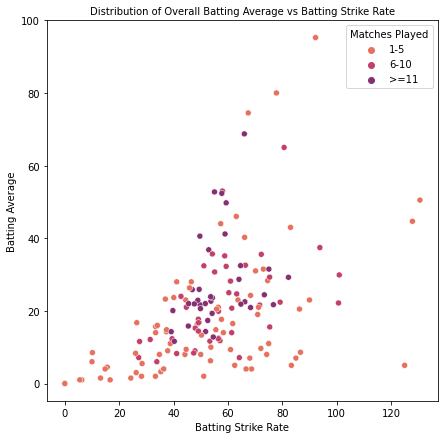

In [191]:
#plot Batting Average vs Batting Strike Rate
plt.figure(figsize=(7,7))
ax=sns.scatterplot(data=batter_stats,x='strike_rate',y='batting_average',
                   hue='matches_played',hue_order=["1-5","6-10",">=11"],palette='flare')

plt.title('Distribution of Overall Batting Average vs Batting Strike Rate', fontsize=10)
plt.ylabel('Batting Average')
plt.xlabel('Batting Strike Rate')
plt.legend(title='Matches Played')

plt.savefig('C:\\Users\\DELL\\Cricdata\\Battingavgvsstriikerate_overall.jpeg',bbox_inches='tight')
plt.show()

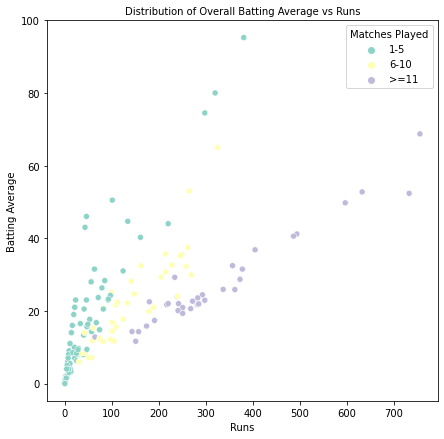

In [192]:
#plot Batting Average vs Runs
plt.figure(figsize=(7,7))
ax=sns.scatterplot(data=batter_stats,x='runs_off_bat',y='batting_average',
                   hue='matches_played',hue_order=["1-5","6-10",">=11"],palette='Set3')

plt.title('Distribution of Overall Batting Average vs Runs', fontsize=10)
plt.ylabel('Batting Average')
plt.xlabel('Runs')
plt.legend(title='Matches Played')

plt.savefig('C:\\Users\\DELL\\Cricdata\\Battingavgvsruns_overall.jpeg',bbox_inches='tight')
plt.show()

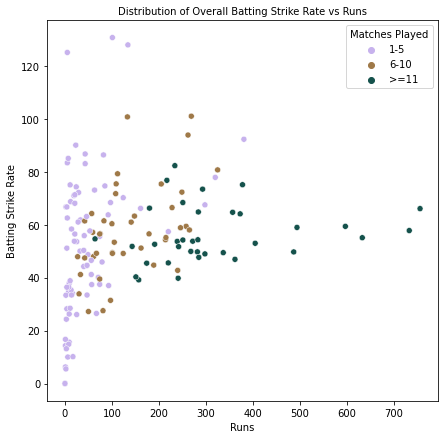

In [193]:
#plot Batting strike rate vs Runs
plt.figure(figsize=(7,7))
ax=sns.scatterplot(data=batter_stats,x='runs_off_bat',y='strike_rate',
                   hue='matches_played',hue_order=["1-5","6-10",">=11"],palette='cubehelix_r')

plt.title('Distribution of Overall Batting Strike Rate vs Runs', fontsize=10)
plt.ylabel('Batting Strike Rate')
plt.xlabel('Runs')
plt.legend(title='Matches Played')

plt.savefig('C:\\Users\\DELL\\Cricdata\\Battingstrkratevsruns_overall.jpeg',bbox_inches='tight')
plt.show()

In [ ]:
#save the dataframe to csv file
#batter_stats.to_csv("C:\\Users\\DELL\\Cricdata\\Batterstats_overall.csv",index=False)

## <center> 2.Bowling and Wickets Stats <center>

### <center> 2.1 Wicket Types <center>

In [ ]:
matchball_info=pd.read_csv("C:\\Users\\DELL\\Cricdata\\allmatches_tidy.csv")

In [194]:
matchball_info.head()

,match_id,season,start_date,venue,innings,over,ball,batting_team,bowling_team,striker,non_striker,runs_off_bat,extras,bowler,wicket_type,player_dismissed,wides,noballs,byes,legbyes
0,1229326.0,2020.0,29-08-2020,Chelmsford,1.0,1.0,0.1,Sunrisers,Southern Vipers,KL Midwood,AD Carr,0.0,0.0,LK Bell,NaN,NaN,NaN,NaN,NaN,NaN
1,1229326.0,2020.0,29-08-2020,Chelmsford,1.0,1.0,0.2,Sunrisers,Southern Vipers,KL Midwood,AD Carr,0.0,0.0,LK Bell,NaN,NaN,NaN,NaN,NaN,NaN
2,1229326.0,2020.0,29-08-2020,Chelmsford,1.0,1.0,0.3,Sunrisers,Southern Vipers,KL Midwood,AD Carr,0.0,0.0,LK Bell,NaN,NaN,NaN,NaN,NaN,NaN
3,1229326.0,2020.0,29-08-2020,Chelmsford,1.0,1.0,0.4,Sunrisers,Southern Vipers,KL Midwood,AD Carr,0.0,1.0,LK Bell,NaN,NaN,1.0,NaN,NaN,NaN
4,1229326.0,2020.0,29-08-2020,Chelmsford,1.0,1.0,0.5,Sunrisers,Southern Vipers,KL Midwood,AD Carr,0.0,1.0,LK Bell,NaN,NaN,1.0,NaN,NaN,NaN


In [ ]:
wickets_info = matchball_info[['match_id','season','start_date','batting_team',
                               'bowling_team','bowler','wicket_type','player_dismissed']]

wickets_info=wickets_info[wickets_info['wicket_type'].notna()]

wickets_info.reset_index(drop=True,inplace=True)

wickets_info.to_csv("C:\\Users\\DELL\\Cricdata\\wickets_info.csv",index=False)

*Some data were externally added to the wickets_info file, so this file is being read again from the updated version*

In [195]:
wickets_info=pd.read_csv("C:\\Users\\DELL\\Cricdata\\wickets_info.csv")

In [196]:
wickets_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   match_id          858 non-null    int64 
 1   season            858 non-null    int64 
 2   start_date        858 non-null    object
 3   batting_team      858 non-null    object
 4   bowling_team      858 non-null    object
 5   bowler            851 non-null    object
 6   wicket_type       858 non-null    object
 7   player_dismissed  858 non-null    object
dtypes: int64(2), object(6)
memory usage: 53.8+ KB


In [197]:
wickets=wickets_info['wicket_type'].value_counts()
wickets

caught               382
bowled               196
lbw                  143
run out               69
stumped               40
caught and bowled     27
hit wicket             1
Name: wicket_type, dtype: int64

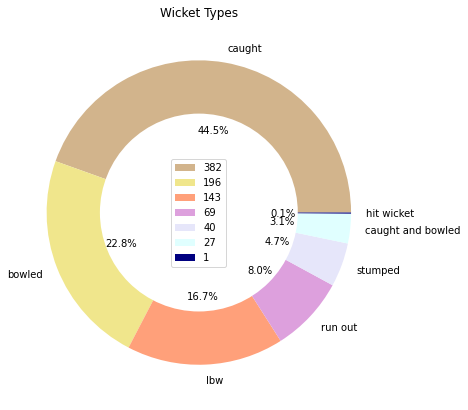

In [198]:
#plot wicket types
plt.figure(figsize=(7, 7)) #figure size
plt.title('Wicket Types') #plot title
colors=['tan','khaki','lightsalmon','plum','lavender','lightcyan','navy']
#pie chart showing percentages
wickets.plot.pie(autopct="%0.1f%%",startangle=0,textprops={'fontsize': 10},colors=colors,pctdistance=0.55,labeldistance=1.1) 

#add a white middle circle
centre_circle = plt.Circle((0,0),0.65,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(wickets, loc="center") #add legend

plt.ylabel('') #no y axis labels

plt.savefig('C:\\Users\\DELL\\Cricdata\Wickettypes.jpeg',bbox_inches='tight') #save the figure
plt.show()

858 wickets have been taken. The most common way of batters getting out was by the ball being caught by a fielder before reaching the ground. The next common way of getting wickets was to bowl out the batter by bowling straight to the wicket sticks behind the batter. LBW (Leg Before Wicket) accounted for around 17% of the wickets. This happens when the batters leg obstructs the flow of the ball which would have hit the wickets on the pitch. 8% of the time the batters were ‘run out’. Stumpings, getting ‘caught and bowled’ and ‘hit wicket’ happened less frequently. 

### <center>2.2 Number of Wickets taken by Bowlers<center>

In [199]:
#separate bowling data into another dataframe
bowling_info = matchball_info[['match_id','season','start_date','innings','over','ball','batting_team','bowling_team',
                               'runs_off_bat', 'extras','bowler','wicket_type','byes','legbyes']]
bowling_info.head()

,match_id,season,start_date,innings,over,ball,batting_team,bowling_team,runs_off_bat,extras,bowler,wicket_type,byes,legbyes
0,1229326.0,2020.0,29-08-2020,1.0,1.0,0.1,Sunrisers,Southern Vipers,0.0,0.0,LK Bell,NaN,NaN,NaN
1,1229326.0,2020.0,29-08-2020,1.0,1.0,0.2,Sunrisers,Southern Vipers,0.0,0.0,LK Bell,NaN,NaN,NaN
2,1229326.0,2020.0,29-08-2020,1.0,1.0,0.3,Sunrisers,Southern Vipers,0.0,0.0,LK Bell,NaN,NaN,NaN
3,1229326.0,2020.0,29-08-2020,1.0,1.0,0.4,Sunrisers,Southern Vipers,0.0,1.0,LK Bell,NaN,NaN,NaN
4,1229326.0,2020.0,29-08-2020,1.0,1.0,0.5,Sunrisers,Southern Vipers,0.0,1.0,LK Bell,NaN,NaN,NaN


In [200]:
#replace nan values with 0
bowling_info[['byes','legbyes']] = bowling_info[['byes','legbyes']].fillna(0)

In [201]:
bowling_info.head()

,match_id,season,start_date,innings,over,ball,batting_team,bowling_team,runs_off_bat,extras,bowler,wicket_type,byes,legbyes
0,1229326.0,2020.0,29-08-2020,1.0,1.0,0.1,Sunrisers,Southern Vipers,0.0,0.0,LK Bell,NaN,0.0,0.0
1,1229326.0,2020.0,29-08-2020,1.0,1.0,0.2,Sunrisers,Southern Vipers,0.0,0.0,LK Bell,NaN,0.0,0.0
2,1229326.0,2020.0,29-08-2020,1.0,1.0,0.3,Sunrisers,Southern Vipers,0.0,0.0,LK Bell,NaN,0.0,0.0
3,1229326.0,2020.0,29-08-2020,1.0,1.0,0.4,Sunrisers,Southern Vipers,0.0,1.0,LK Bell,NaN,0.0,0.0
4,1229326.0,2020.0,29-08-2020,1.0,1.0,0.5,Sunrisers,Southern Vipers,0.0,1.0,LK Bell,NaN,0.0,0.0


In [202]:
#add a new column 'runs_conceded' to calculate first innings total runs
bowling_info['runs_conceded'] = bowling_info['runs_off_bat']+bowling_info['extras']-bowling_info['byes']-bowling_info['legbyes']
bowling_info.head()

,match_id,season,start_date,innings,over,ball,batting_team,bowling_team,runs_off_bat,extras,bowler,wicket_type,byes,legbyes,runs_conceded
0,1229326.0,2020.0,29-08-2020,1.0,1.0,0.1,Sunrisers,Southern Vipers,0.0,0.0,LK Bell,NaN,0.0,0.0,0.0
1,1229326.0,2020.0,29-08-2020,1.0,1.0,0.2,Sunrisers,Southern Vipers,0.0,0.0,LK Bell,NaN,0.0,0.0,0.0
2,1229326.0,2020.0,29-08-2020,1.0,1.0,0.3,Sunrisers,Southern Vipers,0.0,0.0,LK Bell,NaN,0.0,0.0,0.0
3,1229326.0,2020.0,29-08-2020,1.0,1.0,0.4,Sunrisers,Southern Vipers,0.0,1.0,LK Bell,NaN,0.0,0.0,1.0
4,1229326.0,2020.0,29-08-2020,1.0,1.0,0.5,Sunrisers,Southern Vipers,0.0,1.0,LK Bell,NaN,0.0,0.0,1.0


In [203]:
bowling_info.drop(['runs_off_bat','extras','byes','legbyes'],axis=1,inplace=True)

In [204]:
bowling_info.head()

,match_id,season,start_date,innings,over,ball,batting_team,bowling_team,bowler,wicket_type,runs_conceded
0,1229326.0,2020.0,29-08-2020,1.0,1.0,0.1,Sunrisers,Southern Vipers,LK Bell,NaN,0.0
1,1229326.0,2020.0,29-08-2020,1.0,1.0,0.2,Sunrisers,Southern Vipers,LK Bell,NaN,0.0
2,1229326.0,2020.0,29-08-2020,1.0,1.0,0.3,Sunrisers,Southern Vipers,LK Bell,NaN,0.0
3,1229326.0,2020.0,29-08-2020,1.0,1.0,0.4,Sunrisers,Southern Vipers,LK Bell,NaN,1.0
4,1229326.0,2020.0,29-08-2020,1.0,1.0,0.5,Sunrisers,Southern Vipers,LK Bell,NaN,1.0


In [208]:
#separate wickets only data in another dataframe
bowlerwickets = bowling_info[['match_id','season','start_date','innings',
                              'batting_team','bowling_team','bowler','wicket_type']].dropna()
bowlerwickets = bowlerwickets[bowlerwickets['wicket_type']!='run out']
bowlerwickets = bowlerwickets.reset_index(drop=True)
bowlerwickets.head()

,match_id,season,start_date,innings,batting_team,bowling_team,bowler,wicket_type
0,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,LK Bell,caught
1,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,TG Norris,caught
2,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,DN Wyatt,lbw
3,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,CE Dean,caught
4,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,CE Dean,caught and bowled


In [209]:
#to find number of wickets taken by bowlers in an innings
bowlerwickets_innings = bowlerwickets.groupby(['match_id','season','start_date','innings',
                                               'batting_team','bowling_team','bowler']).size().reset_index(name='wicketcounts')
bowlerwickets_innings.head()

,match_id,season,start_date,innings,batting_team,bowling_team,bowler,wicketcounts
0,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,CE Dean,2
1,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,DN Wyatt,1
2,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,LK Bell,1
3,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,PJ Scholfield,3
4,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,TG Norris,1


In [ ]:
#save the dataframe to csv file
bowlerwickets_innings.to_csv("C:\\Users\\DELL\\Cricdata\\bowlerwickets_innings.csv",index=False)

*Some data were externally added to the bowlerwickets_innings file, so this file is being read again from the updated version*

In [211]:
bowlerwickets_innings = pd.read_csv("C:\\Users\\DELL\\Cricdata\\bowlerwickets_innings.csv")

In [213]:
#arrange by descending order of 'wicketcounts'
bowlerwickets_innings = bowlerwickets_innings.sort_values('wicketcounts', ascending = False)
bowlerwickets_innings.reset_index(drop=True,inplace=True)
bowlerwickets_innings.head(10)

,match_id,season,start_date,innings,batting_team,bowling_team,bowler,wicketcounts
0,1229350,2020,27-09-2020,2,Northern Diamonds,Southern Vipers,CM Taylor,6
1,1252266,2021,29-05-2021,2,Sunrisers,South East Stars,NE Farrant,5
2,1252280,2021,10-09-2021,1,Western Storm,Northern Diamonds,LCN Smith,5
3,1229327,2020,29-08-2020,1,Central Sparks,Northern Diamonds,KH Brunt,5
4,1229335,2020,05-09-2020,2,Sunrisers,Western Storm,FMK Morris,5
5,1252275,2021,05-06-2021,2,Southern Vipers,Central Sparks,EL Arlott,5
6,1252264,2021,29-05-2021,1,Northern Diamonds,Central Sparks,IECM Wong,5
7,1229333,2020,31-08-2020,1,Northern Diamonds,Lightning,KE Bryce,5
8,1252289,2021,18-09-2021,2,South East Stars,Thunder,HE Jones,5
9,1252269,2021,31-05-2021,2,Western Storm,Central Sparks,RA Fackrell,4


In [214]:
#create a small separate dataframe from valur_counts of number of wickets by bowlers in an innings
wdf = bowlerwickets_innings['wicketcounts'].value_counts().rename_axis('wicketcounts').reset_index(name='bowlers')
wdf

,wicketcounts,bowlers
0,1,221
1,2,133
2,3,56
3,4,22
4,5,8
5,6,1


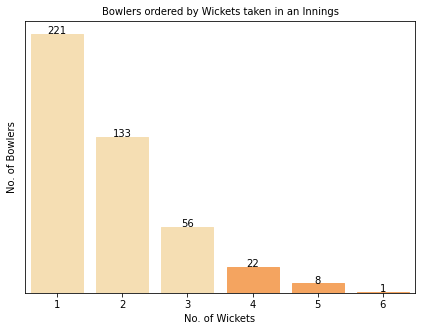

In [215]:
#plot bowlers wickets in an innings
plt.figure(figsize=(7,5))

plt.title('Bowlers ordered by Wickets taken in an Innings',fontsize=10)

ax=sns.barplot(data=wdf,x='wicketcounts',y='bowlers')

plt.ylabel('No. of Bowlers')
plt.xlabel('No. of Wickets')

#set bar colors
for bar in ax.patches:
    if bar.get_height() < 25:
        bar.set_color('sandybrown')    
    else:
        bar.set_color('wheat')

# set the bar labels 
for p in ax.patches:
    _x = p.get_x() + p.get_width()/2
    _y = p.get_y() + p.get_height()
    value = p.get_height().astype(int)
    ax.text(_x, _y, value, ha="center")

#hide y axis ticks
ax.axes.yaxis.set_ticks([])

plt.savefig('C:\\Users\\DELL\\Cricdata\\BowlersWicketsInnings.jpeg',bbox_inches='tight')
plt.show()

During a match 221 bowlers have taken 1 wicket while 133 have managed to take 2. Only 56 could take 3. Just 22 bowlers have taken 4 wickets in a single match. A 5-wicket haul was achieved by 8 bowlers and only 1 bowler took 6 wickets

In [216]:
bowlerwickets_innings['bowler_labels'] = bowlerwickets_innings['bowler'] +" ("+bowlerwickets_innings['bowling_team']+")"
bowlerwickets_innings['message'] = "vs " +bowlerwickets_innings['batting_team'] +" ("+bowlerwickets_innings['start_date']+")"
bowlerwickets_innings.head(10)

,match_id,season,start_date,innings,batting_team,bowling_team,bowler,wicketcounts,bowler_labels,message
0,1229350,2020,27-09-2020,2,Northern Diamonds,Southern Vipers,CM Taylor,6,CM Taylor (Southern Vipers),vs Northern Diamonds (27-09-2020)
1,1252266,2021,29-05-2021,2,Sunrisers,South East Stars,NE Farrant,5,NE Farrant (South East Stars),vs Sunrisers (29-05-2021)
2,1252280,2021,10-09-2021,1,Western Storm,Northern Diamonds,LCN Smith,5,LCN Smith (Northern Diamonds),vs Western Storm (10-09-2021)
3,1229327,2020,29-08-2020,1,Central Sparks,Northern Diamonds,KH Brunt,5,KH Brunt (Northern Diamonds),vs Central Sparks (29-08-2020)
4,1229335,2020,05-09-2020,2,Sunrisers,Western Storm,FMK Morris,5,FMK Morris (Western Storm),vs Sunrisers (05-09-2020)
5,1252275,2021,05-06-2021,2,Southern Vipers,Central Sparks,EL Arlott,5,EL Arlott (Central Sparks),vs Southern Vipers (05-06-2021)
6,1252264,2021,29-05-2021,1,Northern Diamonds,Central Sparks,IECM Wong,5,IECM Wong (Central Sparks),vs Northern Diamonds (29-05-2021)
7,1229333,2020,31-08-2020,1,Northern Diamonds,Lightning,KE Bryce,5,KE Bryce (Lightning),vs Northern Diamonds (31-08-2020)
8,1252289,2021,18-09-2021,2,South East Stars,Thunder,HE Jones,5,HE Jones (Thunder),vs South East Stars (18-09-2021)
9,1252269,2021,31-05-2021,2,Western Storm,Central Sparks,RA Fackrell,4,RA Fackrell (Central Sparks),vs Western Storm (31-05-2021)


In [ ]:
#save the dataframe to csv file
#bowlerwickets_innings.to_csv("C:\\Users\\DELL\\Cricdata\\bowlerwickets_innings.csv",index=False)

In [ ]:
bowlerwickets_innings = pd.read_csv("C:\\Users\\DELL\\Cricdata\\bowlerwickets_innings.csv")

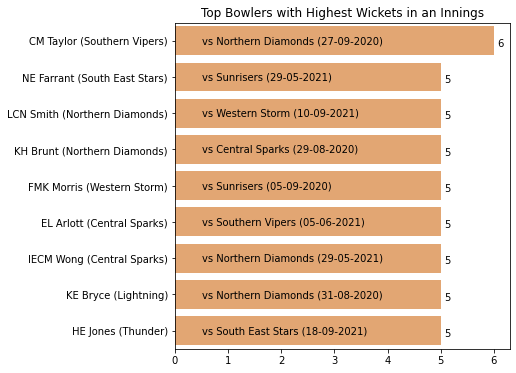

In [217]:
#plot Highest wicket taking bowlers in an innings
df=bowlerwickets_innings.head(9)
plt.figure(figsize=(6,6))

plt.title('Top Bowlers with Highest Wickets in an Innings')
ax = sns.barplot(data=df, x='wicketcounts', y=df.index, orient='h',color='sandybrown',dodge=False)
ax.set_yticklabels(df.bowler_labels)
plt.xlabel('')
 
# set the bar labels
for p in ax.patches:
    ax.annotate(  p.get_width().astype(int) ,( (p.get_x() + p.get_width()), p.get_y() ), 
                xytext=(10,-20),fontsize=10,color='black',textcoords='offset points',horizontalalignment='right' ) 

# write messages on bars
for bar, msg in zip(ax.patches, df['message']):
    ax.text(0.5, bar.get_y()+bar.get_height()/2, msg, color='black', ha='left', va='center')


plt.savefig('C:\\Users\\DELL\\Cricdata\\Top10bowlerwicketsinnings.jpeg',bbox_inches='tight')
plt.show()

The incredible feat of taking 6 wickets single–handedly was done in the final match of 2020 season by CM Taylor from Southern Vipers against Northern Diamonds on 27th September. A 5-wicket haul was achieved by 8 bowlers; 3 of them in 2020: KE Bryce from Lightning, FMK Morris from Western Storm and KH Brunt from Northern Diamonds. The other 5 achieved this in 2021: HE Jones from Thunder, IECM Wong, EL Arlott from Central Sparks, LCN Smith from Northern Diamonds and NE Farrant from South East Stars.

In [ ]:
bowlerwickets_innings.head()

In [ ]:
bowlerwickets_innings=pd.read_csv("C:\\Users\\DELL\\Cricdata\\bowlerwickets_innings.csv")

In [218]:
#to find number of wickets taken by bowlers in total
bowlerwickets_total = bowlerwickets_innings.groupby(['season','bowler_labels']).agg({'wicketcounts':'sum'}).reset_index()
bowlerwickets_total = bowlerwickets_total.sort_values('wicketcounts', ascending=False)
bowlerwickets_total.reset_index(drop=True,inplace=True)
bowlerwickets_total.head(10)

,season,bowler_labels,wicketcounts
0,2021,KL Gordon (Lightning),16
1,2020,CM Taylor (Southern Vipers),15
2,2020,KE Bryce (Lightning),14
3,2021,IECM Wong (Central Sparks),14
4,2021,HE Jones (Thunder),14
5,2021,CM Taylor (Southern Vipers),13
6,2021,BA Langston (Northern Diamonds),13
7,2020,TG Norris (Southern Vipers),12
8,2021,BF Smith (South East Stars),12
9,2021,GL Adams (Southern Vipers),12


In [219]:
#find the wicket taking bowlers inclusive of both seasons
bowler_order=bowlerwickets_total.groupby('bowler_labels')['wicketcounts'].sum().sort_values(ascending=False)
bowler_order[:15]

bowler_labels
CM Taylor (Southern Vipers)        28
BA Langston (Northern Diamonds)    25
KE Bryce (Lightning)               24
KA Levick (Northern Diamonds)      23
TG Norris (Southern Vipers)        23
A Hartley (Thunder)                21
GM Hennessy (Western Storm)        20
CE Dean (Southern Vipers)          19
GL Adams (Southern Vipers)         19
KL Gordon (Lightning)              19
HE Jones (Thunder)                 18
NE Farrant (South East Stars)      18
IECM Wong (Central Sparks)         17
JL Gunn (Northern Diamonds)        17
FMK Morris (Western Storm)         16
Name: wicketcounts, dtype: int64

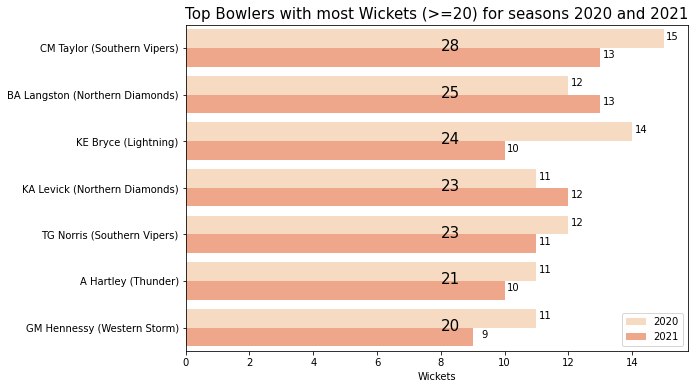

In [226]:
#plot bowlers with most wickets >=20 for both seasons
plt.figure(figsize=(9,6))
plt.title('Top Bowlers with most Wickets (>=20) for seasons 2020 and 2021',fontsize=15) 
ax=sns.barplot(data=bowlerwickets_total,x='wicketcounts',y='bowler_labels',orient='h',hue='season',
               palette=['peachpuff','lightsalmon'],order=bowler_order[:7].index.values)

# set the bar labels
for p in ax.patches:
   ax.annotate( p.get_width().astype(int),( (p.get_x() + p.get_width()), p.get_y() ), 
                xytext=(15,-10),fontsize=10,color='black',textcoords='offset points',horizontalalignment='right' )

# write values on bars
for bar, msg in zip(ax.patches, bowler_order[:7]):
    ax.text(8.0, bar.get_y()+bar.get_height()/1.1, msg, fontsize=15,color='black', ha='left', va='center')
    
plt.xlabel('Wickets')
plt.ylabel('')
ax.legend(loc='lower right')

plt.savefig('C:\\Users\\DELL\\Cricdata\BowlerWicketsbothseasons.jpeg',bbox_inches='tight')
plt.show()

In [221]:
#find the wicket taking bowlers of 2020 season and create a separate dataframe
bowlerwickets_total_2020 = bowlerwickets_total[bowlerwickets_total['season']==2020]
bowler_order_2020=bowlerwickets_total_2020.groupby('bowler_labels')['wicketcounts'].sum().sort_values(ascending=False)
bowler_order_2020=bowler_order_2020.reset_index(name='wicketcounts_2020')
bowler_order_2020.head(15)

,bowler_labels,wicketcounts_2020
0,CM Taylor (Southern Vipers),15
1,KE Bryce (Lightning),14
2,TG Norris (Southern Vipers),12
3,BA Langston (Northern Diamonds),12
4,GM Hennessy (Western Storm),11
5,FMK Morris (Western Storm),11
6,KA Levick (Northern Diamonds),11
7,A Hartley (Thunder),11
8,PJ Scholfield (Southern Vipers),9
9,CE Dean (Southern Vipers),9


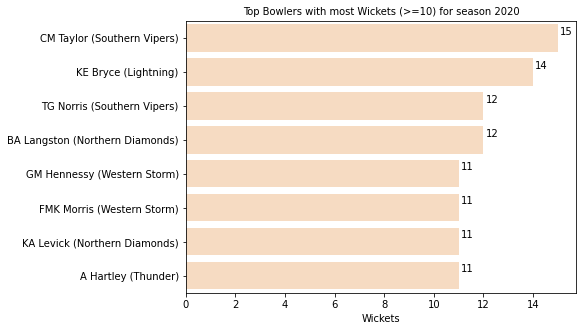

In [222]:
#plot bowlers with most wickets for both season 2020
df=bowler_order_2020.head(8)

plt.figure(figsize=(7,5))
plt.title('Top Bowlers with most Wickets (>=10) for season 2020',fontsize=10) 

ax=sns.barplot(data=df, x='wicketcounts_2020', y=df.index, orient='h', color='peachpuff')
ax.set_yticklabels(df.bowler_labels)

# set the bar labels
for p in ax.patches:
   ax.annotate( p.get_width().astype(int),( (p.get_x() + p.get_width()), p.get_y() ), 
                xytext=(15,-10),fontsize=10,color='black',textcoords='offset points',horizontalalignment='right' )

plt.xlabel('Wickets')
plt.ylabel('')

plt.savefig('C:\\Users\\DELL\\Cricdata\BowlerWickets2020.jpeg',bbox_inches='tight')
plt.show()

CM Taylor was also the highest wicket-taker with 15 wickets in 2020. Only seven other bowlers took 10 or more wickets in that year. 

In [ ]:
#save the dataframe to csv file
#bowler_order_2020.to_csv("C:\\Users\\DELL\\Cricdata\\bowlerwickets_2020.csv",index=False)

In [223]:
#find the wicket taking bowlers of 2021 seasons and create a separate dataframe
bowlerwickets_total_2021 = bowlerwickets_total[bowlerwickets_total['season']==2021]
bowler_order_2021=bowlerwickets_total_2021.groupby('bowler_labels')['wicketcounts'].sum().sort_values(ascending=False)
bowler_order_2021=bowler_order_2021.reset_index(name='wicketcounts_2021')
bowler_order_2021.head(17)

,bowler_labels,wicketcounts_2021
0,KL Gordon (Lightning),16
1,HE Jones (Thunder),14
2,IECM Wong (Central Sparks),14
3,BA Langston (Northern Diamonds),13
4,CM Taylor (Southern Vipers),13
5,KA Levick (Northern Diamonds),12
6,LCN Smith (Northern Diamonds),12
7,BF Smith (South East Stars),12
8,GL Adams (Southern Vipers),12
9,RA Fackrell (Central Sparks),11


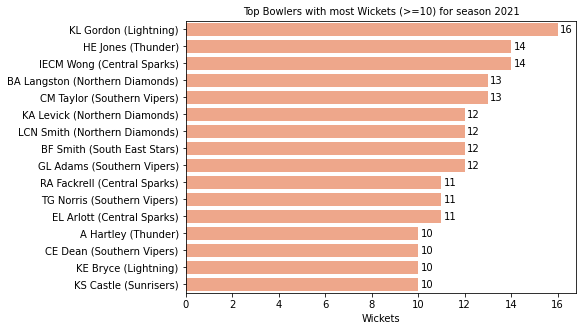

In [224]:
#plot bowlers with most wickets for both season 2021
df=bowler_order_2021.head(16)

plt.figure(figsize=(7,5))
plt.title('Top Bowlers with most Wickets (>=10) for season 2021',fontsize=10) 

ax=sns.barplot(data=df, x='wicketcounts_2021', y=df.index, orient='h', color='lightsalmon')
ax.set_yticklabels(df.bowler_labels)

# set the bar labels
for p in ax.patches:
   ax.annotate( p.get_width().astype(int),( (p.get_x() + p.get_width()), p.get_y() ), 
                xytext=(15,-10),fontsize=10,color='black',textcoords='offset points',horizontalalignment='right' )

plt.xlabel('Wickets')
plt.ylabel('')

plt.savefig('C:\\Users\\DELL\\Cricdata\BowlerWickets2021.jpeg',bbox_inches='tight')
plt.show()

In 2021, the number of bowlers taking 10 or more wickets increased to sixteen. KL Gordon from Lightning was the highest wicket-taker in 2021 with 16 wickets.

In [ ]:
#save the dataframe to csv file
#bowler_order_2021.to_csv("C:\\Users\\DELL\\Cricdata\\bowlerwickets_2021.csv",index=False)

### <center>2.3 Bowler Economy Rate<center>

The economy rate of a bowler is the measure of the number of runs, a bowler concedes in an over.

Economy Rate = Runs Conceded/Overs Bowled

In [228]:
bowling_info.head()

,match_id,season,start_date,innings,over,ball,batting_team,bowling_team,bowler,wicket_type,runs_conceded
0,1229326.0,2020.0,29-08-2020,1.0,1.0,0.1,Sunrisers,Southern Vipers,LK Bell,NaN,0.0
1,1229326.0,2020.0,29-08-2020,1.0,1.0,0.2,Sunrisers,Southern Vipers,LK Bell,NaN,0.0
2,1229326.0,2020.0,29-08-2020,1.0,1.0,0.3,Sunrisers,Southern Vipers,LK Bell,NaN,0.0
3,1229326.0,2020.0,29-08-2020,1.0,1.0,0.4,Sunrisers,Southern Vipers,LK Bell,NaN,1.0
4,1229326.0,2020.0,29-08-2020,1.0,1.0,0.5,Sunrisers,Southern Vipers,LK Bell,NaN,1.0


In [229]:
bowling_info['bowler_labels'] = bowling_info['bowler'] +" ("+bowling_info['bowling_team']+")"
bowling_info.head()

,match_id,season,start_date,innings,over,ball,batting_team,bowling_team,bowler,wicket_type,runs_conceded,bowler_labels
0,1229326.0,2020.0,29-08-2020,1.0,1.0,0.1,Sunrisers,Southern Vipers,LK Bell,NaN,0.0,LK Bell (Southern Vipers)
1,1229326.0,2020.0,29-08-2020,1.0,1.0,0.2,Sunrisers,Southern Vipers,LK Bell,NaN,0.0,LK Bell (Southern Vipers)
2,1229326.0,2020.0,29-08-2020,1.0,1.0,0.3,Sunrisers,Southern Vipers,LK Bell,NaN,0.0,LK Bell (Southern Vipers)
3,1229326.0,2020.0,29-08-2020,1.0,1.0,0.4,Sunrisers,Southern Vipers,LK Bell,NaN,1.0,LK Bell (Southern Vipers)
4,1229326.0,2020.0,29-08-2020,1.0,1.0,0.5,Sunrisers,Southern Vipers,LK Bell,NaN,1.0,LK Bell (Southern Vipers)


In [230]:
bowler_overs = bowling_info.drop(['season','bowling_team','innings','ball','wicket_type','runs_conceded'],axis=1)
bowler_overs.head()

,match_id,start_date,over,batting_team,bowler,bowler_labels
0,1229326.0,29-08-2020,1.0,Sunrisers,LK Bell,LK Bell (Southern Vipers)
1,1229326.0,29-08-2020,1.0,Sunrisers,LK Bell,LK Bell (Southern Vipers)
2,1229326.0,29-08-2020,1.0,Sunrisers,LK Bell,LK Bell (Southern Vipers)
3,1229326.0,29-08-2020,1.0,Sunrisers,LK Bell,LK Bell (Southern Vipers)
4,1229326.0,29-08-2020,1.0,Sunrisers,LK Bell,LK Bell (Southern Vipers)


In [231]:
bowler_overs['over']= bowler_overs['over'].astype('category')

In [232]:
bowler_overs=bowler_overs.drop_duplicates(keep='first')
bowler_overs.head()

,match_id,start_date,over,batting_team,bowler,bowler_labels
0,1229326.0,29-08-2020,1.0,Sunrisers,LK Bell,LK Bell (Southern Vipers)
9,1229326.0,29-08-2020,2.0,Sunrisers,TG Norris,TG Norris (Southern Vipers)
16,1229326.0,29-08-2020,3.0,Sunrisers,LK Bell,LK Bell (Southern Vipers)
23,1229326.0,29-08-2020,4.0,Sunrisers,TG Norris,TG Norris (Southern Vipers)
29,1229326.0,29-08-2020,5.0,Sunrisers,LK Bell,LK Bell (Southern Vipers)


In [233]:
bowler_overs=bowler_overs.groupby(['match_id','start_date','batting_team',
                                   'bowler','bowler_labels']).size().reset_index(name='overcounts')
bowler_overs.head(10)

,match_id,start_date,batting_team,bowler,bowler_labels,overcounts
0,1229326.0,29-08-2020,Southern Vipers,AJ Macleod,AJ Macleod (Sunrisers),3
1,1229326.0,29-08-2020,Southern Vipers,J Gardner,J Gardner (Sunrisers),4
2,1229326.0,29-08-2020,Southern Vipers,KJ Wolfe,KJ Wolfe (Sunrisers),6
3,1229326.0,29-08-2020,Southern Vipers,KL Midwood,KL Midwood (Sunrisers),7
4,1229326.0,29-08-2020,Southern Vipers,KS Castle,KS Castle (Sunrisers),3
5,1229326.0,29-08-2020,Southern Vipers,MK Villiers,MK Villiers (Sunrisers),10
6,1229326.0,29-08-2020,Southern Vipers,Sonali Patel,Sonali Patel (Sunrisers),4
7,1229326.0,29-08-2020,Sunrisers,CE Dean,CE Dean (Southern Vipers),10
8,1229326.0,29-08-2020,Sunrisers,DN Wyatt,DN Wyatt (Southern Vipers),4
9,1229326.0,29-08-2020,Sunrisers,GL Adams,GL Adams (Southern Vipers),2


In [234]:
bowler_runs = bowling_info.drop(['season','bowling_team','innings','ball','wicket_type','over'],axis=1)
bowler_runs.head()

,match_id,start_date,batting_team,bowler,runs_conceded,bowler_labels
0,1229326.0,29-08-2020,Sunrisers,LK Bell,0.0,LK Bell (Southern Vipers)
1,1229326.0,29-08-2020,Sunrisers,LK Bell,0.0,LK Bell (Southern Vipers)
2,1229326.0,29-08-2020,Sunrisers,LK Bell,0.0,LK Bell (Southern Vipers)
3,1229326.0,29-08-2020,Sunrisers,LK Bell,1.0,LK Bell (Southern Vipers)
4,1229326.0,29-08-2020,Sunrisers,LK Bell,1.0,LK Bell (Southern Vipers)


In [236]:
bowler_runs=bowler_runs.groupby(['match_id','start_date','batting_team',
                     'bowler','bowler_labels']).agg({'runs_conceded':'sum'}).reset_index()

In [237]:
bowler_runs.head(10)

,match_id,start_date,batting_team,bowler,bowler_labels,runs_conceded
0,1229326.0,29-08-2020,Southern Vipers,AJ Macleod,AJ Macleod (Sunrisers),14.0
1,1229326.0,29-08-2020,Southern Vipers,J Gardner,J Gardner (Sunrisers),38.0
2,1229326.0,29-08-2020,Southern Vipers,KJ Wolfe,KJ Wolfe (Sunrisers),31.0
3,1229326.0,29-08-2020,Southern Vipers,KL Midwood,KL Midwood (Sunrisers),37.0
4,1229326.0,29-08-2020,Southern Vipers,KS Castle,KS Castle (Sunrisers),15.0
5,1229326.0,29-08-2020,Southern Vipers,MK Villiers,MK Villiers (Sunrisers),49.0
6,1229326.0,29-08-2020,Southern Vipers,Sonali Patel,Sonali Patel (Sunrisers),23.0
7,1229326.0,29-08-2020,Sunrisers,CE Dean,CE Dean (Southern Vipers),47.0
8,1229326.0,29-08-2020,Sunrisers,DN Wyatt,DN Wyatt (Southern Vipers),16.0
9,1229326.0,29-08-2020,Sunrisers,GL Adams,GL Adams (Southern Vipers),14.0


In [238]:
bowler_econ_innings = pd.merge(bowler_overs,bowler_runs,how="outer",
                               on=['match_id','start_date','batting_team','bowler','bowler_labels'])
bowler_econ_innings.head(10)

,match_id,start_date,batting_team,bowler,bowler_labels,overcounts,runs_conceded
0,1229326.0,29-08-2020,Southern Vipers,AJ Macleod,AJ Macleod (Sunrisers),3,14.0
1,1229326.0,29-08-2020,Southern Vipers,J Gardner,J Gardner (Sunrisers),4,38.0
2,1229326.0,29-08-2020,Southern Vipers,KJ Wolfe,KJ Wolfe (Sunrisers),6,31.0
3,1229326.0,29-08-2020,Southern Vipers,KL Midwood,KL Midwood (Sunrisers),7,37.0
4,1229326.0,29-08-2020,Southern Vipers,KS Castle,KS Castle (Sunrisers),3,15.0
5,1229326.0,29-08-2020,Southern Vipers,MK Villiers,MK Villiers (Sunrisers),10,49.0
6,1229326.0,29-08-2020,Southern Vipers,Sonali Patel,Sonali Patel (Sunrisers),4,23.0
7,1229326.0,29-08-2020,Sunrisers,CE Dean,CE Dean (Southern Vipers),10,47.0
8,1229326.0,29-08-2020,Sunrisers,DN Wyatt,DN Wyatt (Southern Vipers),4,16.0
9,1229326.0,29-08-2020,Sunrisers,GL Adams,GL Adams (Southern Vipers),2,14.0


In [239]:
bowler_econ_innings['econ_rate']=bowler_econ_innings['runs_conceded'].astype(int)/bowler_econ_innings['overcounts'].astype(int)
bowler_econ_innings['econ_rate']=bowler_econ_innings['econ_rate'].round(decimals=2)
bowler_econ_innings.head(10)

,match_id,start_date,batting_team,bowler,bowler_labels,overcounts,runs_conceded,econ_rate
0,1229326.0,29-08-2020,Southern Vipers,AJ Macleod,AJ Macleod (Sunrisers),3,14.0,4.67
1,1229326.0,29-08-2020,Southern Vipers,J Gardner,J Gardner (Sunrisers),4,38.0,9.50
2,1229326.0,29-08-2020,Southern Vipers,KJ Wolfe,KJ Wolfe (Sunrisers),6,31.0,5.17
3,1229326.0,29-08-2020,Southern Vipers,KL Midwood,KL Midwood (Sunrisers),7,37.0,5.29
4,1229326.0,29-08-2020,Southern Vipers,KS Castle,KS Castle (Sunrisers),3,15.0,5.00
5,1229326.0,29-08-2020,Southern Vipers,MK Villiers,MK Villiers (Sunrisers),10,49.0,4.90
6,1229326.0,29-08-2020,Southern Vipers,Sonali Patel,Sonali Patel (Sunrisers),4,23.0,5.75
7,1229326.0,29-08-2020,Sunrisers,CE Dean,CE Dean (Southern Vipers),10,47.0,4.70
8,1229326.0,29-08-2020,Sunrisers,DN Wyatt,DN Wyatt (Southern Vipers),4,16.0,4.00
9,1229326.0,29-08-2020,Sunrisers,GL Adams,GL Adams (Southern Vipers),2,14.0,7.00


In [240]:
bowler_econ_innings['message'] = "vs " +bowler_econ_innings['batting_team'] +" ("+bowler_econ_innings['start_date']+")"
bowler_econ_innings.head(10)

,match_id,start_date,batting_team,bowler,bowler_labels,overcounts,runs_conceded,econ_rate,message
0,1229326.0,29-08-2020,Southern Vipers,AJ Macleod,AJ Macleod (Sunrisers),3,14.0,4.67,vs Southern Vipers (29-08-2020)
1,1229326.0,29-08-2020,Southern Vipers,J Gardner,J Gardner (Sunrisers),4,38.0,9.50,vs Southern Vipers (29-08-2020)
2,1229326.0,29-08-2020,Southern Vipers,KJ Wolfe,KJ Wolfe (Sunrisers),6,31.0,5.17,vs Southern Vipers (29-08-2020)
3,1229326.0,29-08-2020,Southern Vipers,KL Midwood,KL Midwood (Sunrisers),7,37.0,5.29,vs Southern Vipers (29-08-2020)
4,1229326.0,29-08-2020,Southern Vipers,KS Castle,KS Castle (Sunrisers),3,15.0,5.00,vs Southern Vipers (29-08-2020)
5,1229326.0,29-08-2020,Southern Vipers,MK Villiers,MK Villiers (Sunrisers),10,49.0,4.90,vs Southern Vipers (29-08-2020)
6,1229326.0,29-08-2020,Southern Vipers,Sonali Patel,Sonali Patel (Sunrisers),4,23.0,5.75,vs Southern Vipers (29-08-2020)
7,1229326.0,29-08-2020,Sunrisers,CE Dean,CE Dean (Southern Vipers),10,47.0,4.70,vs Sunrisers (29-08-2020)
8,1229326.0,29-08-2020,Sunrisers,DN Wyatt,DN Wyatt (Southern Vipers),4,16.0,4.00,vs Sunrisers (29-08-2020)
9,1229326.0,29-08-2020,Sunrisers,GL Adams,GL Adams (Southern Vipers),2,14.0,7.00,vs Sunrisers (29-08-2020)


In [241]:
bowler_econ_innings = bowler_econ_innings.drop(['batting_team','start_date'],axis=1)
bowler_econ_innings.head(10)

,match_id,bowler,bowler_labels,overcounts,runs_conceded,econ_rate,message
0,1229326.0,AJ Macleod,AJ Macleod (Sunrisers),3,14.0,4.67,vs Southern Vipers (29-08-2020)
1,1229326.0,J Gardner,J Gardner (Sunrisers),4,38.0,9.50,vs Southern Vipers (29-08-2020)
2,1229326.0,KJ Wolfe,KJ Wolfe (Sunrisers),6,31.0,5.17,vs Southern Vipers (29-08-2020)
3,1229326.0,KL Midwood,KL Midwood (Sunrisers),7,37.0,5.29,vs Southern Vipers (29-08-2020)
4,1229326.0,KS Castle,KS Castle (Sunrisers),3,15.0,5.00,vs Southern Vipers (29-08-2020)
5,1229326.0,MK Villiers,MK Villiers (Sunrisers),10,49.0,4.90,vs Southern Vipers (29-08-2020)
6,1229326.0,Sonali Patel,Sonali Patel (Sunrisers),4,23.0,5.75,vs Southern Vipers (29-08-2020)
7,1229326.0,CE Dean,CE Dean (Southern Vipers),10,47.0,4.70,vs Sunrisers (29-08-2020)
8,1229326.0,DN Wyatt,DN Wyatt (Southern Vipers),4,16.0,4.00,vs Sunrisers (29-08-2020)
9,1229326.0,GL Adams,GL Adams (Southern Vipers),2,14.0,7.00,vs Sunrisers (29-08-2020)


In [ ]:
#save the dataframe to csv file
#bowler_econ_innings.to_csv("C:\\Users\\DELL\\Cricdata\\bowlerecon_innings.csv",index=False)

*Some data were externally added to the bowlerecon_innings file, so this file is being read again from the updated version*

In [242]:
bowler_econ_innings=pd.read_csv("C:\\Users\\DELL\\Cricdata\\bowlerecon_innings.csv")

In [243]:
bowler_econ_innings['econ_rate'].value_counts()

5.00    27
4.00    23
6.00    22
3.50    20
7.00    18
        ..
9.33     1
2.62     1
5.10     1
5.88     1
6.66     1
Name: econ_rate, Length: 191, dtype: int64

<Figure size 504x360 with 0 Axes>

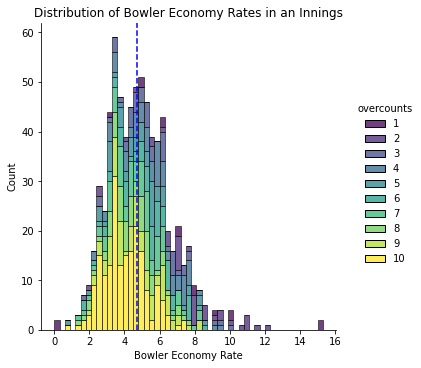

In [244]:
#plot distribution of economy rates of bowlers in an innings
plt.figure(figsize=(7,5))
ax=sns.displot(data=bowler_econ_innings,x='econ_rate',hue='overcounts',palette="viridis",
            multiple="stack",binwidth=0.3)
plt.title('Distribution of Bowler Economy Rates in an Innings')
plt.xlabel('Bowler Economy Rate')
plt.axvline(x=bowler_econ_innings.econ_rate.median(),color='blue',ls='--',lw=1.5)

plt.savefig('C:\\Users\\DELL\\Cricdata\\BowlerEconDist.jpeg',bbox_inches='tight')
plt.show()

Most bowlers in one match had economy rates in the range from 2 to 8 and the median was near 4.5. For some bowlers who have bowled up to three overs, the economy rate was on the higher side, above 8. For the majority of bowlers who have bowled seven or more overs, the economy rate was on the lower side of the median. 

In [245]:
bowler_econ_innings.sort_values('econ_rate', ascending = False).head(21).reset_index(drop=True)

,match_id,bowler,bowler_labels,overcounts,runs_conceded,econ_rate,message
0,1229331,GJ Gibbs,GJ Gibbs (South East Stars),1,15,15.00,vs Sunrisers (31/08/2020)
1,1229333,LF Higham,LF Higham (Lightning),1,15,15.00,vs Northern Diamonds (31/08/2020)
2,1229335,L Filer,L Filer (Western Storm),2,24,12.00,vs Sunrisers (05/09/2020)
3,1252281,S Munro,S Munro (Lightning),2,23,11.50,vs South East Stars (10/09/2021)
4,1252273,ND Dattani,ND Dattani (Sunrisers),2,22,11.00,vs Northern Diamonds (05/06/2021)
5,1229340,AJ Macleod,AJ Macleod (Sunrisers),2,22,11.00,vs Southern Vipers (11/09/2020)
6,1229345,E Jones,E Jones (Central Sparks),2,22,11.00,vs Northern Diamonds (13/09/2020)
7,1252265,MJ Robbins,MJ Robbins (Western Storm),2,21,10.50,vs Thunder (29/05/2021)
8,1252292,IECM Wong,IECM Wong (Central Sparks),3,30,10.00,vs Northern Diamonds (22/09/2021)
9,1252266,AN Davidson-Richards,AN Davidson-Richards (South East Stars),2,20,10.00,vs Sunrisers (29/05/2021)


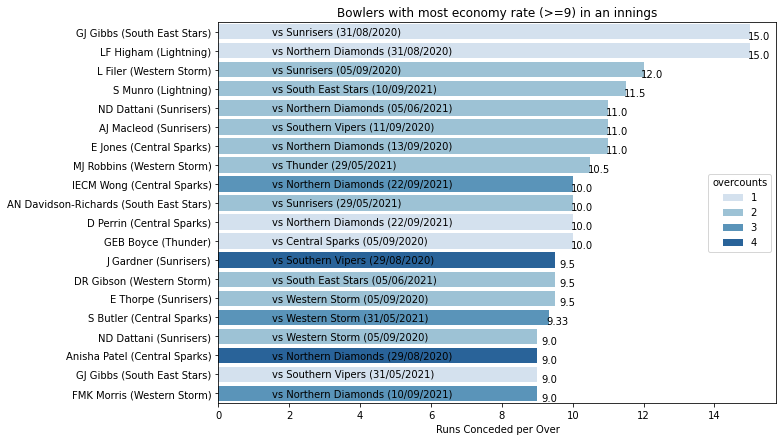

In [246]:
#plot bowlers with most economy rate >=10 in an innings
df = bowler_econ_innings.sort_values('econ_rate', ascending = False).head(20).reset_index(drop=True)

plt.figure(figsize=(10, 7))

plt.title('Bowlers with most economy rate (>=9) in an innings')
ax = sns.barplot(data=df, x='econ_rate', y=df.index, orient='h',hue='overcounts',palette="Blues",dodge=False)
ax.set_yticklabels(df.bowler_labels)
plt.xlabel('Runs Conceded per Over')

# write messages on bars
for bar, msg in zip(ax.patches, df['message']):
    ax.text(1.5, bar.get_y()+bar.get_height()/2, msg, color='black', ha='left', va='center')

# set the bar labels
for p in ax.patches:
    ax.annotate(  p.get_width() ,( (p.get_x() + p.get_width()), p.get_y() ), 
                xytext=(20,-15),fontsize=10,color='black',textcoords='offset points',horizontalalignment='right' )
    
plt.savefig('C:\\Users\\DELL\\Cricdata\\BowlerMostEcon_innings.jpeg',bbox_inches='tight')
plt.show()

In [247]:
bowler_econ_innings.sort_values('econ_rate', ascending = True).head(25).reset_index(drop=True)

,match_id,bowler,bowler_labels,overcounts,runs_conceded,econ_rate,message
0,1252285,E Jones,E Jones (Central Sparks),1,0,0.00,vs South East Stars (12/09/2021)
1,1252273,KA Levick,KA Levick (Northern Diamonds),1,0,0.00,vs Sunrisers (05/06/2021)
2,1252273,LCN Smith,LCN Smith (Northern Diamonds),5,3,0.60,vs Sunrisers (05/06/2021)
3,1229344,A Hartley,A Hartley (Thunder),10,8,0.80,vs Lightning (13/09/2020)
4,1229332,S Ecclestone,S Ecclestone (Thunder),10,13,1.30,vs Central Sparks (31/08/2020)
5,1252273,KH Brunt,KH Brunt (Northern Diamonds),8,11,1.38,vs Sunrisers (05/06/2021)
6,1252274,LF Higham,LF Higham (Lightning),7,10,1.43,vs Thunder (06/06/2021)
7,1229337,PAC Cowdrill,PAC Cowdrill (Southern Vipers),3,5,1.67,vs South East Stars (05/09/2020)
8,1252273,JL Gunn,JL Gunn (Northern Diamonds),6,10,1.67,vs Sunrisers (05/06/2021)
9,1229337,PJ Scholfield,PJ Scholfield (Southern Vipers),6,10,1.67,vs South East Stars (05/09/2020)


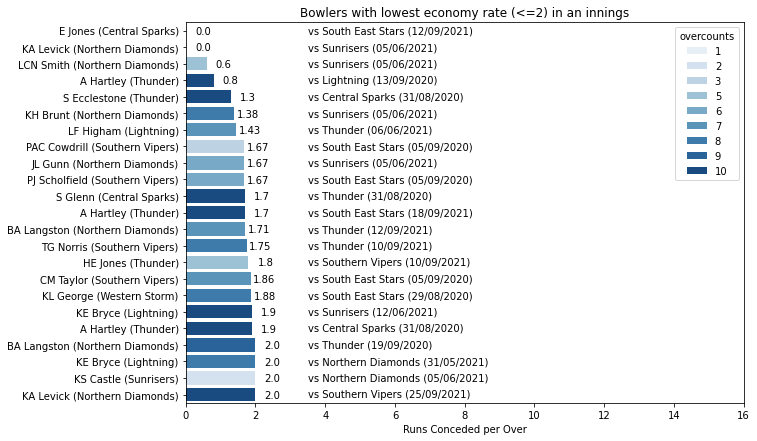

In [248]:
#plot bowlers with lowest economy rate <=2 in an innings
df = bowler_econ_innings.sort_values('econ_rate', ascending = True).head(23).reset_index(drop=True)

plt.figure(figsize=(10, 7))

plt.title('Bowlers with lowest economy rate (<=2) in an innings')
ax = sns.barplot(data=df, x='econ_rate', y=df.index, orient='h',hue='overcounts',palette="Blues",dodge=False)
ax.set_yticklabels(df.bowler_labels)
plt.xlabel('Runs Conceded per Over')
ax.set_xlim(0,16)#set x axis limits

# write messages on bars
for bar, msg in zip(ax.patches, df['message']):
    ax.text(3.5, bar.get_y()+bar.get_height()/2, msg, color='black', ha='left', va='center')

# set the bar labels
for p in ax.patches:
    ax.annotate(  p.get_width() ,( (p.get_x() + p.get_width()), p.get_y() ), 
                xytext=(25,-10),fontsize=10,color='black',textcoords='offset points',horizontalalignment='right' )
    
plt.savefig('C:\\Users\\DELL\\Cricdata\\BowlerLowestEcon_innings.jpeg',bbox_inches='tight')
plt.show()

In [249]:
bowler_econ_innings.head()

,match_id,bowler,bowler_labels,overcounts,runs_conceded,econ_rate,message
0,1229326,AJ Macleod,AJ Macleod (Sunrisers),3,14,4.67,vs Southern Vipers (29/08/2020)
1,1229326,J Gardner,J Gardner (Sunrisers),4,38,9.50,vs Southern Vipers (29/08/2020)
2,1229326,KJ Wolfe,KJ Wolfe (Sunrisers),6,31,5.17,vs Southern Vipers (29/08/2020)
3,1229326,KL Midwood,KL Midwood (Sunrisers),7,37,5.29,vs Southern Vipers (29/08/2020)
4,1229326,KS Castle,KS Castle (Sunrisers),3,15,5.00,vs Southern Vipers (29/08/2020)


In [250]:
bowler_econ_overall=bowler_econ_innings.drop(['match_id','runs_conceded','message'],axis=1)
bowler_econ_overall.head()

,bowler,bowler_labels,overcounts,econ_rate
0,AJ Macleod,AJ Macleod (Sunrisers),3,4.67
1,J Gardner,J Gardner (Sunrisers),4,9.50
2,KJ Wolfe,KJ Wolfe (Sunrisers),6,5.17
3,KL Midwood,KL Midwood (Sunrisers),7,5.29
4,KS Castle,KS Castle (Sunrisers),3,5.00


In [251]:
bowler_econ_overall=bowler_econ_overall.groupby(['bowler','bowler_labels']).agg({'econ_rate':'mean',
                                                                                'overcounts':'sum'}).reset_index()
bowler_econ_overall.head()

,bowler,bowler_labels,econ_rate,overcounts
0,A Capsey,A Capsey (South East Stars),4.623636,69
1,A Griffiths,A Griffiths (Western Storm),5.324286,39
2,A Hartley,A Hartley (Thunder),3.847692,123
3,A Shrubsole,A Shrubsole (Western Storm),3.765000,38
4,AD Presland,AD Presland (Lightning),4.727500,27


In [252]:
bowler_econ_overall['econ_rate']=bowler_econ_overall['econ_rate'].round(decimals=2)
bowler_econ_overall.head(10)

,bowler,bowler_labels,econ_rate,overcounts
0,A Capsey,A Capsey (South East Stars),4.62,69
1,A Griffiths,A Griffiths (Western Storm),5.32,39
2,A Hartley,A Hartley (Thunder),3.85,123
3,A Shrubsole,A Shrubsole (Western Storm),3.76,38
4,AD Presland,AD Presland (Lightning),4.73,27
5,AE Dyson,AE Dyson (Thunder),5.72,33
6,AG Gordon,AG Gordon (South East Stars),5.08,18
7,AJ Macleod,AJ Macleod (Sunrisers),5.93,46
8,AL MacDonald,AL MacDonald (Northern Diamonds),4.35,26
9,AN Davidson-Richards,AN Davidson-Richards (South East Stars),6.12,44


In [253]:
bowler_econ_overall['overs_bowled'] = np.nan

for i in range(len(bowler_econ_overall)):
    if bowler_econ_overall['overcounts'][i] <= 10:
        bowler_econ_overall['overs_bowled'][i] = '<= 10'
    elif bowler_econ_overall['overcounts'][i] > 10 and bowler_econ_overall['overcounts'][i] <= 30:
        bowler_econ_overall['overs_bowled'][i] = '11 - 30'
    elif bowler_econ_overall['overcounts'][i] > 30 and bowler_econ_overall['overcounts'][i] <= 70:
        bowler_econ_overall['overs_bowled'][i] = '31 - 70'
    else:
        bowler_econ_overall['overs_bowled'][i] = '>= 71'       

In [254]:
bowler_econ_overall.head(10)

,bowler,bowler_labels,econ_rate,overcounts,overs_bowled
0,A Capsey,A Capsey (South East Stars),4.62,69,31 - 70
1,A Griffiths,A Griffiths (Western Storm),5.32,39,31 - 70
2,A Hartley,A Hartley (Thunder),3.85,123,>= 71
3,A Shrubsole,A Shrubsole (Western Storm),3.76,38,31 - 70
4,AD Presland,AD Presland (Lightning),4.73,27,11 - 30
5,AE Dyson,AE Dyson (Thunder),5.72,33,31 - 70
6,AG Gordon,AG Gordon (South East Stars),5.08,18,11 - 30
7,AJ Macleod,AJ Macleod (Sunrisers),5.93,46,31 - 70
8,AL MacDonald,AL MacDonald (Northern Diamonds),4.35,26,11 - 30
9,AN Davidson-Richards,AN Davidson-Richards (South East Stars),6.12,44,31 - 70


In [255]:
#save the dataframe to csv file
#bowler_econ_overall.to_csv("C:\\Users\\DELL\\Cricdata\\bowlerecon_overall.csv",index=False)

In [256]:
bowler_econ_overall=pd.read_csv("C:\\Users\\DELL\\Cricdata\\bowlerecon_overall.csv")

<Figure size 1080x720 with 0 Axes>

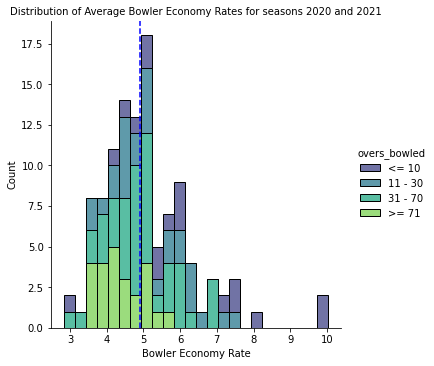

In [257]:
#plot distribution of economy rates of bowlers in an innings
plt.figure(figsize=(15,10))
sns.displot(data=bowler_econ_overall,x='econ_rate',hue='overs_bowled',palette="viridis",
            hue_order=["<= 10","11 - 30","31 - 70",">= 71"],multiple="stack",binwidth=0.3)
plt.title('Distribution of Average Bowler Economy Rates for seasons 2020 and 2021',fontsize=10)
plt.xlabel('Bowler Economy Rate')
plt.axvline(x=bowler_econ_overall.econ_rate.median(),color='blue',ls='--',lw=1.5)

plt.savefig('C:\\Users\\DELL\\Cricdata\\BowlerEconDist_overall.jpeg',bbox_inches='tight')
plt.show()

When the economy rate was studied throughout all the matches played in both seasons, it was found that bowlers with greater experience of bowling more than seventy-one overs had rates in the range from around 3.5 to 5.8. The median overall economy rate was close to 5. For few bowlers having bowled thirty overs or less, the overall economy rate exceeded 7. 

In [258]:
bowler_econ_overall.sort_values('econ_rate', ascending = False).head(22).reset_index(drop=True)

,bowler,bowler_labels,econ_rate,overcounts,overs_bowled
0,GEB Boyce,GEB Boyce (Thunder),10.00,1,<= 10
1,D Perrin,D Perrin (Central Sparks),10.00,1,<= 10
2,MJ Robbins,MJ Robbins (Western Storm),7.97,9,<= 10
3,EF Telford,EF Telford (Northern Diamonds),7.47,14,11 - 30
4,SN Luff,SN Luff (Western Storm),7.38,6,<= 10
5,J Groves,J Groves (Lightning),7.38,8,<= 10
6,Olivia Thomas,Olivia Thomas (Thunder),7.25,4,<= 10
7,E Thorpe,E Thorpe (Sunrisers),7.11,16,11 - 30
8,ND Dattani,ND Dattani (Sunrisers),6.94,48,31 - 70
9,DR Gibson,DR Gibson (Western Storm),6.87,38,31 - 70


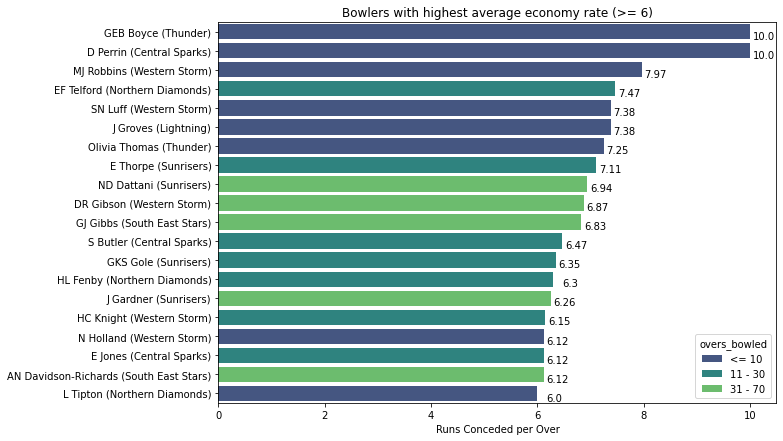

In [259]:
#plot bowlers with most overall economy rate > 6
df = bowler_econ_overall.sort_values('econ_rate', ascending = False).head(20).reset_index(drop=True)

plt.figure(figsize=(10, 7))

plt.title('Bowlers with highest average economy rate (>= 6)')
ax = sns.barplot(data=df, x='econ_rate', y=df.index, orient='h',hue='overs_bowled', palette="viridis",dodge=False)
ax.set_yticklabels(df.bowler_labels)
plt.xlabel('Runs Conceded per Over')

# set the bar labels
for p in ax.patches:
    ax.annotate(  p.get_width() ,( (p.get_x() + p.get_width()), p.get_y() ), 
                xytext=(25,-15),fontsize=10,color='black',textcoords='offset points',horizontalalignment='right' )
    
plt.savefig('C:\\Users\\DELL\\Cricdata\\BowlerMostEcon_overall.jpeg',bbox_inches='tight')
plt.show()

In [260]:
bowler_econ_overall.sort_values('econ_rate', ascending = True).head(25).reset_index(drop=True)

,bowler,bowler_labels,econ_rate,overcounts,overs_bowled
0,KH Brunt,KH Brunt (Northern Diamonds),2.83,45,31 - 70
1,E Windsor,E Windsor (Southern Vipers),3.00,5,<= 10
2,S Ecclestone,S Ecclestone (Thunder),3.28,48,31 - 70
3,R MacDonald-Gay,R MacDonald-Gay (South East Stars),3.47,13,11 - 30
4,KL Gordon,KL Gordon (Lightning),3.51,99,>= 71
5,CM Taylor,CM Taylor (Southern Vipers),3.53,116,>= 71
6,LCN Smith,LCN Smith (Northern Diamonds),3.56,104,>= 71
7,KL George,KL George (Western Storm),3.63,16,11 - 30
8,NR Sciver,NR Sciver (Northern Diamonds),3.66,39,31 - 70
9,S Glenn,S Glenn (Central Sparks),3.66,53,31 - 70


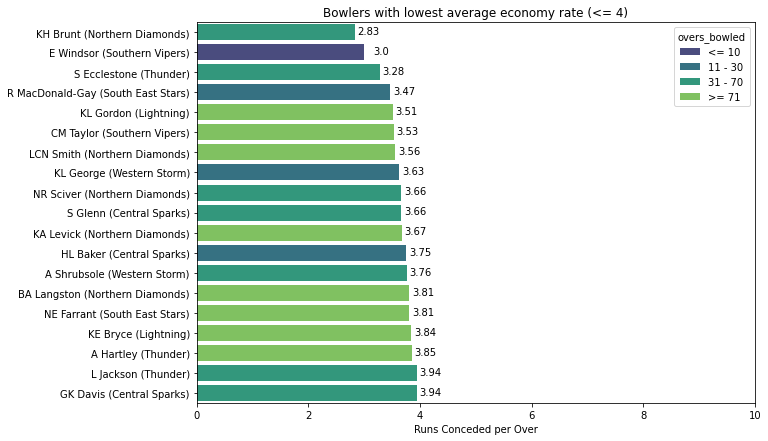

In [261]:
#plot bowlers with lowest economy rate < 4 in an innings
df = bowler_econ_overall.sort_values('econ_rate', ascending = True).head(19).reset_index(drop=True)

plt.figure(figsize=(10, 7))

plt.title('Bowlers with lowest average economy rate (<= 4)')

h_order=["<= 10","11 - 30","31 - 70",">= 71"]
ax = sns.barplot(data=df, x='econ_rate', y=df.index, orient='h',hue='overs_bowled',hue_order=h_order,
                 palette="viridis",dodge=False)

ax.set_yticklabels(df.bowler_labels)
plt.xlabel('Runs Conceded per Over')
ax.set_xlim(0,10)#set x axis limits

# set the bar labels
for p in ax.patches:
    ax.annotate(  p.get_width() ,( (p.get_x() + p.get_width()), p.get_y() ), 
                xytext=(25,-10),fontsize=10,color='black',textcoords='offset points',horizontalalignment='right' )
    
plt.savefig('C:\\Users\\DELL\\Cricdata\\BowlerLowestEcon_overall.jpeg',bbox_inches='tight')
plt.show()

### <center> 2.4 Bowling Average and Strike Rate <center>

Bowling strike rate gives an indication of how quickly a bowler has taken wickets. 

Bowling Strike Rate = Balls Bowled/Wickets 

Bowling average helps to understand how expensive the bowler was while taking wickets.  

Bowling Average = Runs Conceded/Wickets

In [262]:
bowler_econ_innings.head()

,match_id,bowler,bowler_labels,overcounts,runs_conceded,econ_rate,message
0,1229326,AJ Macleod,AJ Macleod (Sunrisers),3,14,4.67,vs Southern Vipers (29/08/2020)
1,1229326,J Gardner,J Gardner (Sunrisers),4,38,9.50,vs Southern Vipers (29/08/2020)
2,1229326,KJ Wolfe,KJ Wolfe (Sunrisers),6,31,5.17,vs Southern Vipers (29/08/2020)
3,1229326,KL Midwood,KL Midwood (Sunrisers),7,37,5.29,vs Southern Vipers (29/08/2020)
4,1229326,KS Castle,KS Castle (Sunrisers),3,15,5.00,vs Southern Vipers (29/08/2020)


In [263]:
bowlerwickets_innings.head()

,match_id,season,start_date,innings,batting_team,bowling_team,bowler,wicketcounts,bowler_labels,message
0,1229350,2020,27-09-2020,2,Northern Diamonds,Southern Vipers,CM Taylor,6,CM Taylor (Southern Vipers),vs Northern Diamonds (27-09-2020)
1,1252266,2021,29-05-2021,2,Sunrisers,South East Stars,NE Farrant,5,NE Farrant (South East Stars),vs Sunrisers (29-05-2021)
2,1252280,2021,10-09-2021,1,Western Storm,Northern Diamonds,LCN Smith,5,LCN Smith (Northern Diamonds),vs Western Storm (10-09-2021)
3,1229327,2020,29-08-2020,1,Central Sparks,Northern Diamonds,KH Brunt,5,KH Brunt (Northern Diamonds),vs Central Sparks (29-08-2020)
4,1229335,2020,05-09-2020,2,Sunrisers,Western Storm,FMK Morris,5,FMK Morris (Western Storm),vs Sunrisers (05-09-2020)


In [264]:
bowler_stats_innings = pd.merge(bowler_econ_innings,bowlerwickets_innings[['match_id','bowler','wicketcounts']],
                                     how="outer",on=['match_id','bowler'])

In [265]:
bowler_stats_innings.head(10)

,match_id,bowler,bowler_labels,overcounts,runs_conceded,econ_rate,message,wicketcounts
0,1229326,AJ Macleod,AJ Macleod (Sunrisers),3,14,4.67,vs Southern Vipers (29/08/2020),1.0
1,1229326,J Gardner,J Gardner (Sunrisers),4,38,9.50,vs Southern Vipers (29/08/2020),NaN
2,1229326,KJ Wolfe,KJ Wolfe (Sunrisers),6,31,5.17,vs Southern Vipers (29/08/2020),NaN
3,1229326,KL Midwood,KL Midwood (Sunrisers),7,37,5.29,vs Southern Vipers (29/08/2020),NaN
4,1229326,KS Castle,KS Castle (Sunrisers),3,15,5.00,vs Southern Vipers (29/08/2020),1.0
5,1229326,MK Villiers,MK Villiers (Sunrisers),10,49,4.90,vs Southern Vipers (29/08/2020),1.0
6,1229326,Sonali Patel,Sonali Patel (Sunrisers),4,23,5.75,vs Southern Vipers (29/08/2020),NaN
7,1229326,CE Dean,CE Dean (Southern Vipers),10,47,4.70,vs Sunrisers (29/08/2020),2.0
8,1229326,DN Wyatt,DN Wyatt (Southern Vipers),4,16,4.00,vs Sunrisers (29/08/2020),1.0
9,1229326,GL Adams,GL Adams (Southern Vipers),2,14,7.00,vs Sunrisers (29/08/2020),NaN


In [266]:
bowler_stats_innings['bowling_average'] = np.nan
bowler_stats_innings['bowler_strikerate'] = np.nan

for i in range(len(bowler_stats_innings)):
    if pd.isnull(bowler_stats_innings['wicketcounts'][i]):
        bowler_stats_innings['bowling_average'][i] = np.nan
        bowler_stats_innings['bowler_strikerate'][i] = np.nan       
    else:
        bowler_stats_innings['bowling_average'][i] = bowler_stats_innings['runs_conceded'][i]/bowler_stats_innings['wicketcounts'][i] 
        bowler_stats_innings['bowler_strikerate'][i] = (bowler_stats_innings['overcounts'][i] * 6)/bowler_stats_innings['wicketcounts'][i]

In [267]:
bowler_stats_innings.head(10)

,match_id,bowler,bowler_labels,overcounts,runs_conceded,econ_rate,message,wicketcounts,bowling_average,bowler_strikerate
0,1229326,AJ Macleod,AJ Macleod (Sunrisers),3,14,4.67,vs Southern Vipers (29/08/2020),1.0,14.0,18.0
1,1229326,J Gardner,J Gardner (Sunrisers),4,38,9.50,vs Southern Vipers (29/08/2020),NaN,NaN,NaN
2,1229326,KJ Wolfe,KJ Wolfe (Sunrisers),6,31,5.17,vs Southern Vipers (29/08/2020),NaN,NaN,NaN
3,1229326,KL Midwood,KL Midwood (Sunrisers),7,37,5.29,vs Southern Vipers (29/08/2020),NaN,NaN,NaN
4,1229326,KS Castle,KS Castle (Sunrisers),3,15,5.00,vs Southern Vipers (29/08/2020),1.0,15.0,18.0
5,1229326,MK Villiers,MK Villiers (Sunrisers),10,49,4.90,vs Southern Vipers (29/08/2020),1.0,49.0,60.0
6,1229326,Sonali Patel,Sonali Patel (Sunrisers),4,23,5.75,vs Southern Vipers (29/08/2020),NaN,NaN,NaN
7,1229326,CE Dean,CE Dean (Southern Vipers),10,47,4.70,vs Sunrisers (29/08/2020),2.0,23.5,30.0
8,1229326,DN Wyatt,DN Wyatt (Southern Vipers),4,16,4.00,vs Sunrisers (29/08/2020),1.0,16.0,24.0
9,1229326,GL Adams,GL Adams (Southern Vipers),2,14,7.00,vs Sunrisers (29/08/2020),NaN,NaN,NaN


In [268]:
bowler_stats_innings['bowling_average']=bowler_stats_innings['bowling_average'].round(decimals=2)
bowler_stats_innings['bowler_strikerate']=bowler_stats_innings['bowler_strikerate'].round(decimals=2)

In [269]:
bowler_stats_innings['wicketcounts'] = bowler_stats_innings['wicketcounts'].astype('Int64')

In [270]:
bowler_stats_innings.head(10)

,match_id,bowler,bowler_labels,overcounts,runs_conceded,econ_rate,message,wicketcounts,bowling_average,bowler_strikerate
0,1229326,AJ Macleod,AJ Macleod (Sunrisers),3,14,4.67,vs Southern Vipers (29/08/2020),1,14.0,18.0
1,1229326,J Gardner,J Gardner (Sunrisers),4,38,9.50,vs Southern Vipers (29/08/2020),<NA>,NaN,NaN
2,1229326,KJ Wolfe,KJ Wolfe (Sunrisers),6,31,5.17,vs Southern Vipers (29/08/2020),<NA>,NaN,NaN
3,1229326,KL Midwood,KL Midwood (Sunrisers),7,37,5.29,vs Southern Vipers (29/08/2020),<NA>,NaN,NaN
4,1229326,KS Castle,KS Castle (Sunrisers),3,15,5.00,vs Southern Vipers (29/08/2020),1,15.0,18.0
5,1229326,MK Villiers,MK Villiers (Sunrisers),10,49,4.90,vs Southern Vipers (29/08/2020),1,49.0,60.0
6,1229326,Sonali Patel,Sonali Patel (Sunrisers),4,23,5.75,vs Southern Vipers (29/08/2020),<NA>,NaN,NaN
7,1229326,CE Dean,CE Dean (Southern Vipers),10,47,4.70,vs Sunrisers (29/08/2020),2,23.5,30.0
8,1229326,DN Wyatt,DN Wyatt (Southern Vipers),4,16,4.00,vs Sunrisers (29/08/2020),1,16.0,24.0
9,1229326,GL Adams,GL Adams (Southern Vipers),2,14,7.00,vs Sunrisers (29/08/2020),<NA>,NaN,NaN


In [ ]:
#save the dataframe to csv file
#bowler_stats_innings.to_csv("C:\\Users\\DELL\\Cricdata\\bowler_stats_innings.csv",index=False)

In [271]:
bowler_stats_innings=pd.read_csv("C:\\Users\\DELL\\Cricdata\\bowler_stats_innings.csv")

In [272]:
bowler_stats_innings=bowler_stats_innings.dropna()

In [273]:
bowler_stats_innings['wicketcounts']=bowler_stats_innings['wicketcounts'].astype('int')

In [274]:
bowler_stats_innings.head(10)

,match_id,bowler,bowler_labels,overcounts,runs_conceded,econ_rate,message,wicketcounts,bowling_average,bowler_strikerate
0,1229326,AJ Macleod,AJ Macleod (Sunrisers),3,14,4.67,vs Southern Vipers (29/08/2020),1,14.0,18.0
4,1229326,KS Castle,KS Castle (Sunrisers),3,15,5.00,vs Southern Vipers (29/08/2020),1,15.0,18.0
5,1229326,MK Villiers,MK Villiers (Sunrisers),10,49,4.90,vs Southern Vipers (29/08/2020),1,49.0,60.0
7,1229326,CE Dean,CE Dean (Southern Vipers),10,47,4.70,vs Sunrisers (29/08/2020),2,23.5,30.0
8,1229326,DN Wyatt,DN Wyatt (Southern Vipers),4,16,4.00,vs Sunrisers (29/08/2020),1,16.0,24.0
10,1229326,LK Bell,LK Bell (Southern Vipers),8,31,3.88,vs Sunrisers (29/08/2020),1,31.0,48.0
12,1229326,PJ Scholfield,PJ Scholfield (Southern Vipers),10,33,3.30,vs Sunrisers (29/08/2020),3,11.0,20.0
13,1229326,TG Norris,TG Norris (Southern Vipers),6,22,3.67,vs Sunrisers (29/08/2020),1,22.0,36.0
16,1229329,C Nicholas,C Nicholas (Western Storm),10,34,3.40,vs South East Stars (29/08/2020),1,34.0,60.0
17,1229329,FMK Morris,FMK Morris (Western Storm),10,36,3.60,vs South East Stars (29/08/2020),3,12.0,20.0


<Figure size 360x432 with 0 Axes>

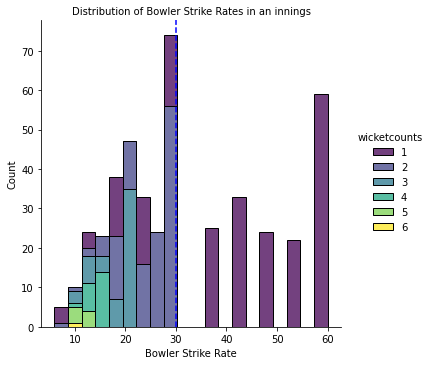

In [275]:
plt.figure(figsize=(5,6))
sns.displot(data=bowler_stats_innings,x='bowler_strikerate',hue='wicketcounts',palette="viridis",bins=20, multiple='stack')
plt.title('Distribution of Bowler Strike Rates in an innings',fontsize=10)
plt.xlabel('Bowler Strike Rate')
plt.axvline(x=bowler_stats_innings.bowler_strikerate.median(),color='blue',ls='--',lw=1.5)

#plt.savefig('C:\\Users\\DELL\\Cricdata\\BowlerEconDist_overall.jpeg',bbox_inches='tight')
plt.show()

Bowling strike rates in an innings for majority of single wicket takers ranged from 35 to 60 while for bowlers with higher wicket counts the strike rate was between 10 to 30.

<Figure size 1080x720 with 0 Axes>

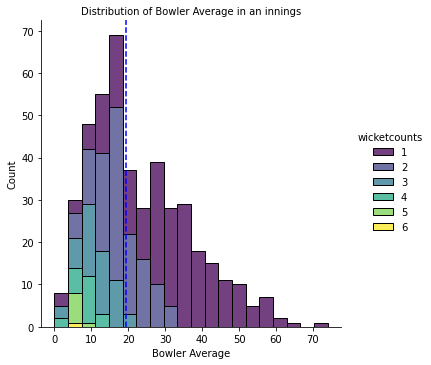

In [276]:
plt.figure(figsize=(15,10))
sns.displot(data=bowler_stats_innings,x='bowling_average',hue='wicketcounts',palette="viridis",bins=20, multiple='stack')
plt.title('Distribution of Bowler Average in an innings',fontsize=10)
plt.xlabel('Bowler Average')
plt.axvline(x=bowler_stats_innings.bowling_average.median(),color='blue',ls='--',lw=1.5)

#plt.savefig('C:\\Users\\DELL\\Cricdata\\BowlerEconDist_overall.jpeg',bbox_inches='tight')
plt.show()

The bowling average in an innings was on the higher side of the median for bowlers with only one wicket and some bowlers with two wickets. Higher wicket takers were on the lower side of the median.

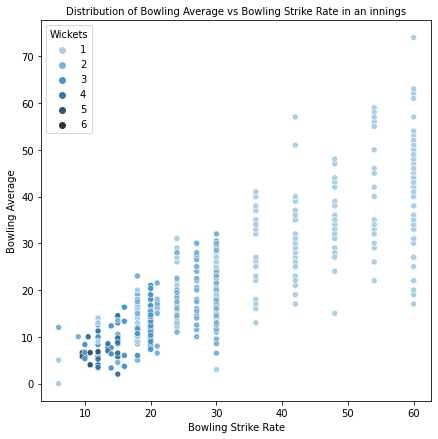

In [277]:
#plot Bowling Average vs Bowling Strike Rate in an innings
plt.figure(figsize=(7,7))
ax=sns.scatterplot(data=bowler_stats_innings,x='bowler_strikerate',y='bowling_average',
                   hue=bowler_stats_innings.wicketcounts.astype(int),palette = 'Blues_d')

plt.title('Distribution of Bowling Average vs Bowling Strike Rate in an innings', fontsize =10)
plt.ylabel('Bowling Average')
plt.xlabel('Bowling Strike Rate')
plt.legend(title='Wickets')

plt.savefig('C:\\Users\\DELL\\Cricdata\\Bowleravgvsstriikerate_innings.jpeg',bbox_inches='tight')
plt.show()

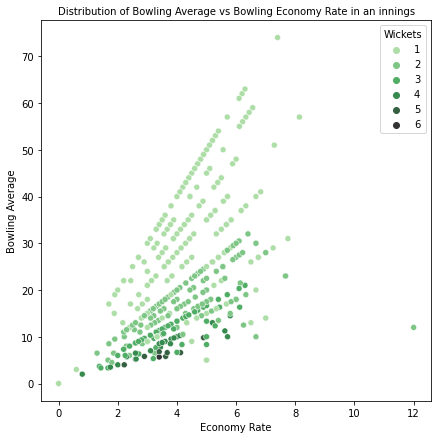

In [278]:
#plot Bowling Average vs Bowling Economy Rate in an innings
plt.figure(figsize=(7,7))
ax=sns.scatterplot(data=bowler_stats_innings,x='econ_rate',y='bowling_average',
                   hue=bowler_stats_innings.wicketcounts.astype(int),palette = 'Greens_d')

plt.title('Distribution of Bowling Average vs Bowling Economy Rate in an innings', fontsize =10)
plt.ylabel('Bowling Average')
plt.xlabel('Economy Rate')
plt.legend(title='Wickets')

plt.savefig('C:\\Users\\DELL\\Cricdata\\Bowleravgvseconrate_innings.jpeg',bbox_inches='tight')
plt.show()

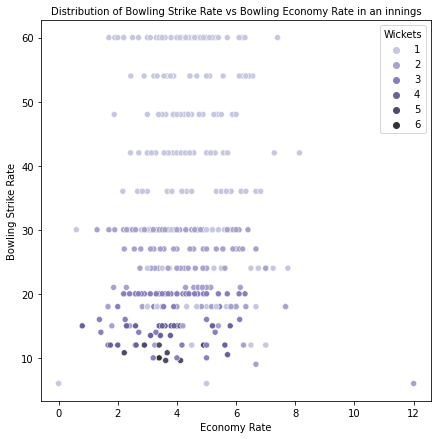

In [279]:
#plot Bowling Strike Rate vs Bowling Economy Rate in an innings
plt.figure(figsize=(7,7))
ax=sns.scatterplot(data=bowler_stats_innings,x='econ_rate',y='bowler_strikerate',
                   hue=bowler_stats_innings.wicketcounts.astype(int),palette = 'Purples_d')

plt.title('Distribution of Bowling Strike Rate vs Bowling Economy Rate in an innings', fontsize =10)
plt.ylabel('Bowling Strike Rate')
plt.xlabel('Economy Rate')
plt.legend(title='Wickets')

plt.savefig('C:\\Users\\DELL\\Cricdata\\Bowlerstrikeratevseconrate_innings.jpeg',bbox_inches='tight')
plt.show()

In [280]:
bowling_avgstrkrate_overall = bowler_stats_innings.groupby(['bowler',
                                                            'bowler_labels']).agg({'bowling_average':'mean',
                                                                                   'bowler_strikerate':'mean'}).reset_index()

bowling_avgstrkrate_overall['bowling_average']=bowling_avgstrkrate_overall['bowling_average'].round(decimals=2)
bowling_avgstrkrate_overall['bowler_strikerate']=bowling_avgstrkrate_overall['bowler_strikerate'].round(decimals=2)
bowling_avgstrkrate_overall.head(10)

,bowler,bowler_labels,bowling_average,bowler_strikerate
0,A Capsey,A Capsey (South East Stars),21.10,31.80
1,A Griffiths,A Griffiths (Western Storm),21.25,28.50
2,A Hartley,A Hartley (Thunder),18.90,28.80
3,A Shrubsole,A Shrubsole (Western Storm),22.34,40.00
4,AD Presland,AD Presland (Lightning),24.89,30.67
5,AE Dyson,AE Dyson (Thunder),34.67,34.00
6,AG Gordon,AG Gordon (South East Stars),22.00,24.00
7,AJ Macleod,AJ Macleod (Sunrisers),22.60,27.60
8,AL MacDonald,AL MacDonald (Northern Diamonds),21.83,36.00
9,AN Davidson-Richards,AN Davidson-Richards (South East Stars),18.50,21.00


In [281]:
bowler_econ_overall.head()

,bowler,bowler_labels,econ_rate,overcounts,overs_bowled
0,A Capsey,A Capsey (South East Stars),4.62,69,31 - 70
1,A Griffiths,A Griffiths (Western Storm),5.32,39,31 - 70
2,A Hartley,A Hartley (Thunder),3.85,123,>= 71
3,A Shrubsole,A Shrubsole (Western Storm),3.76,38,31 - 70
4,AD Presland,AD Presland (Lightning),4.73,27,11 - 30


In [282]:
bowler_stats_overall = pd.merge(bowler_econ_overall,bowling_avgstrkrate_overall,how="outer",on=['bowler','bowler_labels'])

In [283]:
bowler_stats_overall.head(10)

,bowler,bowler_labels,econ_rate,overcounts,overs_bowled,bowling_average,bowler_strikerate
0,A Capsey,A Capsey (South East Stars),4.62,69,31 - 70,21.10,31.80
1,A Griffiths,A Griffiths (Western Storm),5.32,39,31 - 70,21.25,28.50
2,A Hartley,A Hartley (Thunder),3.85,123,>= 71,18.90,28.80
3,A Shrubsole,A Shrubsole (Western Storm),3.76,38,31 - 70,22.34,40.00
4,AD Presland,AD Presland (Lightning),4.73,27,11 - 30,24.89,30.67
5,AE Dyson,AE Dyson (Thunder),5.72,33,31 - 70,34.67,34.00
6,AG Gordon,AG Gordon (South East Stars),5.08,18,11 - 30,22.00,24.00
7,AJ Macleod,AJ Macleod (Sunrisers),5.93,46,31 - 70,22.60,27.60
8,AL MacDonald,AL MacDonald (Northern Diamonds),4.35,26,11 - 30,21.83,36.00
9,AN Davidson-Richards,AN Davidson-Richards (South East Stars),6.12,44,31 - 70,18.50,21.00


In [284]:
matchball_info.head()

,match_id,season,start_date,venue,innings,over,ball,batting_team,bowling_team,striker,non_striker,runs_off_bat,extras,bowler,wicket_type,player_dismissed,wides,noballs,byes,legbyes
0,1229326.0,2020.0,29-08-2020,Chelmsford,1.0,1.0,0.1,Sunrisers,Southern Vipers,KL Midwood,AD Carr,0.0,0.0,LK Bell,NaN,NaN,NaN,NaN,NaN,NaN
1,1229326.0,2020.0,29-08-2020,Chelmsford,1.0,1.0,0.2,Sunrisers,Southern Vipers,KL Midwood,AD Carr,0.0,0.0,LK Bell,NaN,NaN,NaN,NaN,NaN,NaN
2,1229326.0,2020.0,29-08-2020,Chelmsford,1.0,1.0,0.3,Sunrisers,Southern Vipers,KL Midwood,AD Carr,0.0,0.0,LK Bell,NaN,NaN,NaN,NaN,NaN,NaN
3,1229326.0,2020.0,29-08-2020,Chelmsford,1.0,1.0,0.4,Sunrisers,Southern Vipers,KL Midwood,AD Carr,0.0,1.0,LK Bell,NaN,NaN,1.0,NaN,NaN,NaN
4,1229326.0,2020.0,29-08-2020,Chelmsford,1.0,1.0,0.5,Sunrisers,Southern Vipers,KL Midwood,AD Carr,0.0,1.0,LK Bell,NaN,NaN,1.0,NaN,NaN,NaN


In [285]:
bwlr=matchball_info[['bowling_team','bowler']].drop_duplicates(keep='first')
bwlr.head(10)

,bowling_team,bowler
0,Southern Vipers,LK Bell
9,Southern Vipers,TG Norris
73,Southern Vipers,PJ Scholfield
79,Southern Vipers,ME Bouchier
109,Southern Vipers,CE Dean
115,Southern Vipers,GL Adams
175,Southern Vipers,DN Wyatt
300,Sunrisers,KJ Wolfe
306,Sunrisers,J Gardner
364,Sunrisers,Sonali Patel


In [286]:
bwlr['bowler'].value_counts()

LK Bell        1
TG Norris      1
AZ Monaghan    1
HL Fenby       1
L Heap         1
              ..
S Glenn        1
EL Arlott      1
IECM Wong      1
A Capsey       1
Marie Kelly    1
Name: bowler, Length: 112, dtype: int64

In [287]:
bowler_stats_overall = pd.merge(bowler_stats_overall,bwlr,how="outer",on=['bowler'])

In [288]:
bowler_stats_overall.head(10)

,bowler,bowler_labels,econ_rate,overcounts,overs_bowled,bowling_average,bowler_strikerate,bowling_team
0,A Capsey,A Capsey (South East Stars),4.62,69.0,31 - 70,21.10,31.80,South East Stars
1,A Griffiths,A Griffiths (Western Storm),5.32,39.0,31 - 70,21.25,28.50,Western Storm
2,A Hartley,A Hartley (Thunder),3.85,123.0,>= 71,18.90,28.80,Thunder
3,A Shrubsole,A Shrubsole (Western Storm),3.76,38.0,31 - 70,22.34,40.00,Western Storm
4,AD Presland,AD Presland (Lightning),4.73,27.0,11 - 30,24.89,30.67,Lightning
5,AE Dyson,AE Dyson (Thunder),5.72,33.0,31 - 70,34.67,34.00,Thunder
6,AG Gordon,AG Gordon (South East Stars),5.08,18.0,11 - 30,22.00,24.00,South East Stars
7,AJ Macleod,AJ Macleod (Sunrisers),5.93,46.0,31 - 70,22.60,27.60,Sunrisers
8,AL MacDonald,AL MacDonald (Northern Diamonds),4.35,26.0,11 - 30,21.83,36.00,Northern Diamonds
9,AN Davidson-Richards,AN Davidson-Richards (South East Stars),6.12,44.0,31 - 70,18.50,21.00,South East Stars


In [289]:
bowler_order=bowlerwickets_total.groupby('bowler_labels')['wicketcounts'].sum().sort_values(ascending=False)
bowler_order[:15]

bowler_labels
CM Taylor (Southern Vipers)        28
BA Langston (Northern Diamonds)    25
KE Bryce (Lightning)               24
KA Levick (Northern Diamonds)      23
TG Norris (Southern Vipers)        23
A Hartley (Thunder)                21
GM Hennessy (Western Storm)        20
CE Dean (Southern Vipers)          19
GL Adams (Southern Vipers)         19
KL Gordon (Lightning)              19
HE Jones (Thunder)                 18
NE Farrant (South East Stars)      18
IECM Wong (Central Sparks)         17
JL Gunn (Northern Diamonds)        17
FMK Morris (Western Storm)         16
Name: wicketcounts, dtype: int64

In [290]:
bowler_order=bowler_order.to_frame().reset_index()
bowler_order.head()

,bowler_labels,wicketcounts
0,CM Taylor (Southern Vipers),28
1,BA Langston (Northern Diamonds),25
2,KE Bryce (Lightning),24
3,KA Levick (Northern Diamonds),23
4,TG Norris (Southern Vipers),23


In [291]:
bowler_stats_overall = pd.merge(bowler_stats_overall,bowler_order,how="outer",on=['bowler_labels'])

In [292]:
bowler_stats_overall.head(10)

,bowler,bowler_labels,econ_rate,overcounts,overs_bowled,bowling_average,bowler_strikerate,bowling_team,wicketcounts
0,A Capsey,A Capsey (South East Stars),4.62,69.0,31 - 70,21.10,31.80,South East Stars,7.0
1,A Griffiths,A Griffiths (Western Storm),5.32,39.0,31 - 70,21.25,28.50,Western Storm,3.0
2,A Hartley,A Hartley (Thunder),3.85,123.0,>= 71,18.90,28.80,Thunder,21.0
3,A Shrubsole,A Shrubsole (Western Storm),3.76,38.0,31 - 70,22.34,40.00,Western Storm,4.0
4,AD Presland,AD Presland (Lightning),4.73,27.0,11 - 30,24.89,30.67,Lightning,5.0
5,AE Dyson,AE Dyson (Thunder),5.72,33.0,31 - 70,34.67,34.00,Thunder,4.0
6,AG Gordon,AG Gordon (South East Stars),5.08,18.0,11 - 30,22.00,24.00,South East Stars,1.0
7,AJ Macleod,AJ Macleod (Sunrisers),5.93,46.0,31 - 70,22.60,27.60,Sunrisers,6.0
8,AL MacDonald,AL MacDonald (Northern Diamonds),4.35,26.0,11 - 30,21.83,36.00,Northern Diamonds,4.0
9,AN Davidson-Richards,AN Davidson-Richards (South East Stars),6.12,44.0,31 - 70,18.50,21.00,South East Stars,5.0


In [293]:
bowler_stats_overall['wicketcounts'] = bowler_stats_overall['wicketcounts'].astype('Int64')

In [294]:
bowler_stats_overall.head(10)

,bowler,bowler_labels,econ_rate,overcounts,overs_bowled,bowling_average,bowler_strikerate,bowling_team,wicketcounts
0,A Capsey,A Capsey (South East Stars),4.62,69.0,31 - 70,21.10,31.80,South East Stars,7
1,A Griffiths,A Griffiths (Western Storm),5.32,39.0,31 - 70,21.25,28.50,Western Storm,3
2,A Hartley,A Hartley (Thunder),3.85,123.0,>= 71,18.90,28.80,Thunder,21
3,A Shrubsole,A Shrubsole (Western Storm),3.76,38.0,31 - 70,22.34,40.00,Western Storm,4
4,AD Presland,AD Presland (Lightning),4.73,27.0,11 - 30,24.89,30.67,Lightning,5
5,AE Dyson,AE Dyson (Thunder),5.72,33.0,31 - 70,34.67,34.00,Thunder,4
6,AG Gordon,AG Gordon (South East Stars),5.08,18.0,11 - 30,22.00,24.00,South East Stars,1
7,AJ Macleod,AJ Macleod (Sunrisers),5.93,46.0,31 - 70,22.60,27.60,Sunrisers,6
8,AL MacDonald,AL MacDonald (Northern Diamonds),4.35,26.0,11 - 30,21.83,36.00,Northern Diamonds,4
9,AN Davidson-Richards,AN Davidson-Richards (South East Stars),6.12,44.0,31 - 70,18.50,21.00,South East Stars,5


In [295]:
bowler_stats_overall.columns

Index(['bowler', 'bowler_labels', 'econ_rate', 'overcounts', 'overs_bowled',
       'bowling_average', 'bowler_strikerate', 'bowling_team', 'wicketcounts'],
      dtype='object')

In [296]:
bowler_stats_overall = bowler_stats_overall[['bowler','bowling_team','overcounts','overs_bowled',
                                             'wicketcounts','econ_rate','bowling_average', 'bowler_strikerate']]
bowler_stats_overall.head(10)

,bowler,bowling_team,overcounts,overs_bowled,wicketcounts,econ_rate,bowling_average,bowler_strikerate
0,A Capsey,South East Stars,69.0,31 - 70,7,4.62,21.10,31.80
1,A Griffiths,Western Storm,39.0,31 - 70,3,5.32,21.25,28.50
2,A Hartley,Thunder,123.0,>= 71,21,3.85,18.90,28.80
3,A Shrubsole,Western Storm,38.0,31 - 70,4,3.76,22.34,40.00
4,AD Presland,Lightning,27.0,11 - 30,5,4.73,24.89,30.67
5,AE Dyson,Thunder,33.0,31 - 70,4,5.72,34.67,34.00
6,AG Gordon,South East Stars,18.0,11 - 30,1,5.08,22.00,24.00
7,AJ Macleod,Sunrisers,46.0,31 - 70,6,5.93,22.60,27.60
8,AL MacDonald,Northern Diamonds,26.0,11 - 30,4,4.35,21.83,36.00
9,AN Davidson-Richards,South East Stars,44.0,31 - 70,5,6.12,18.50,21.00


In [297]:
bowler_stats_overall['wickets_taken'] = np.nan

for i in range(len(bowler_econ_overall)):
    if pd.isnull(bowler_stats_overall['wicketcounts'][i]):
        continue
    elif bowler_stats_overall['wicketcounts'][i] <= 10:
        bowler_stats_overall['wickets_taken'][i] = '<= 10'
    elif bowler_stats_overall['wicketcounts'][i] > 10 and bowler_stats_overall['wicketcounts'][i] <= 20:
        bowler_stats_overall['wickets_taken'][i] = '11 - 20'
    else:
        bowler_stats_overall['wickets_taken'][i] = '>= 21'

In [298]:
bowler_stats_overall = bowler_stats_overall[['bowler','bowling_team','overcounts','overs_bowled','wicketcounts',
                                             'wickets_taken','econ_rate','bowling_average', 'bowler_strikerate']]
bowler_stats_overall.head(10)

,bowler,bowling_team,overcounts,overs_bowled,wicketcounts,wickets_taken,econ_rate,bowling_average,bowler_strikerate
0,A Capsey,South East Stars,69.0,31 - 70,7,<= 10,4.62,21.10,31.80
1,A Griffiths,Western Storm,39.0,31 - 70,3,<= 10,5.32,21.25,28.50
2,A Hartley,Thunder,123.0,>= 71,21,>= 21,3.85,18.90,28.80
3,A Shrubsole,Western Storm,38.0,31 - 70,4,<= 10,3.76,22.34,40.00
4,AD Presland,Lightning,27.0,11 - 30,5,<= 10,4.73,24.89,30.67
5,AE Dyson,Thunder,33.0,31 - 70,4,<= 10,5.72,34.67,34.00
6,AG Gordon,South East Stars,18.0,11 - 30,1,<= 10,5.08,22.00,24.00
7,AJ Macleod,Sunrisers,46.0,31 - 70,6,<= 10,5.93,22.60,27.60
8,AL MacDonald,Northern Diamonds,26.0,11 - 30,4,<= 10,4.35,21.83,36.00
9,AN Davidson-Richards,South East Stars,44.0,31 - 70,5,<= 10,6.12,18.50,21.00


In [299]:
bowler_stats_overall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 0 to 112
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bowler             112 non-null    object 
 1   bowling_team       112 non-null    object 
 2   overcounts         112 non-null    float64
 3   overs_bowled       112 non-null    object 
 4   wicketcounts       100 non-null    Int64  
 5   wickets_taken      100 non-null    object 
 6   econ_rate          112 non-null    float64
 7   bowling_average    100 non-null    float64
 8   bowler_strikerate  100 non-null    float64
dtypes: Int64(1), float64(4), object(4)
memory usage: 13.0+ KB


In [300]:
#save the dataframe to csv file
#bowler_stats_overall.to_csv("C:\\Users\\DELL\\Cricdata\\Bowlerstats_overall.csv",index=False)

In [301]:
bowler_stats_overall=pd.read_csv("C:\\Users\\DELL\\Cricdata\\Bowlerstats_overall.csv")

<Figure size 1080x720 with 0 Axes>

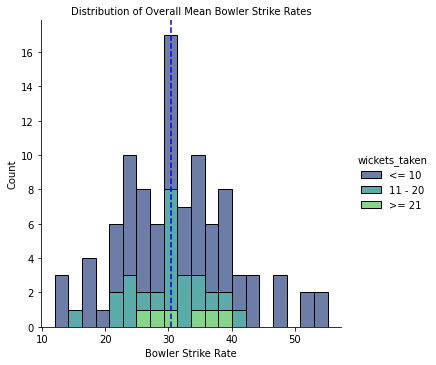

In [302]:
plt.figure(figsize=(15,10))
sns.displot(data=bowler_stats_overall,x='bowler_strikerate',hue='wickets_taken',
            hue_order=["<= 10","11 - 20",">= 21"],palette="viridis",bins=20, multiple='stack')
plt.title('Distribution of Overall Mean Bowler Strike Rates',fontsize=10)
plt.xlabel('Bowler Strike Rate')
plt.axvline(x=bowler_stats_overall.bowler_strikerate.median(),color='blue',ls='--',lw=1.5)

#plt.savefig('C:\\Users\\DELL\\Cricdata\\BowlerEconDist_overall.jpeg',bbox_inches='tight')
plt.show()

The bowling average in an innings was on the higher side of the median for bowlers with only one wicket and some bowlers with two wickets. Higher wicket takers were on the lower side of the median.

<Figure size 1080x720 with 0 Axes>

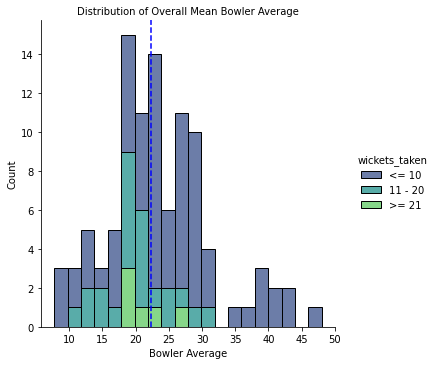

In [303]:
plt.figure(figsize=(15,10))
sns.displot(data=bowler_stats_overall,x='bowling_average',hue='wickets_taken',
            hue_order=["<= 10","11 - 20",">= 21"],palette="viridis",bins=20, multiple='stack')
plt.title('Distribution of Overall Mean Bowler Average',fontsize=10)
plt.xlabel('Bowler Average')
plt.axvline(x=bowler_stats_overall.bowling_average.median(),color='blue',ls='--',lw=1.5)

#plt.savefig('C:\\Users\\DELL\\Cricdata\\BowlerEconDist_overall.jpeg',bbox_inches='tight')
plt.show()

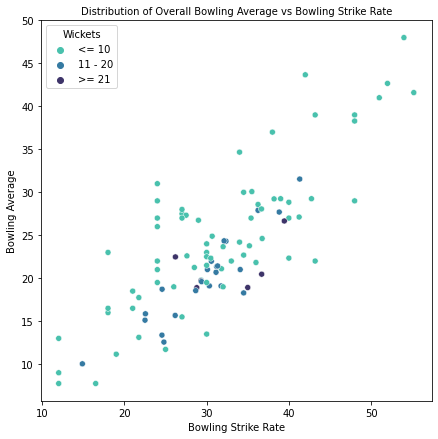

In [304]:
#plot Bowling Average vs Bowling Strike Rate
plt.figure(figsize=(7,7))
ax=sns.scatterplot(data=bowler_stats_overall,x='bowler_strikerate',y='bowling_average',
                   hue='wickets_taken',hue_order=["<= 10","11 - 20",">= 21"],palette = 'mako_r')

plt.title('Distribution of Overall Bowling Average vs Bowling Strike Rate', fontsize=10)
plt.ylabel('Bowling Average')
plt.xlabel('Bowling Strike Rate')
plt.legend(title='Wickets')

plt.savefig('C:\\Users\\DELL\\Cricdata\\Bowleravgvsstriikerate_overall.jpeg',bbox_inches='tight')
plt.show()

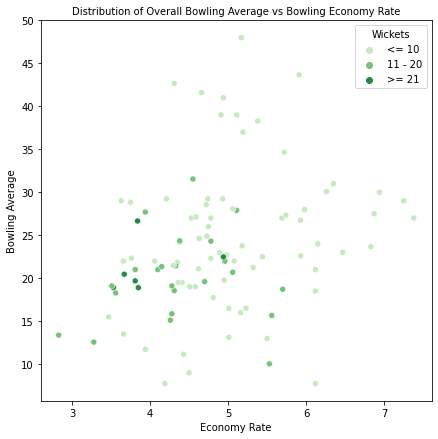

In [305]:
#plot Bowling Average vs Bowling Economy Rate in an innings
plt.figure(figsize=(7,7))
ax=sns.scatterplot(data=bowler_stats_overall,x='econ_rate',y='bowling_average',
                   hue='wickets_taken',hue_order=["<= 10","11 - 20",">= 21"],palette = 'Greens')

plt.title('Distribution of Overall Bowling Average vs Bowling Economy Rate', fontsize =10)
plt.ylabel('Bowling Average')
plt.xlabel('Economy Rate')
plt.legend(title='Wickets')

plt.savefig('C:\\Users\\DELL\\Cricdata\\Bowleravgvseconrate_overall.jpeg',bbox_inches='tight')
plt.show()

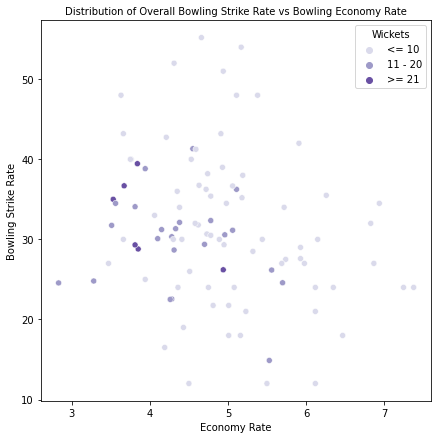

In [306]:
#plot Bowling Strike Rate vs Bowling Economy Rate
plt.figure(figsize=(7,7))
ax=sns.scatterplot(data=bowler_stats_overall,x='econ_rate',y='bowler_strikerate',
                   hue='wickets_taken',hue_order=["<= 10","11 - 20",">= 21"],palette = 'Purples')

plt.title('Distribution of Overall Bowling Strike Rate vs Bowling Economy Rate', fontsize =10)
plt.ylabel('Bowling Strike Rate')
plt.xlabel('Economy Rate')
plt.legend(title='Wickets')

plt.savefig('C:\\Users\\DELL\\Cricdata\\Bowlerstrikeratevseconrate_overall.jpeg',bbox_inches='tight')
plt.show()

In [307]:
bowler_stats_overall.head()

,bowler,bowling_team,overcounts,overs_bowled,wicketcounts,wickets_taken,econ_rate,bowling_average,bowler_strikerate
0,A Capsey,South East Stars,69.0,31 - 70,7.0,<= 10,4.62,21.10,31.80
1,A Griffiths,Western Storm,39.0,31 - 70,3.0,<= 10,5.32,21.25,28.50
2,A Hartley,Thunder,123.0,>= 71,21.0,>= 21,3.85,18.90,28.80
3,A Shrubsole,Western Storm,38.0,31 - 70,4.0,<= 10,3.76,22.34,40.00
4,AD Presland,Lightning,27.0,11 - 30,5.0,<= 10,4.73,24.89,30.67


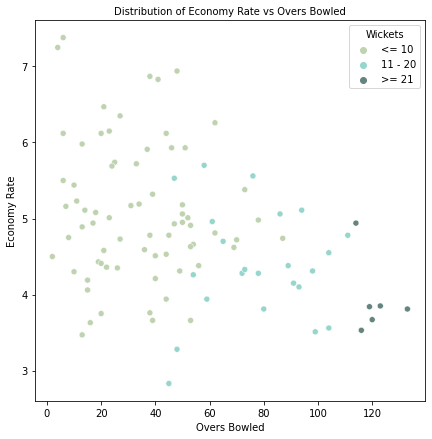

In [308]:
#plot Bowling Strike Rate vs Bowling Economy Rate
plt.figure(figsize=(7,7))
ax=sns.scatterplot(data=bowler_stats_overall,y='econ_rate',x='overcounts',
                   hue='wickets_taken',hue_order=["<= 10","11 - 20",">= 21"],palette = 'BrBG_d')

plt.title('Distribution of Economy Rate vs Overs Bowled', fontsize =10)
plt.xlabel('Overs Bowled')
plt.ylabel('Economy Rate')
plt.legend(title='Wickets')

plt.savefig('C:\\Users\\DELL\\Cricdata\\Bowlereconratevsovers.jpeg',bbox_inches='tight')
plt.show()

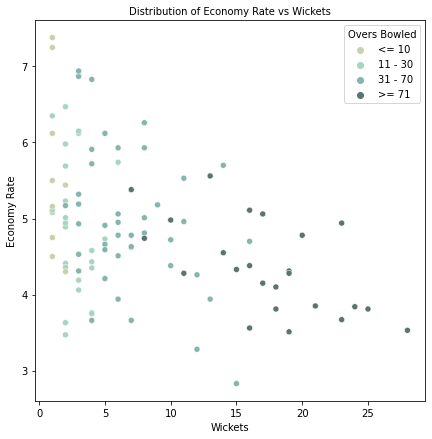

In [309]:
#plot Bowling Strike Rate vs Bowling Economy Rate
plt.figure(figsize=(7,7))
ax=sns.scatterplot(data=bowler_stats_overall,y='econ_rate',x='wicketcounts',
                   hue='overs_bowled',hue_order=["<= 10","11 - 30","31 - 70",">= 71"],palette = 'BrBG_d')

plt.title('Distribution of Economy Rate vs Wickets', fontsize =10)
plt.xlabel('Wickets')
plt.ylabel('Economy Rate')
plt.legend(title='Overs Bowled')

plt.savefig('C:\\Users\\DELL\\Cricdata\\Bowlereconratevswickets.jpeg',bbox_inches='tight')
plt.show()